In [1]:
### Clustering and annotation on library seperated basis

# Load Libraries

## External libraries

In [2]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama
import os
import multiprocessing
import random
import time
import git
import sys
from datetime import date

## Own functions

In [3]:
import MS1_Clustering

In [4]:
from MS1_Clustering import *

# Load Data

## Configurations

### Technical configurations

In [5]:
multiprocessing.cpu_count()  ### total amount of cpu on the used core

96

In [6]:
len(os.sched_getaffinity(0)) ### amount of available cpus

24

In [7]:
sc.settings.n_jobs   # default number of CPUs to use for parallel computing

1

In [8]:
sc.settings.max_memory  # maximum memory to use in GB

15

In [9]:
random.seed(7)

In [10]:
ncore = '24'

In [11]:
random_state_var = 0

In [12]:
n_jobs_var = 24

In [13]:
os.environ["OMP_NUM_THREADS"] = ncore
os.environ["OPENBLAS_NUM_THREADS"] = ncore
os.environ["MKL_NUM_THREADS"] = ncore
os.environ["VECLIB_MAXIMUM_THREADS"] = ncore
os.environ["NUMEXPR_NUM_THREADS"] = ncore

In [14]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 0

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.8.1
sinfo       0.3.4
-----
MS1_Clustering      NA
PIL                 8.3.1
annoy               NA
anyio               NA
attr                21.2.0
babel               2.9.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
certifi             2021.05.30
cffi                1.14.6
chardet             4.0.0
charset_normalizer  2.0.0
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
decorator           

In [15]:
file_name = 'A7_Clustering_RNA_Preprocessing.ipynb'

In [16]:
repo = git.Repo('/stark-stemi')

### Parameters

In [17]:
data_path = '../data/current'

In [18]:
data_path

'../data/current'

In [19]:
#libraries =['0001']
libraries =['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014'] # reduced to only 4 libraries for testing # reduced to only 4 libraries for testing

In [20]:
#libraries_text = ['L1']
libraries_text = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12', 'L13', 'L14']

In [21]:
# libraries_dict = {'0001': 'L1'}
libraries_dict = {'0001': 'L1', '0002': 'L2', '0003': 'L3', '0004': 'L4', '0005': 'L5',  '0006': 'L6', '0007': 'L7', '0008': 'L8', '0009': 'L9', '0010': 'L10', '0011': 'L11', '0012': 'L12', '0013': 'L13', '0014': 'L14'}

## Meta-Data File

In [22]:
path = data_path + "/preprocessed-data/meta-data/Mapping_Hashtag_Sample.csv"
library_hashtag_mapping = pd.read_csv(path) 
print('Last modified' + time.ctime(os.path.getmtime(path)))

Last modifiedThu Sep  2 13:17:03 2021


In [23]:
# library_hashtag_mapping

## RNA data from A6

In [24]:
anndata_dict = dict.fromkeys(libraries_text)

In [25]:
for key in anndata_dict:
    dataset_path = data_path + "/analysis/A/A6_Processed_" + key + '_rna_Final.h5ad'
    
    print(dataset_path)
    print('Last modified' + time.ctime(os.path.getmtime(dataset_path)))
    
    adata_orig = sc.read_h5ad(dataset_path)
    adata_orig.var_names_make_unique()  # make variable names unique
    sc.pp.filter_genes(adata_orig, min_cells=1)  # filter genes
    
    anndata_dict[key]= adata_orig # save anndata in dictionary
    anndata_dict[key].uns['data_load_time'] = time.ctime(os.path.getmtime(dataset_path))  # save the last modified timestamp of the data loaded
    anndata_dict[key].uns['data_load_name'] = dataset_path # save the data path of the data loaded 
    

../data/current/analysis/A/A6_Processed_L1_rna_Final.h5ad
Last modifiedFri Jan 20 11:51:11 2023
../data/current/analysis/A/A6_Processed_L2_rna_Final.h5ad
Last modifiedFri Jan 20 11:51:14 2023
../data/current/analysis/A/A6_Processed_L3_rna_Final.h5ad
Last modifiedFri Jan 20 11:51:18 2023
../data/current/analysis/A/A6_Processed_L4_rna_Final.h5ad
Last modifiedFri Jan 20 11:51:22 2023
../data/current/analysis/A/A6_Processed_L5_rna_Final.h5ad
Last modifiedFri Jan 20 11:51:27 2023
../data/current/analysis/A/A6_Processed_L6_rna_Final.h5ad
Last modifiedFri Jan 20 11:51:31 2023
../data/current/analysis/A/A6_Processed_L7_rna_Final.h5ad
Last modifiedFri Jan 20 11:51:35 2023
../data/current/analysis/A/A6_Processed_L8_rna_Final.h5ad
Last modifiedFri Jan 20 11:51:39 2023
../data/current/analysis/A/A6_Processed_L9_rna_Final.h5ad
Last modifiedFri Jan 20 11:51:43 2023
../data/current/analysis/A/A6_Processed_L10_rna_Final.h5ad
Last modifiedFri Jan 20 11:51:47 2023
../data/current/analysis/A/A6_Processed

In [26]:
### Short data check

In [27]:
anndata_dict['L1']  # cells have been filtered based on QC metrics

AnnData object with n_obs × n_vars = 18549 × 21407
    obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'd

In [28]:
anndata_dict['L1'].X.sum(axis=1) # data was normalized and log-transformed


matrix([[2192.7395],
        [1646.0859],
        [2101.9817],
        ...,
        [2003.8291],
        [1930.2568],
        [2271.1406]], dtype=float32)

In [29]:
anndata_dict['L1'].raw.X   # original count matrix for all genes

<18549x21415 sparse matrix of type '<class 'numpy.float32'>'
	with 30815517 stored elements in Compressed Sparse Row format>

In [30]:
anndata_dict['L1'].layers['A6_normalized']

<18549x21407 sparse matrix of type '<class 'numpy.float64'>'
	with 30815517 stored elements in Compressed Sparse Row format>

In [31]:
#### Save this dataset to have backup after clustering transformations

anndata = anndata_dict

In [32]:
anndata_dict['L1']

AnnData object with n_obs × n_vars = 18549 × 21407
    obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'd

In [33]:
anndata_dict['L1'].raw

# Prepare data for clustering (different variants)

## Complete

In [34]:
anndata_dict_all = dict.fromkeys(libraries_text)

In [35]:
for key in anndata_dict:
    anndata_dict_all[key] = anndata_dict[key][:,anndata_dict[key].var['highly_variable']==True]
    
    # regress out total counts and mt effects
    sc.pp.regress_out( anndata_dict_all[key], ['total_counts', 'pct_counts_mt'], n_jobs = n_jobs_var)
    ## think about regressing out sample effect + library effect before clustering 
    
    # scale the gene expression values
    sc.pp.scale( anndata_dict_all[key], max_value=10)
    

In [36]:
## consider using different variants

In [37]:
## especially: doing pca etc. without filtering on highly variable genes (-->pca should also only extract relevant information from these; should be more like a computational consideration)

In [38]:
anndata_dict_all['L1']

AnnData object with n_obs × n_vars = 18549 × 1558
    obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'di

In [39]:
anndata_dict['L1']

AnnData object with n_obs × n_vars = 18549 × 21407
    obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'd

## Only singlets

In [40]:
anndata_dict_singlet = dict.fromkeys(libraries_text)

In [41]:
for key in anndata_dict:
    print(key)
    anndata_dict_singlet[key] = anndata_dict[key][anndata_dict[key].obs['HTO_classification.global']=='Singlet']
    
    sc.pp.highly_variable_genes(anndata_dict_singlet[key], min_mean=0.0125, max_mean=3, min_disp=0.5)
    
    anndata_dict_singlet[key] = anndata_dict_singlet[key][:,anndata_dict_singlet[key].var['highly_variable']==True]
    
    # regress out total counts and mt effects
    sc.pp.regress_out(anndata_dict_singlet[key], ['total_counts', 'pct_counts_mt'], n_jobs =  n_jobs_var)
    ## think about regressing out sample effect + library effect before clustering 
    
    # scale the gene expression values
    sc.pp.scale(anndata_dict_singlet[key], max_value=10)

L1


Trying to set attribute `.uns` of view, copying.


L2


Trying to set attribute `.uns` of view, copying.


L3


Trying to set attribute `.uns` of view, copying.


L4


Trying to set attribute `.uns` of view, copying.


L5


Trying to set attribute `.uns` of view, copying.


L6


Trying to set attribute `.uns` of view, copying.


L7


Trying to set attribute `.uns` of view, copying.


L8


Trying to set attribute `.uns` of view, copying.


L9


Trying to set attribute `.uns` of view, copying.


L10


Trying to set attribute `.uns` of view, copying.


L11


Trying to set attribute `.uns` of view, copying.


L12


Trying to set attribute `.uns` of view, copying.


L13


Trying to set attribute `.uns` of view, copying.


L14


Trying to set attribute `.uns` of view, copying.


In [42]:
anndata_dict_singlet['L1']  # 12113 cells left ; 1761 highly variable genes

AnnData object with n_obs × n_vars = 12113 × 1761
    obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'di

## Only singlets - without ribosomal / mitochondrial RNA

In [43]:
anndata_dict_singlet_rb_mt = dict.fromkeys(libraries_text)

In [44]:
for key in anndata_dict:
    print(key)
    anndata_dict_singlet_rb_mt[key] = anndata_dict[key][anndata_dict[key].obs['HTO_classification.global']=='Singlet']
    anndata_dict_singlet_rb_mt[key] = anndata_dict_singlet_rb_mt[key][:,np.logical_and(anndata_dict[key].var['rb'] == False , anndata_dict[key].var['mt'] == False)]
    
    sc.pp.highly_variable_genes(anndata_dict_singlet_rb_mt[key], min_mean=0.0125, max_mean=3, min_disp=0.5)
    
    anndata_dict_singlet_rb_mt[key] = anndata_dict_singlet_rb_mt[key][:,anndata_dict_singlet_rb_mt[key].var['highly_variable']==True]
    
    # regress out total counts and mt effects
    sc.pp.regress_out(anndata_dict_singlet_rb_mt[key], ['total_counts', 'pct_counts_mt'], n_jobs =  n_jobs_var)
    ## think about regressing out sample effect + library effect before clustering 
    
    # scale the gene expression values
    sc.pp.scale(anndata_dict_singlet_rb_mt[key], max_value=10)

L1


Trying to set attribute `.uns` of view, copying.


L2


Trying to set attribute `.uns` of view, copying.


L3


Trying to set attribute `.uns` of view, copying.


L4


Trying to set attribute `.uns` of view, copying.


L5


Trying to set attribute `.uns` of view, copying.


L6


Trying to set attribute `.uns` of view, copying.


L7


Trying to set attribute `.uns` of view, copying.


L8


Trying to set attribute `.uns` of view, copying.


L9


Trying to set attribute `.uns` of view, copying.


L10


Trying to set attribute `.uns` of view, copying.


L11


Trying to set attribute `.uns` of view, copying.


L12


Trying to set attribute `.uns` of view, copying.


L13


Trying to set attribute `.uns` of view, copying.


L14


Trying to set attribute `.uns` of view, copying.


In [45]:
anndata_dict_singlet_rb_mt['L1']   # 12113 cells x 1757 genes

AnnData object with n_obs × n_vars = 12113 × 1757
    obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'di

# Reduce dimension + Cluster the data

## Complete Data

### PCA

In [46]:
#anndata_dict['L1']

In [47]:
#sc.tl.pca(anndata_dict['L1'], svd_solver = 'arpack', use_highly_variable = True)

In [48]:
#sc.pl.pca_variance_ratio(anndata_dict['L1'], log=True, show = False)

In [49]:
#sc.pp.neighbors(anndata_dict['L1'], n_neighbors=10, n_pcs=14, use_rep = 'X_pca')

### Leads to crash/ does not lead to crash when with adapted normalization & highly variable feature selection as in A5 Script

PCA distribution L1


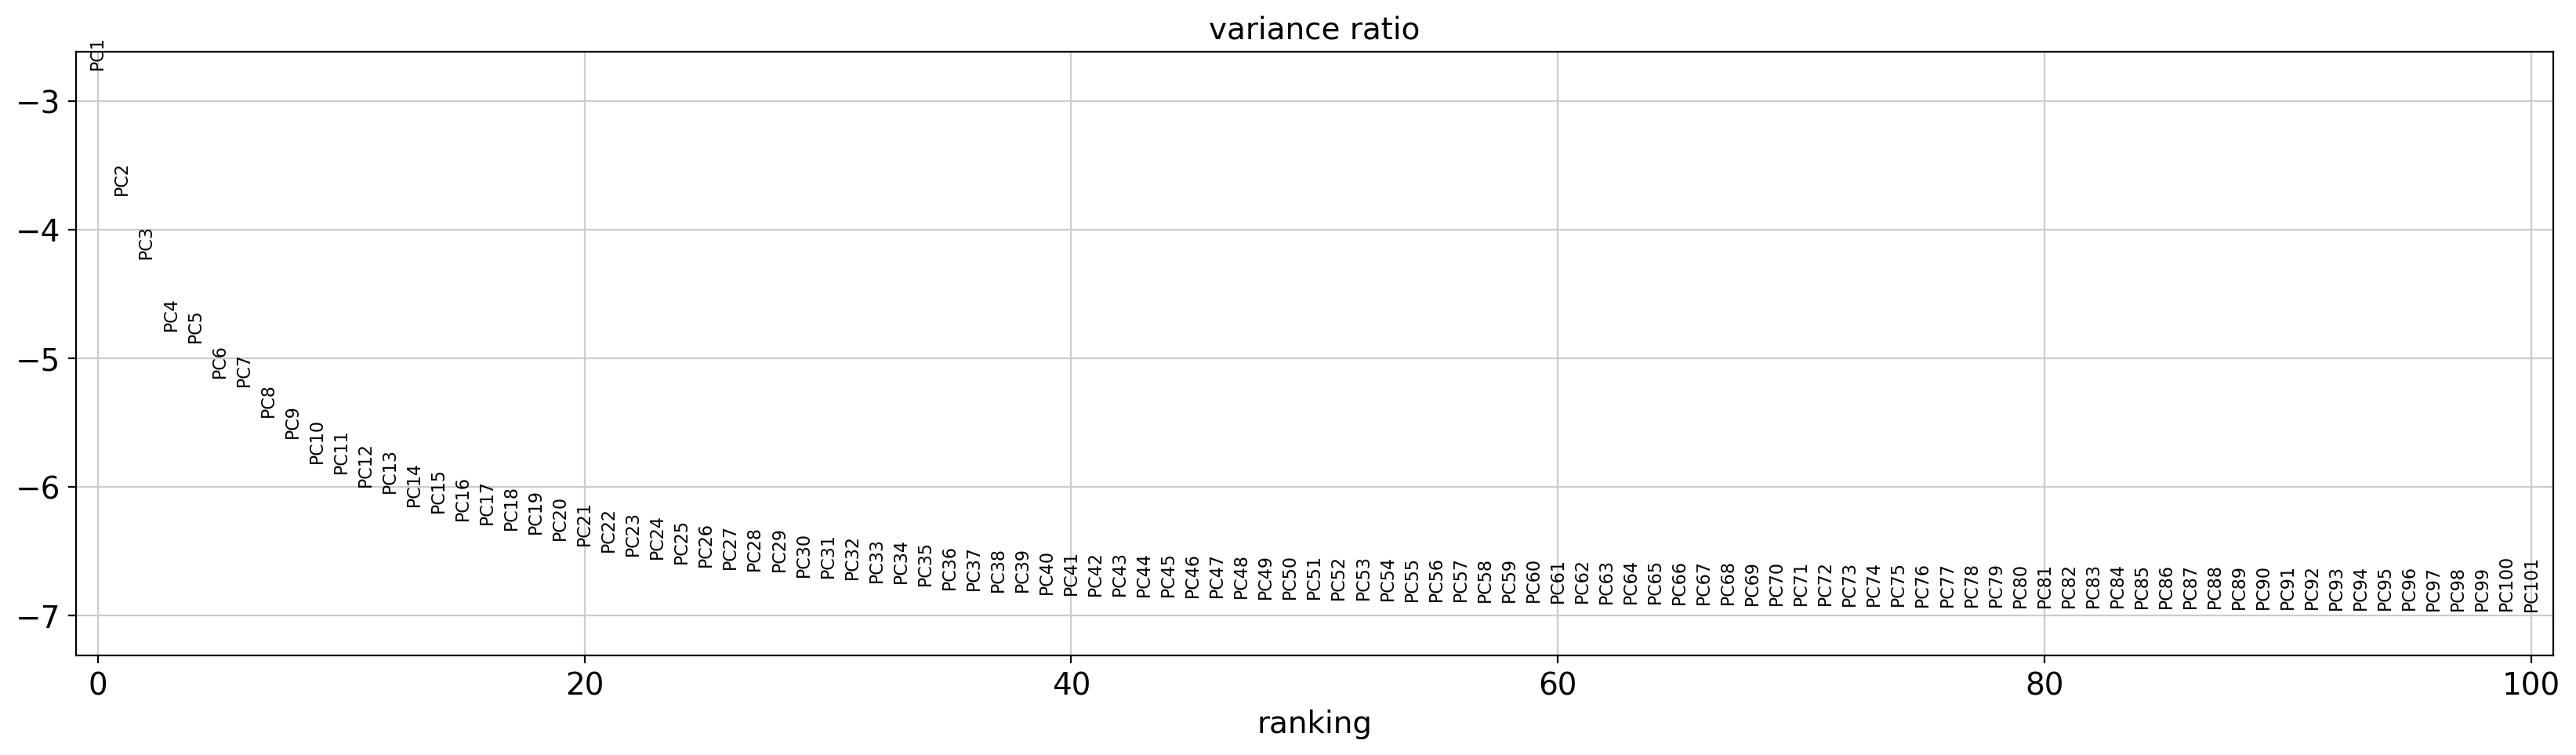


Amount explained variance all PCA L1
0.9917827133758692
PCA distribution L2


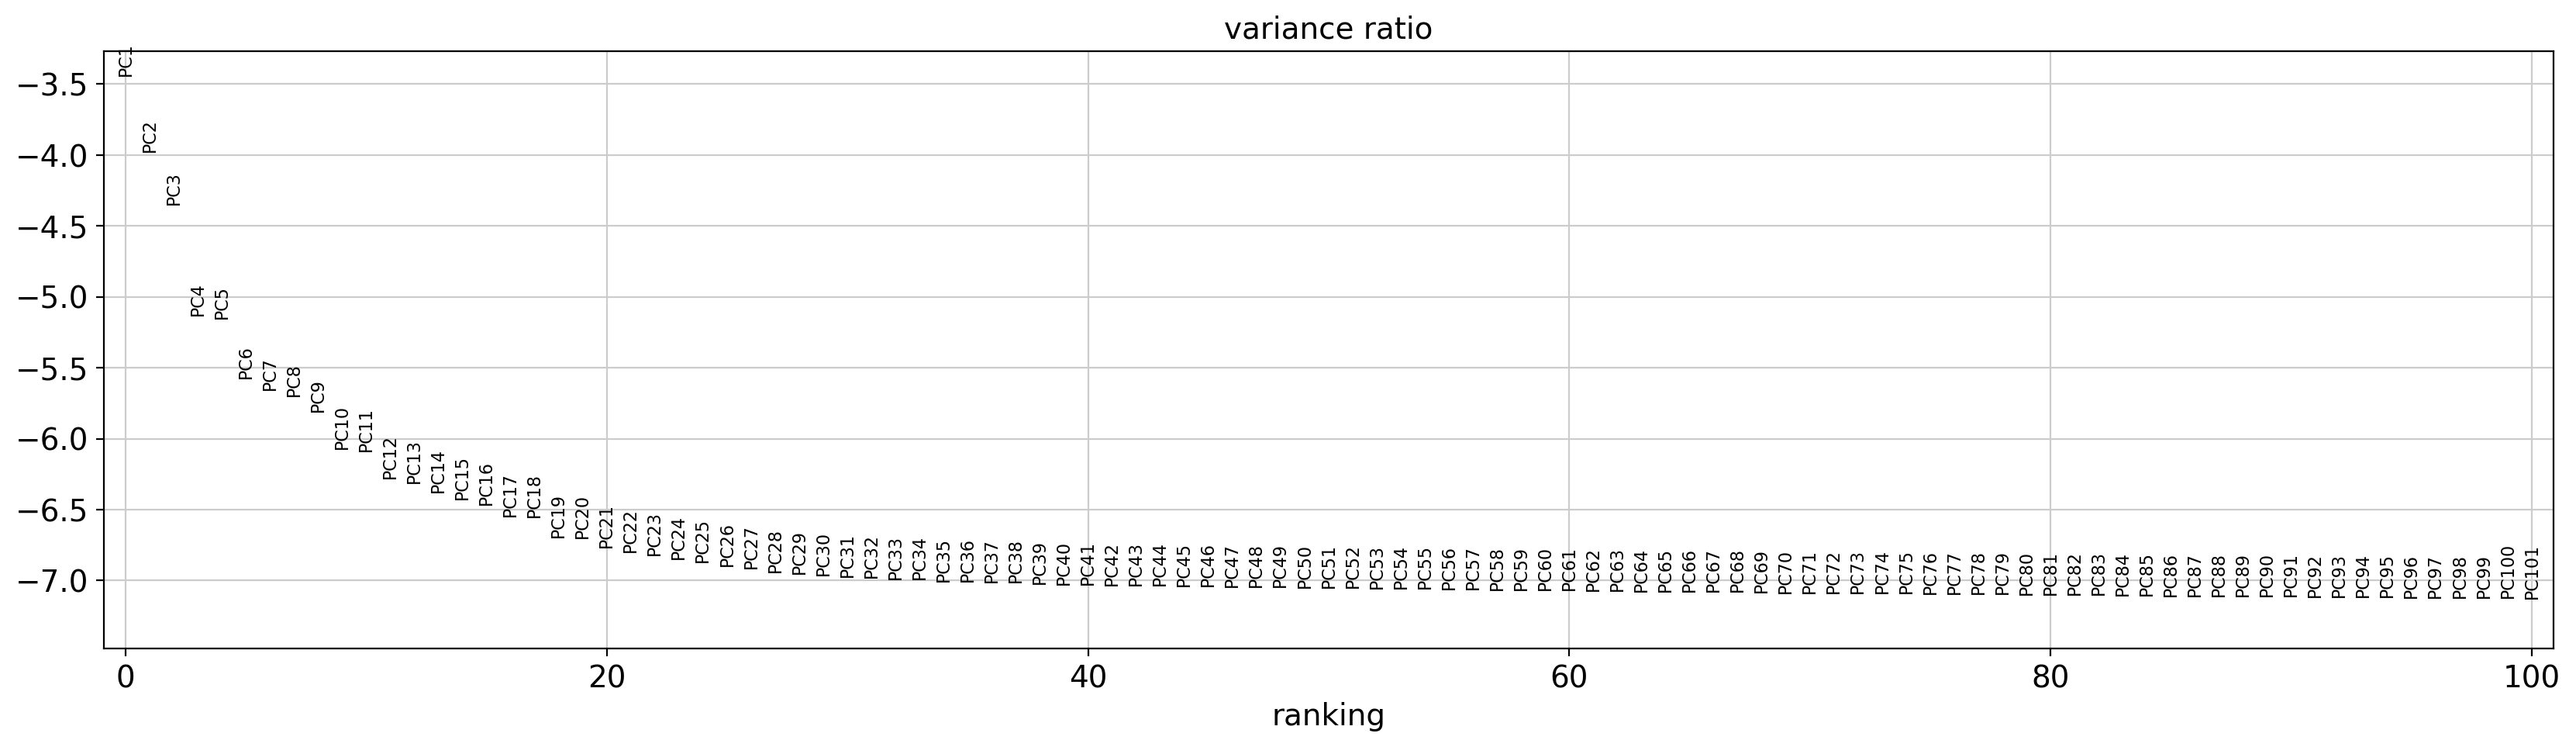


Amount explained variance all PCA L2
0.8672398560738657
PCA distribution L3


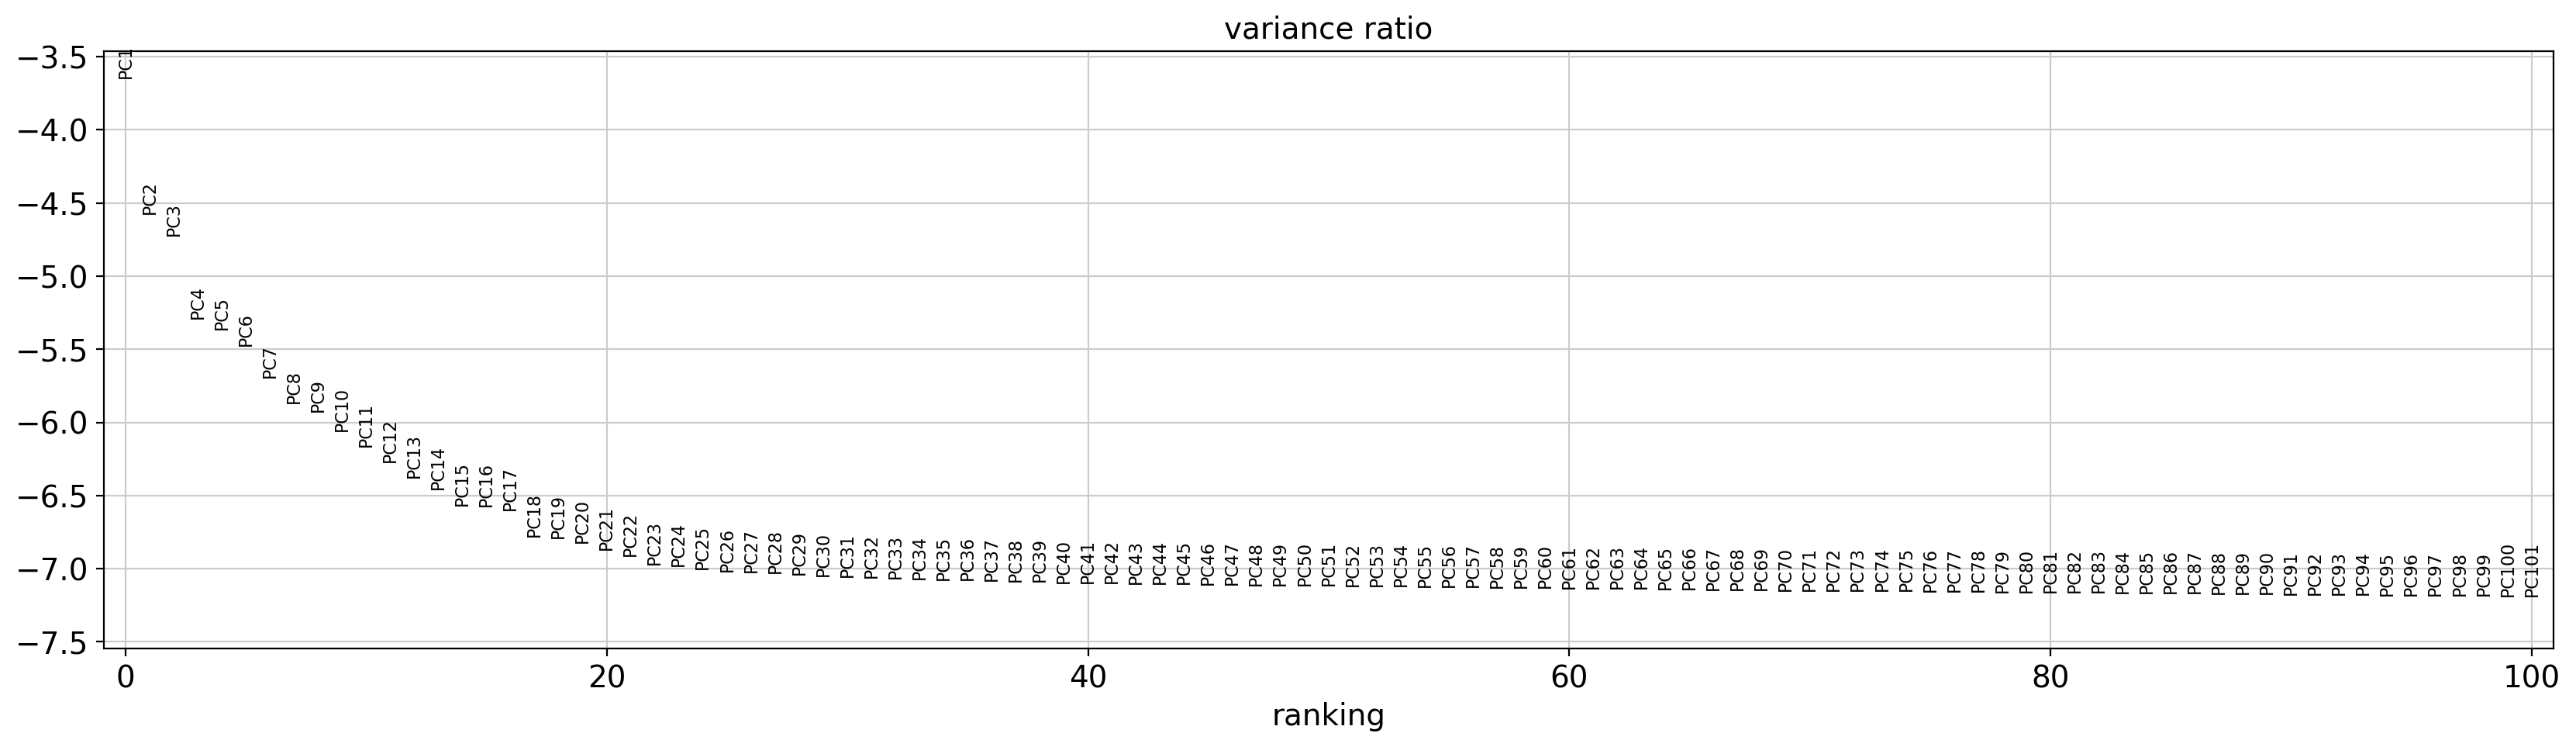


Amount explained variance all PCA L3
0.8121333785820752
PCA distribution L4


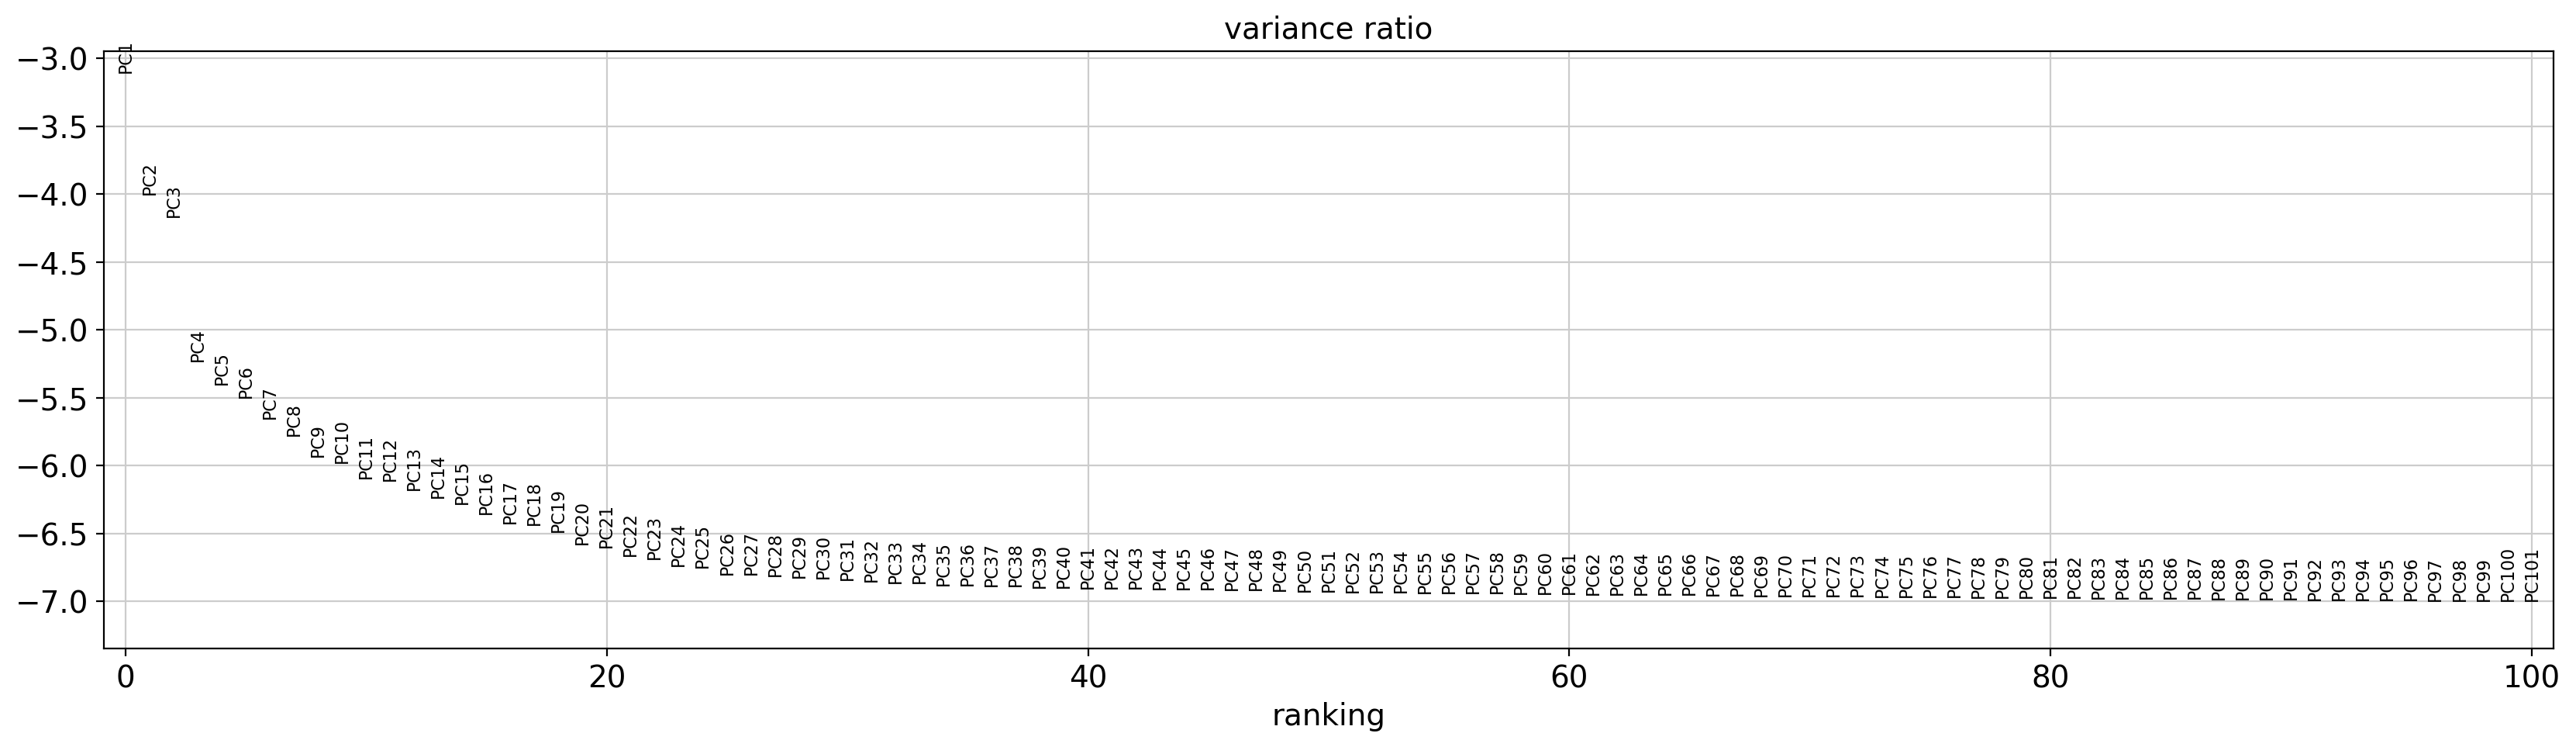


Amount explained variance all PCA L4
0.9657818464620505
PCA distribution L5


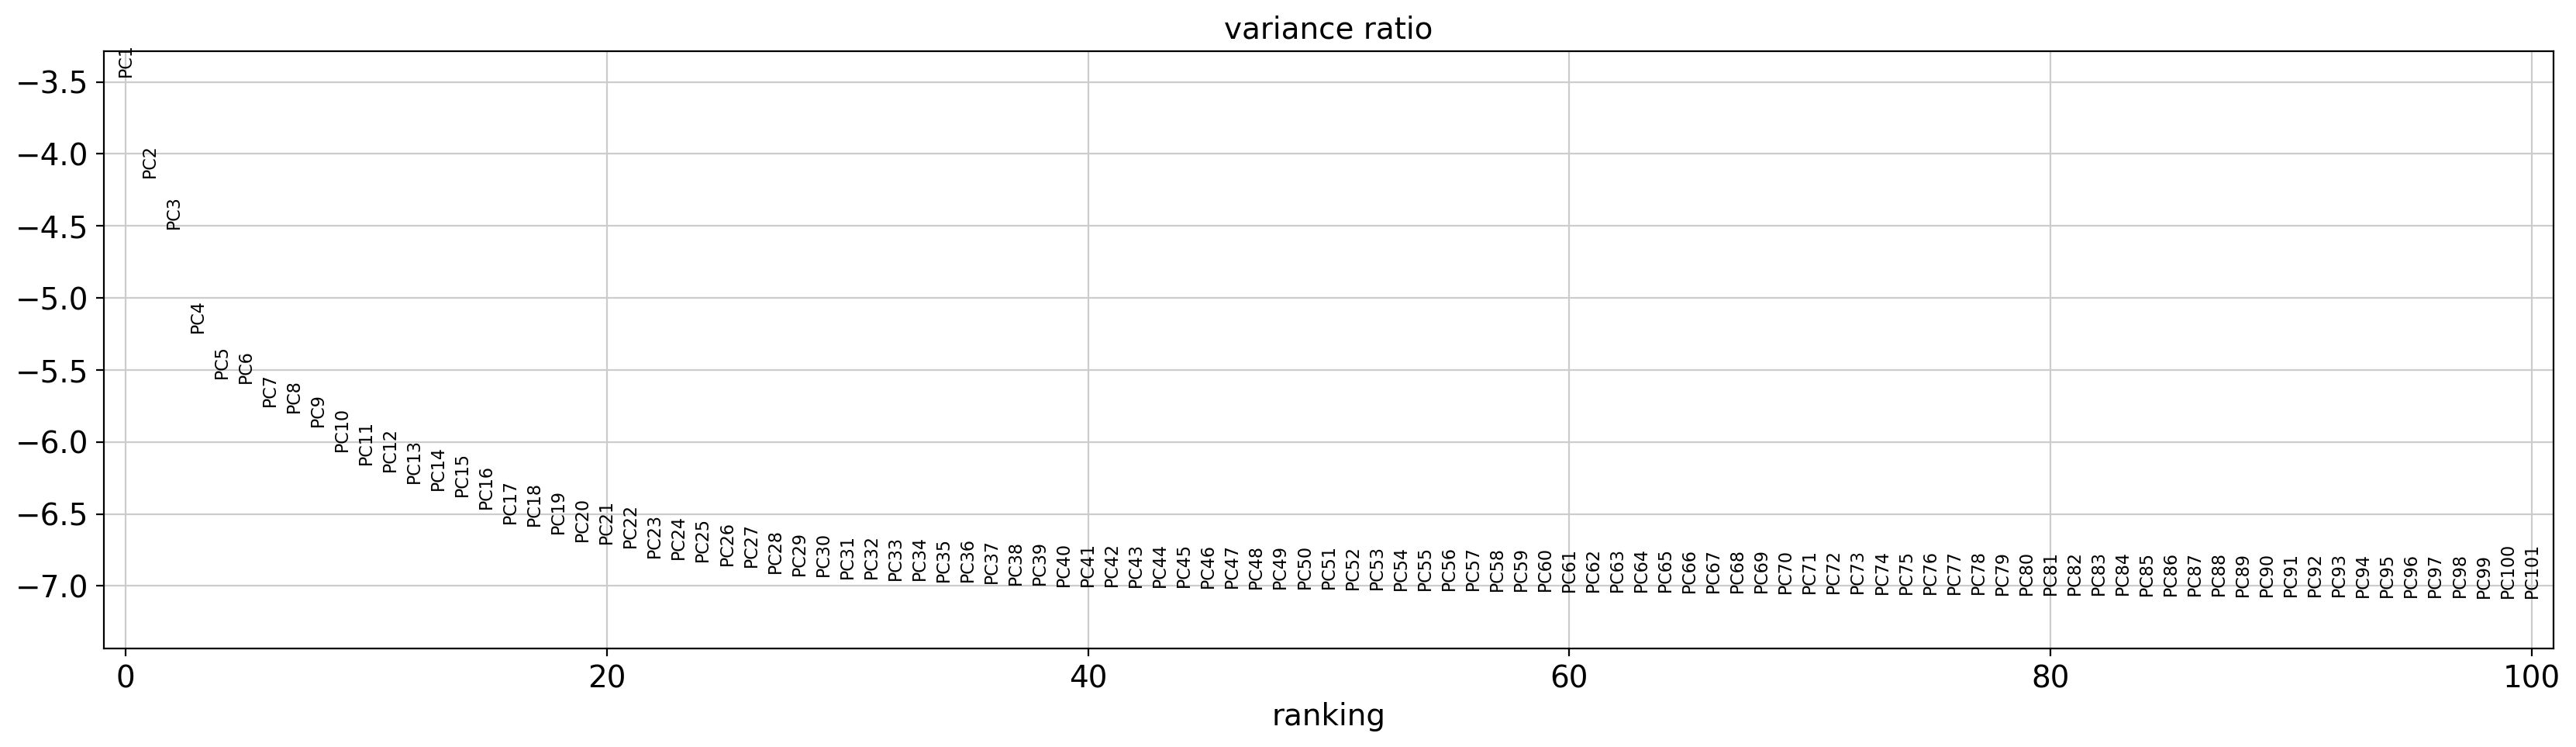


Amount explained variance all PCA L5
0.9353246886457782
PCA distribution L6


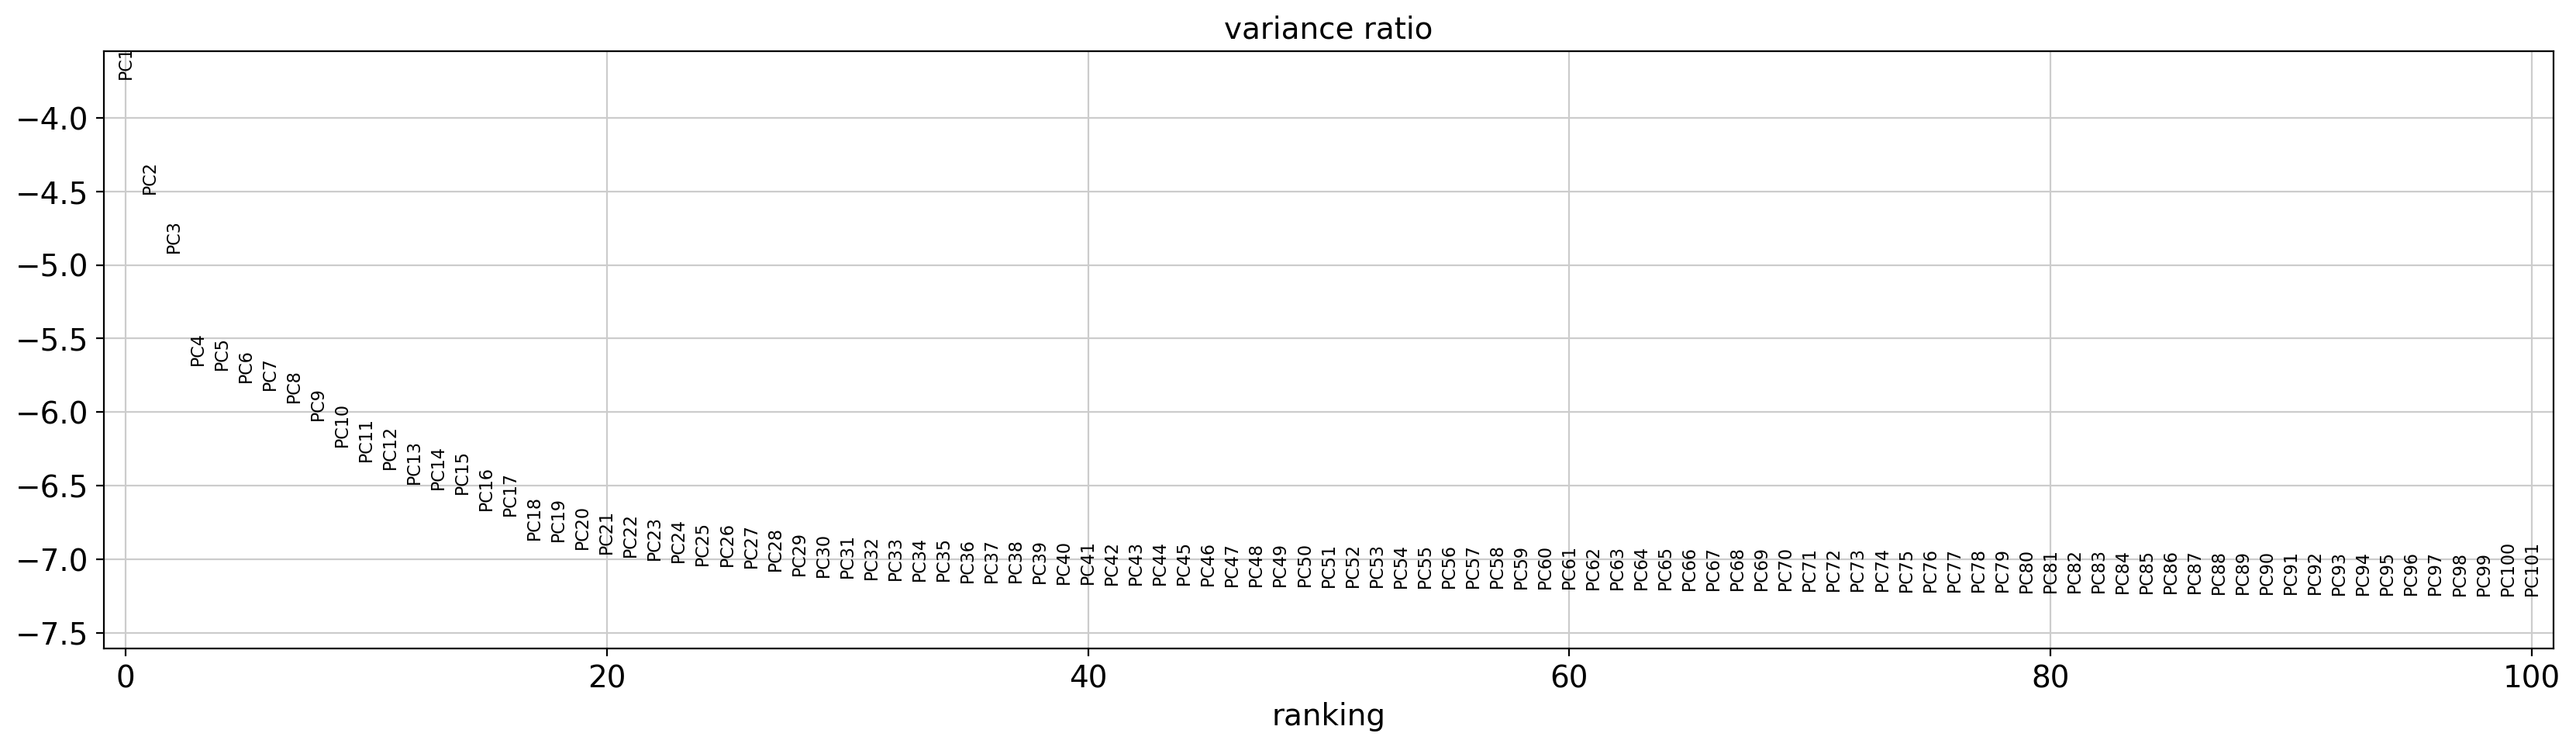


Amount explained variance all PCA L6
0.7935558962344658
PCA distribution L7


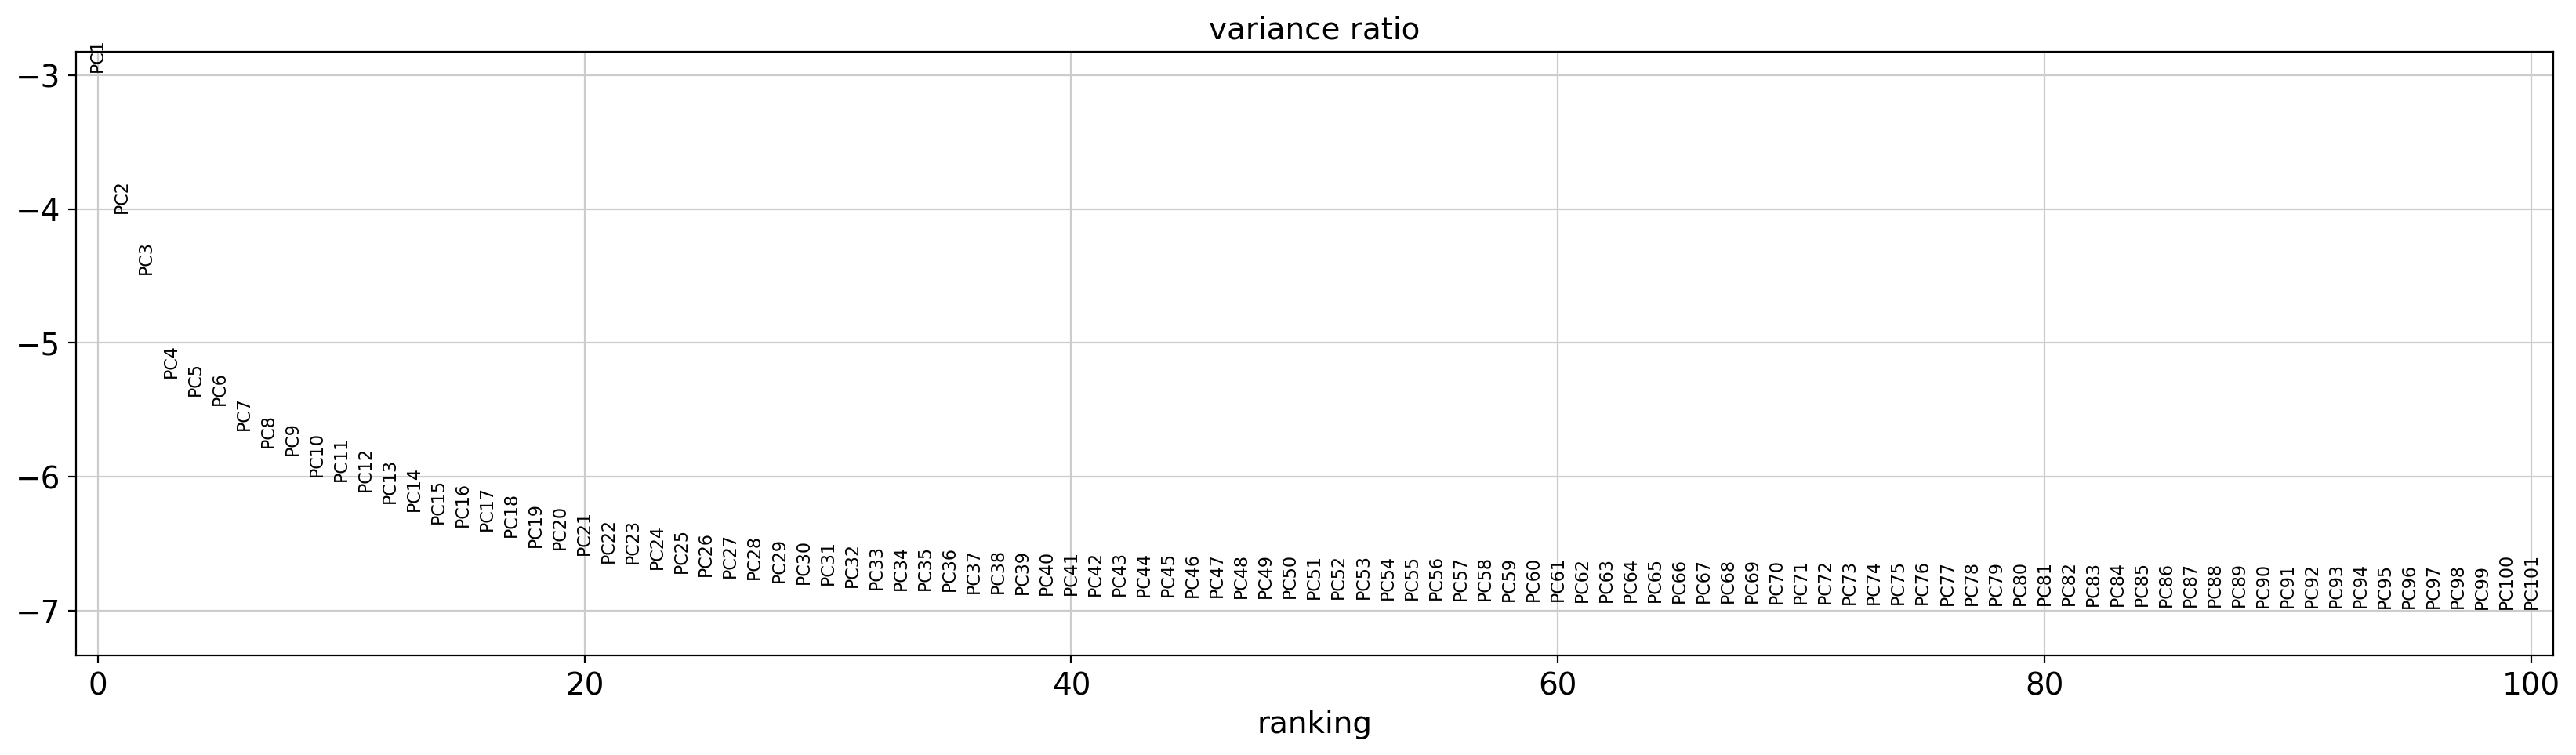


Amount explained variance all PCA L7
0.9590195523924194
PCA distribution L8


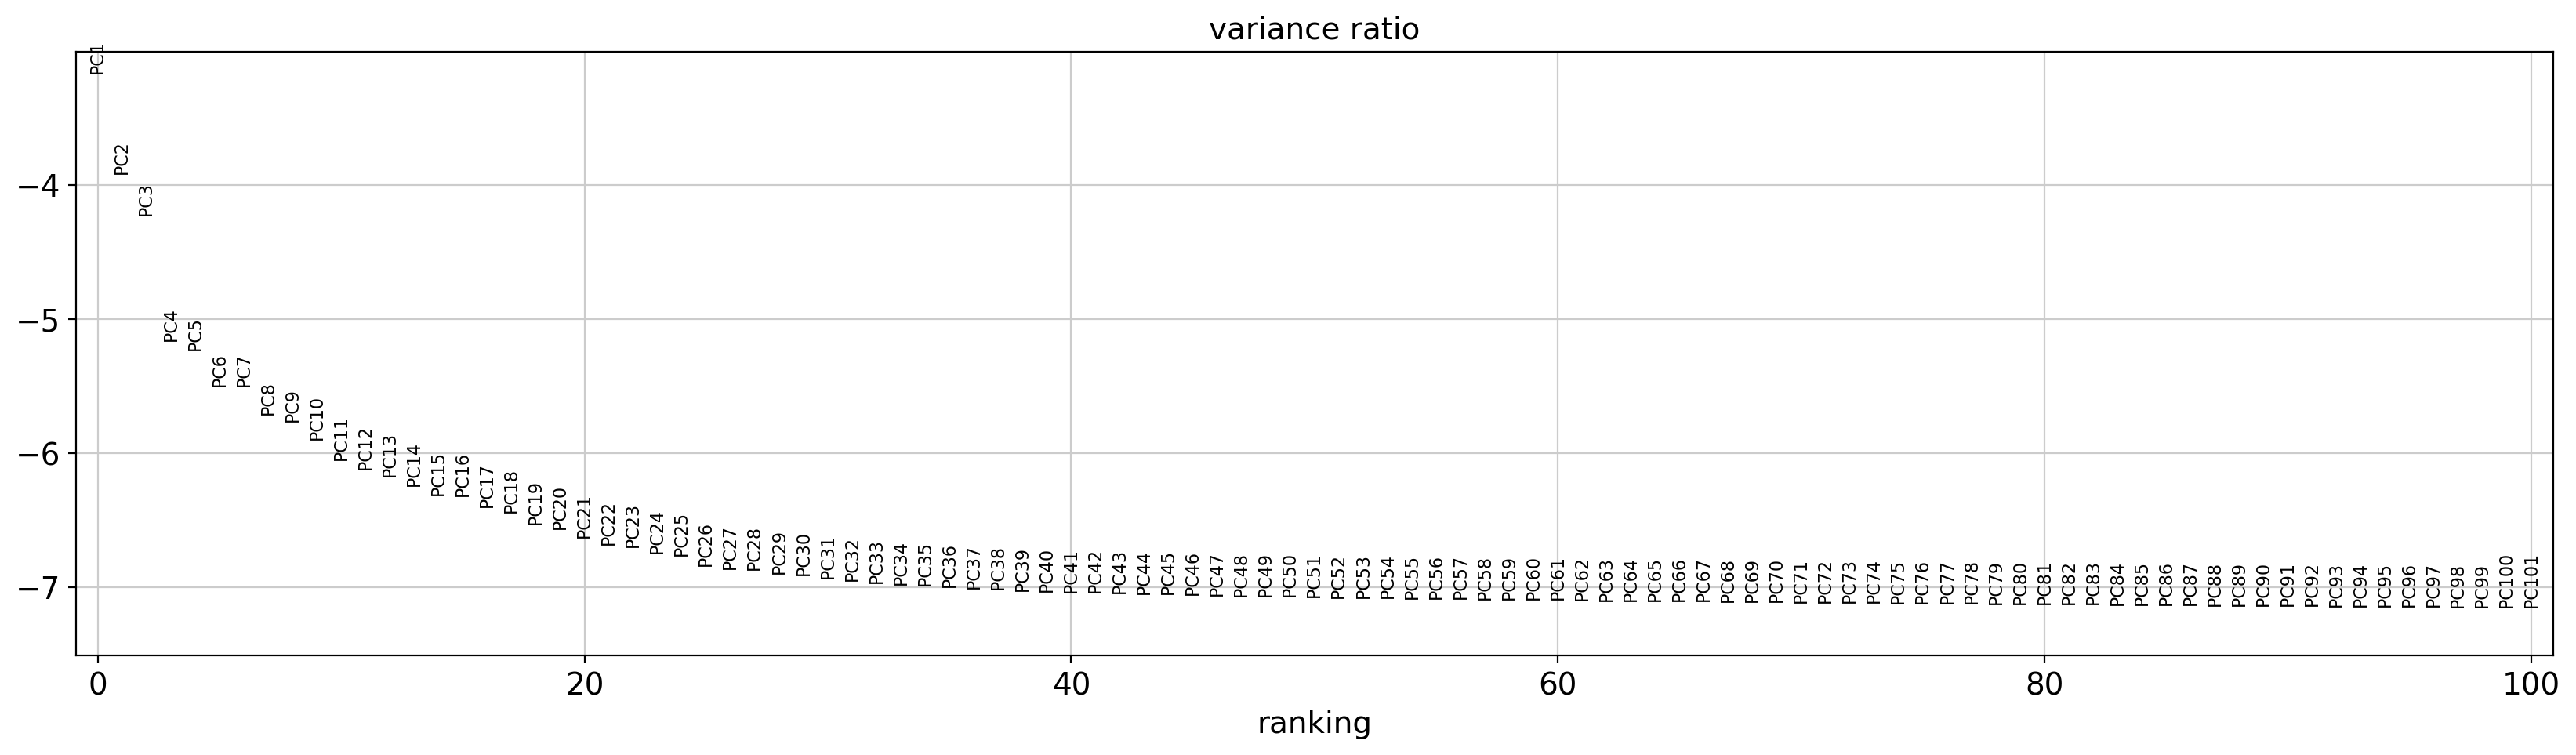


Amount explained variance all PCA L8
0.8810436041385401
PCA distribution L9


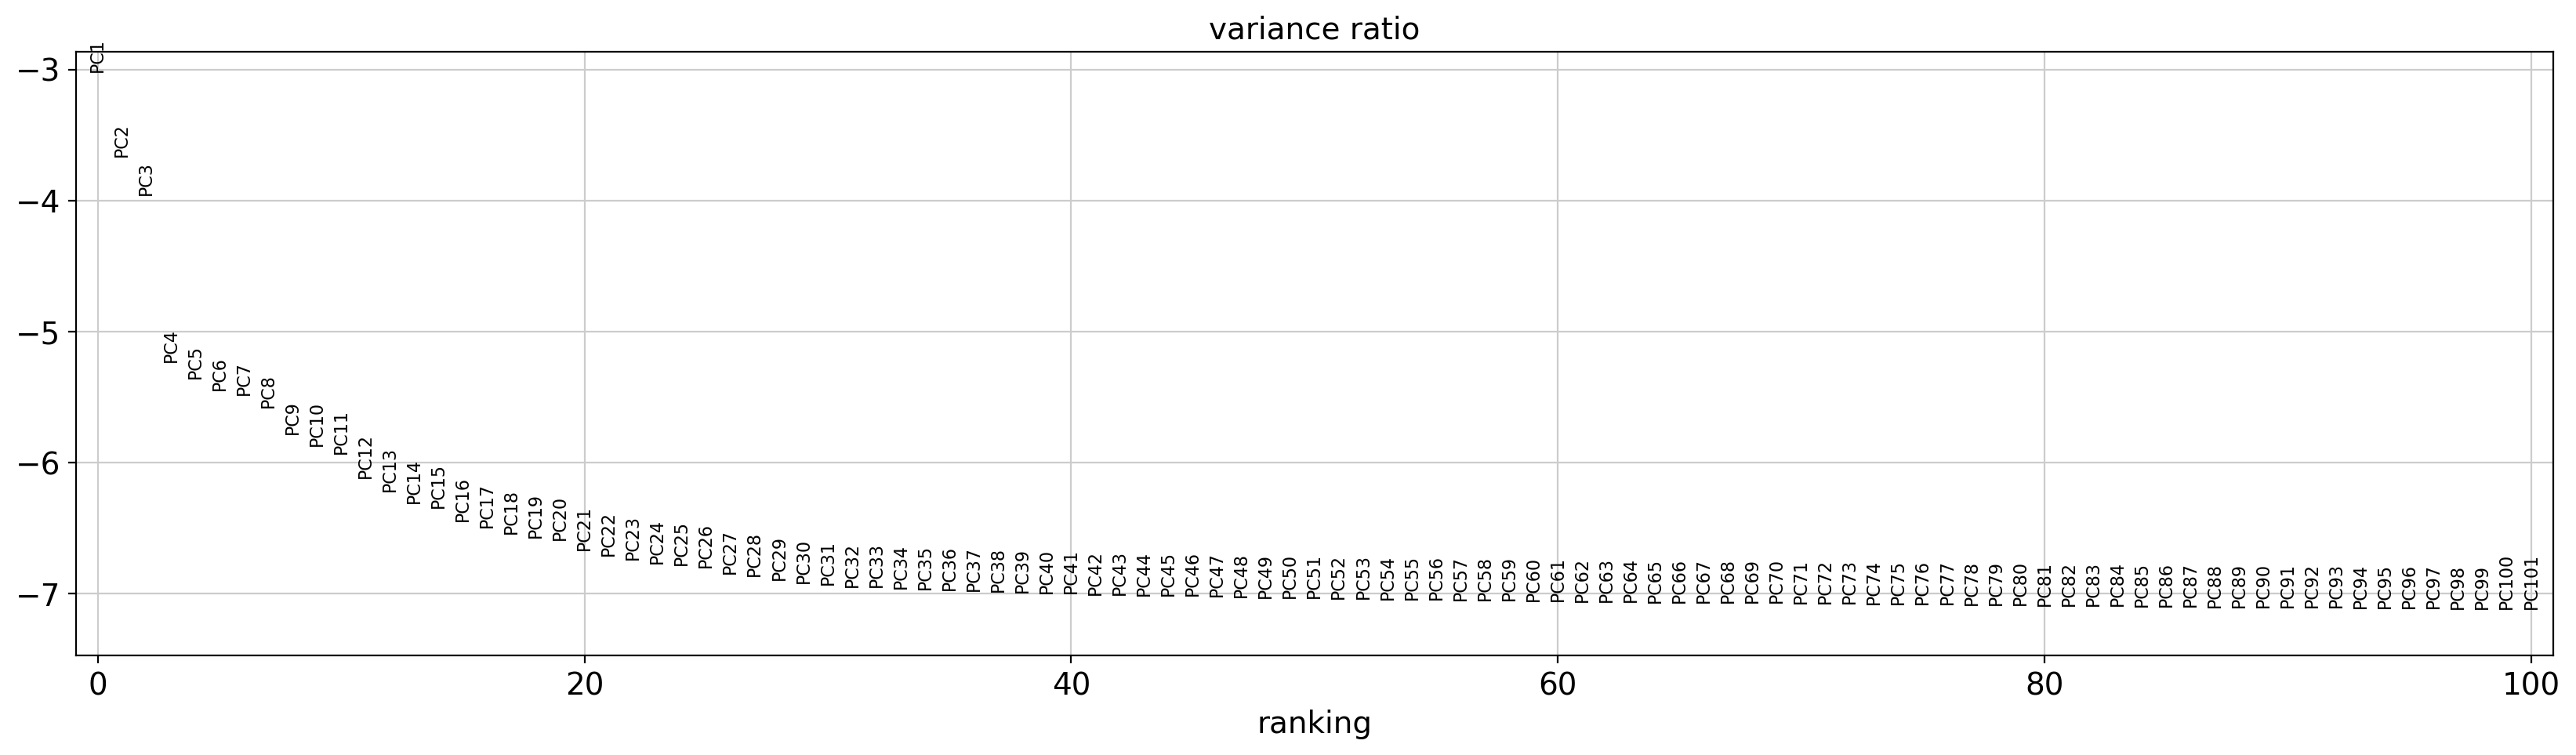


Amount explained variance all PCA L9
0.895652315201005
PCA distribution L10


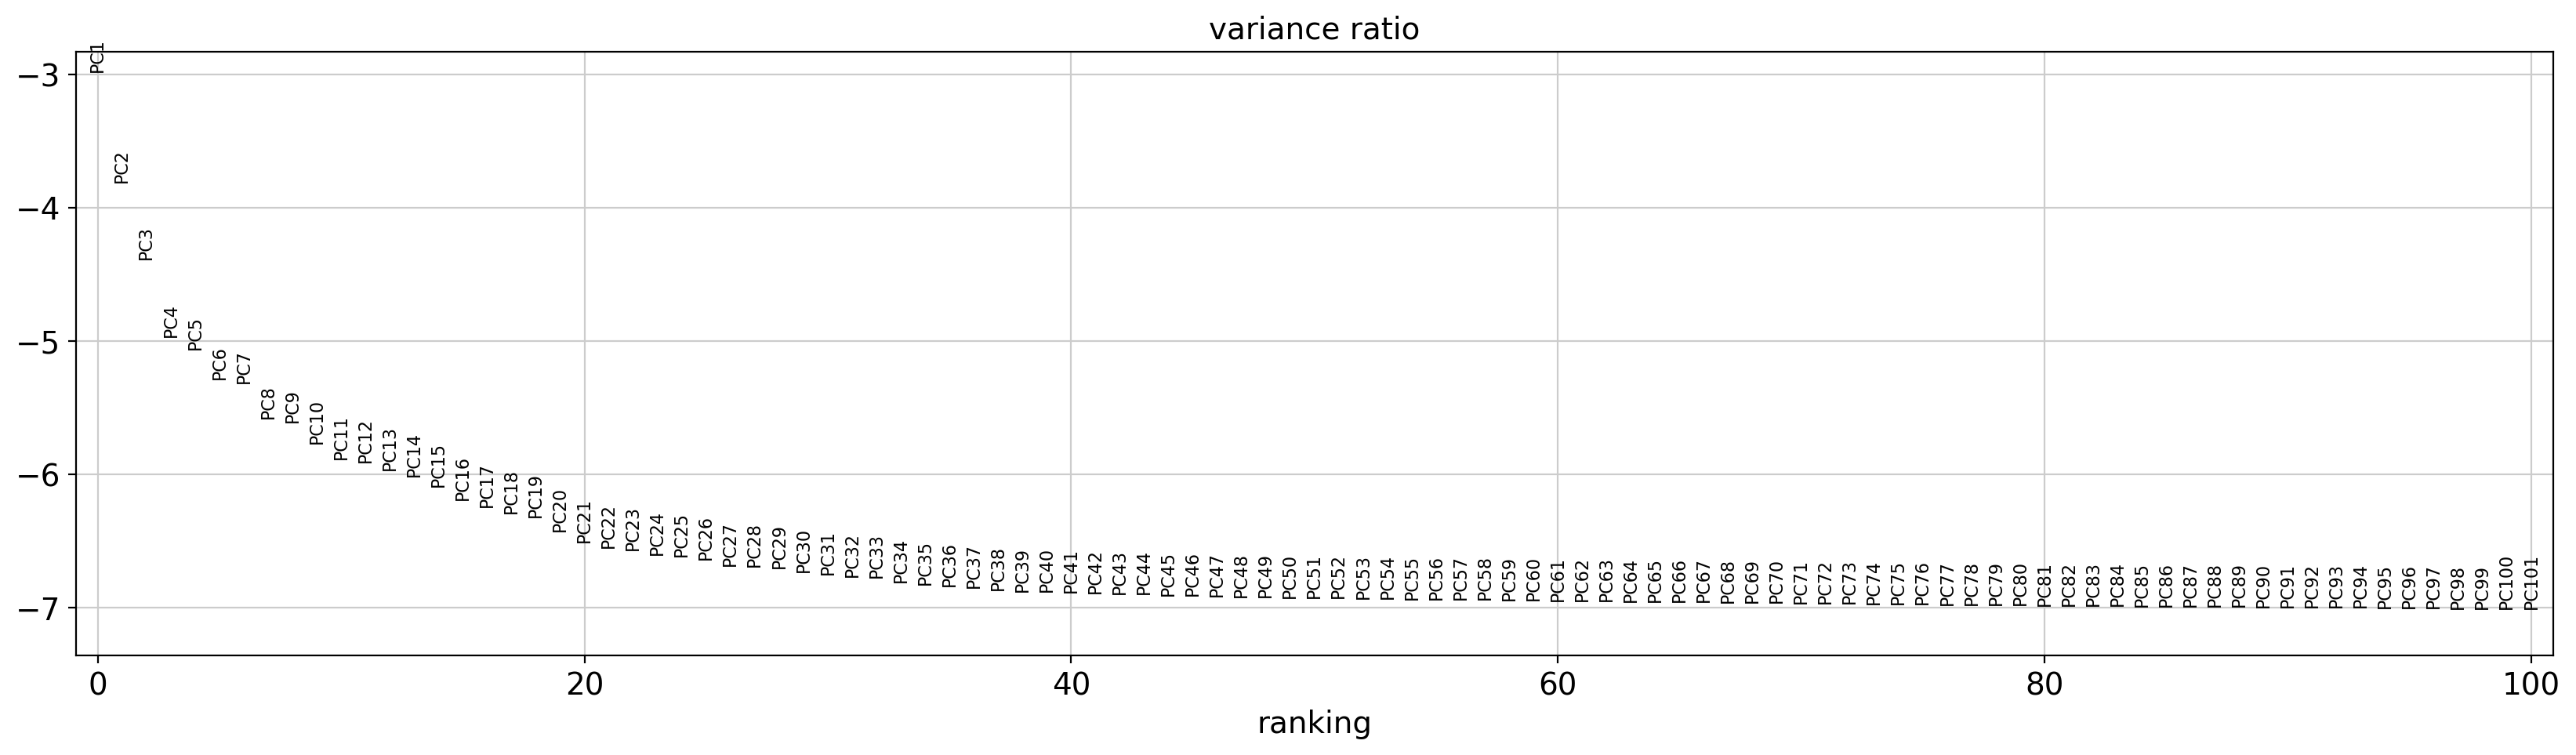


Amount explained variance all PCA L10
0.9625809467106592
PCA distribution L11


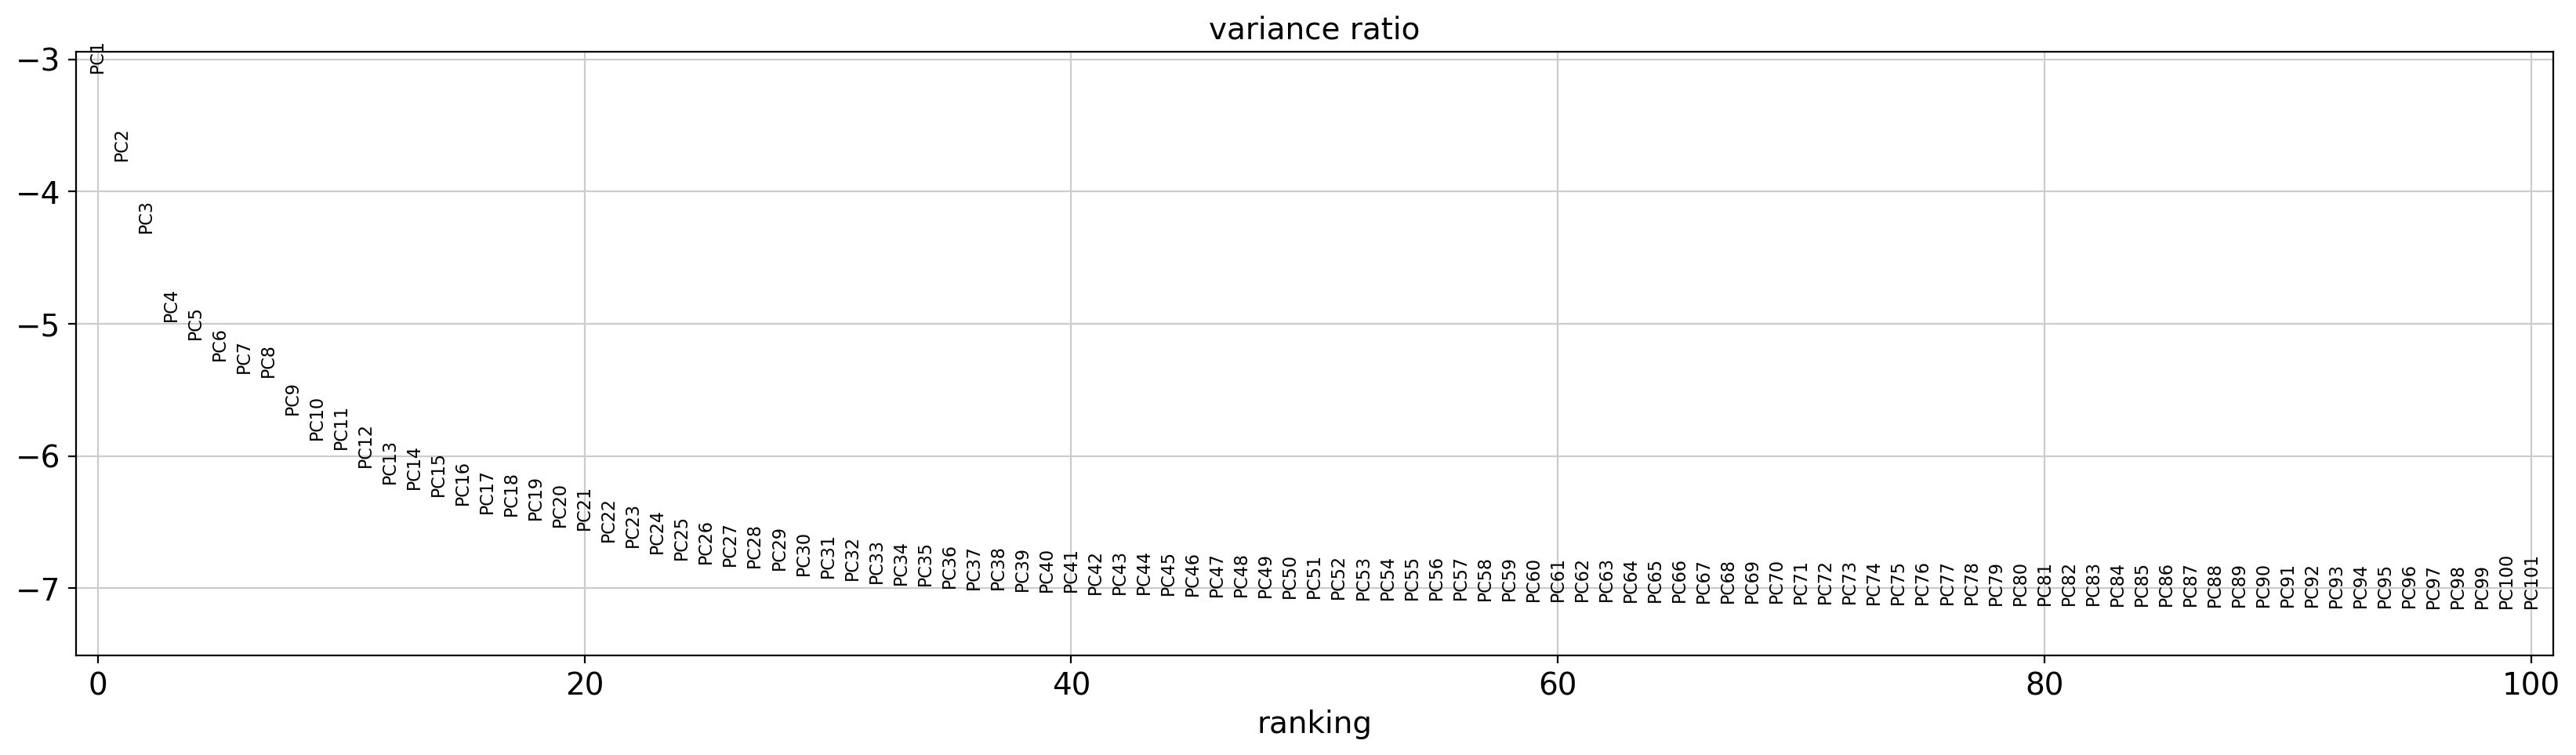


Amount explained variance all PCA L11
0.8882414251565933
PCA distribution L12


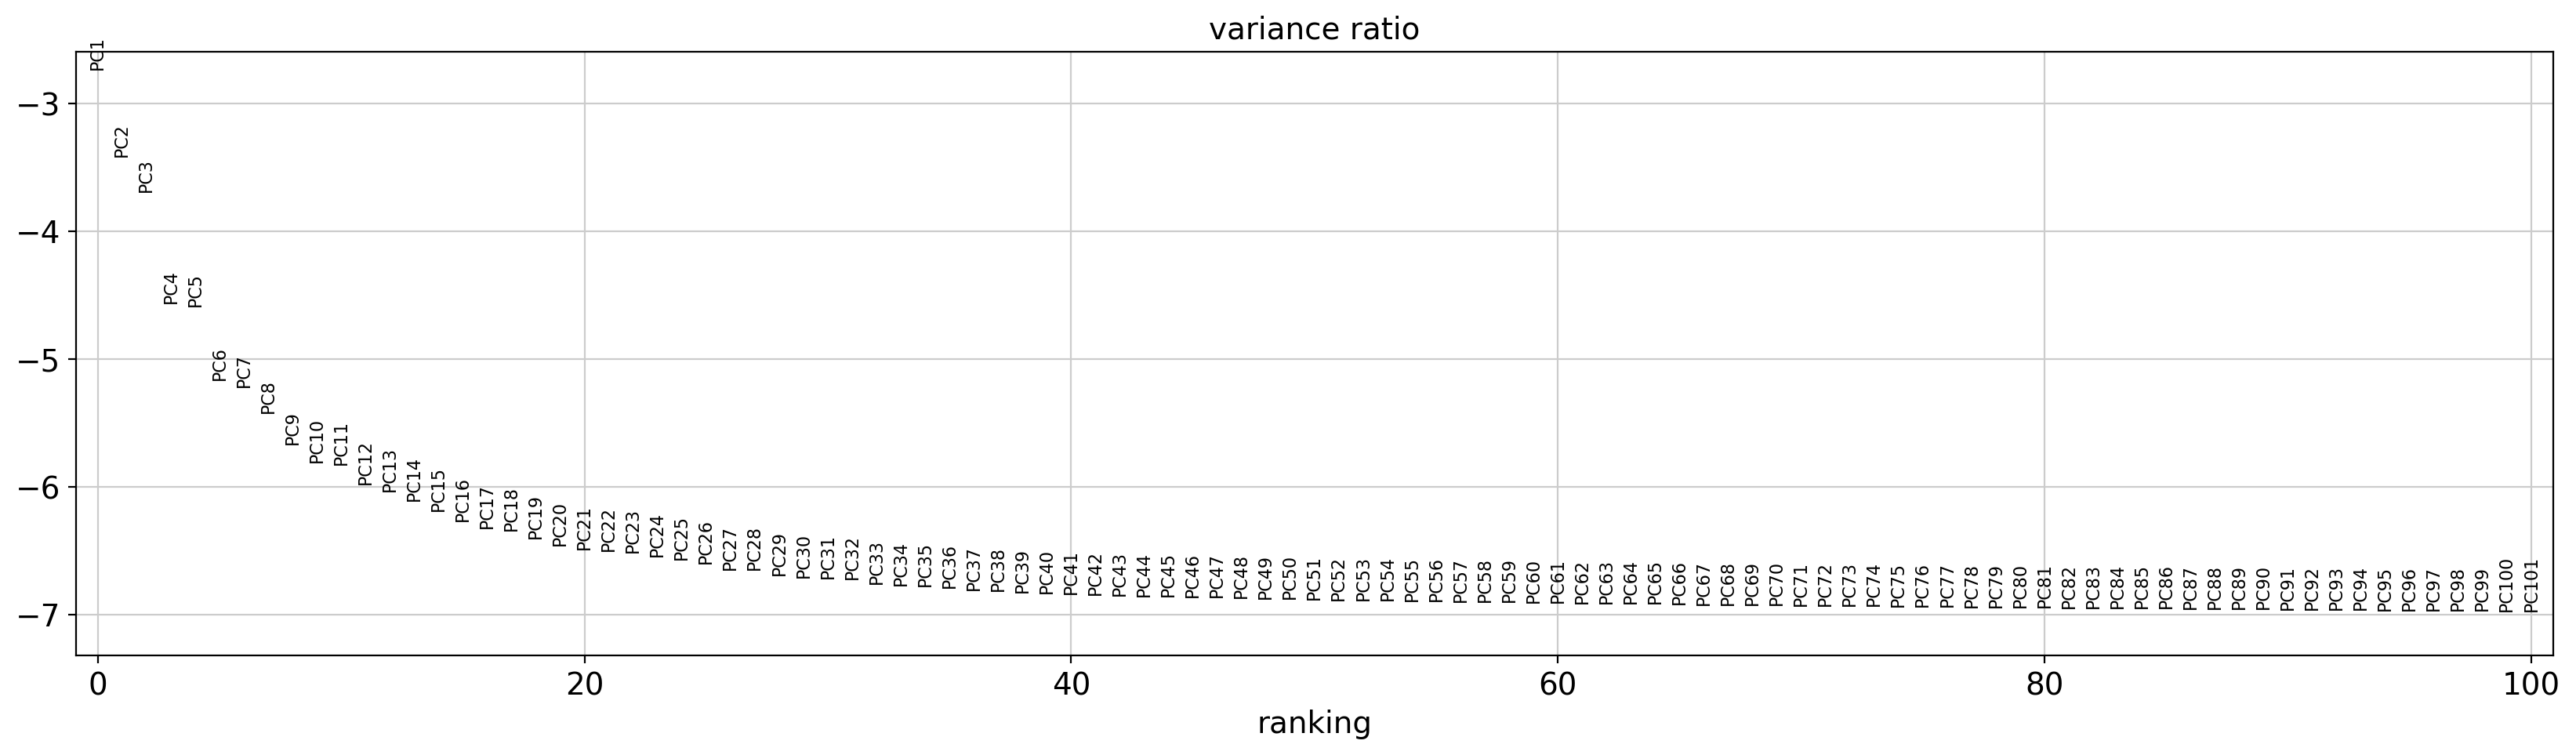


Amount explained variance all PCA L12
0.9993231737025781
PCA distribution L13


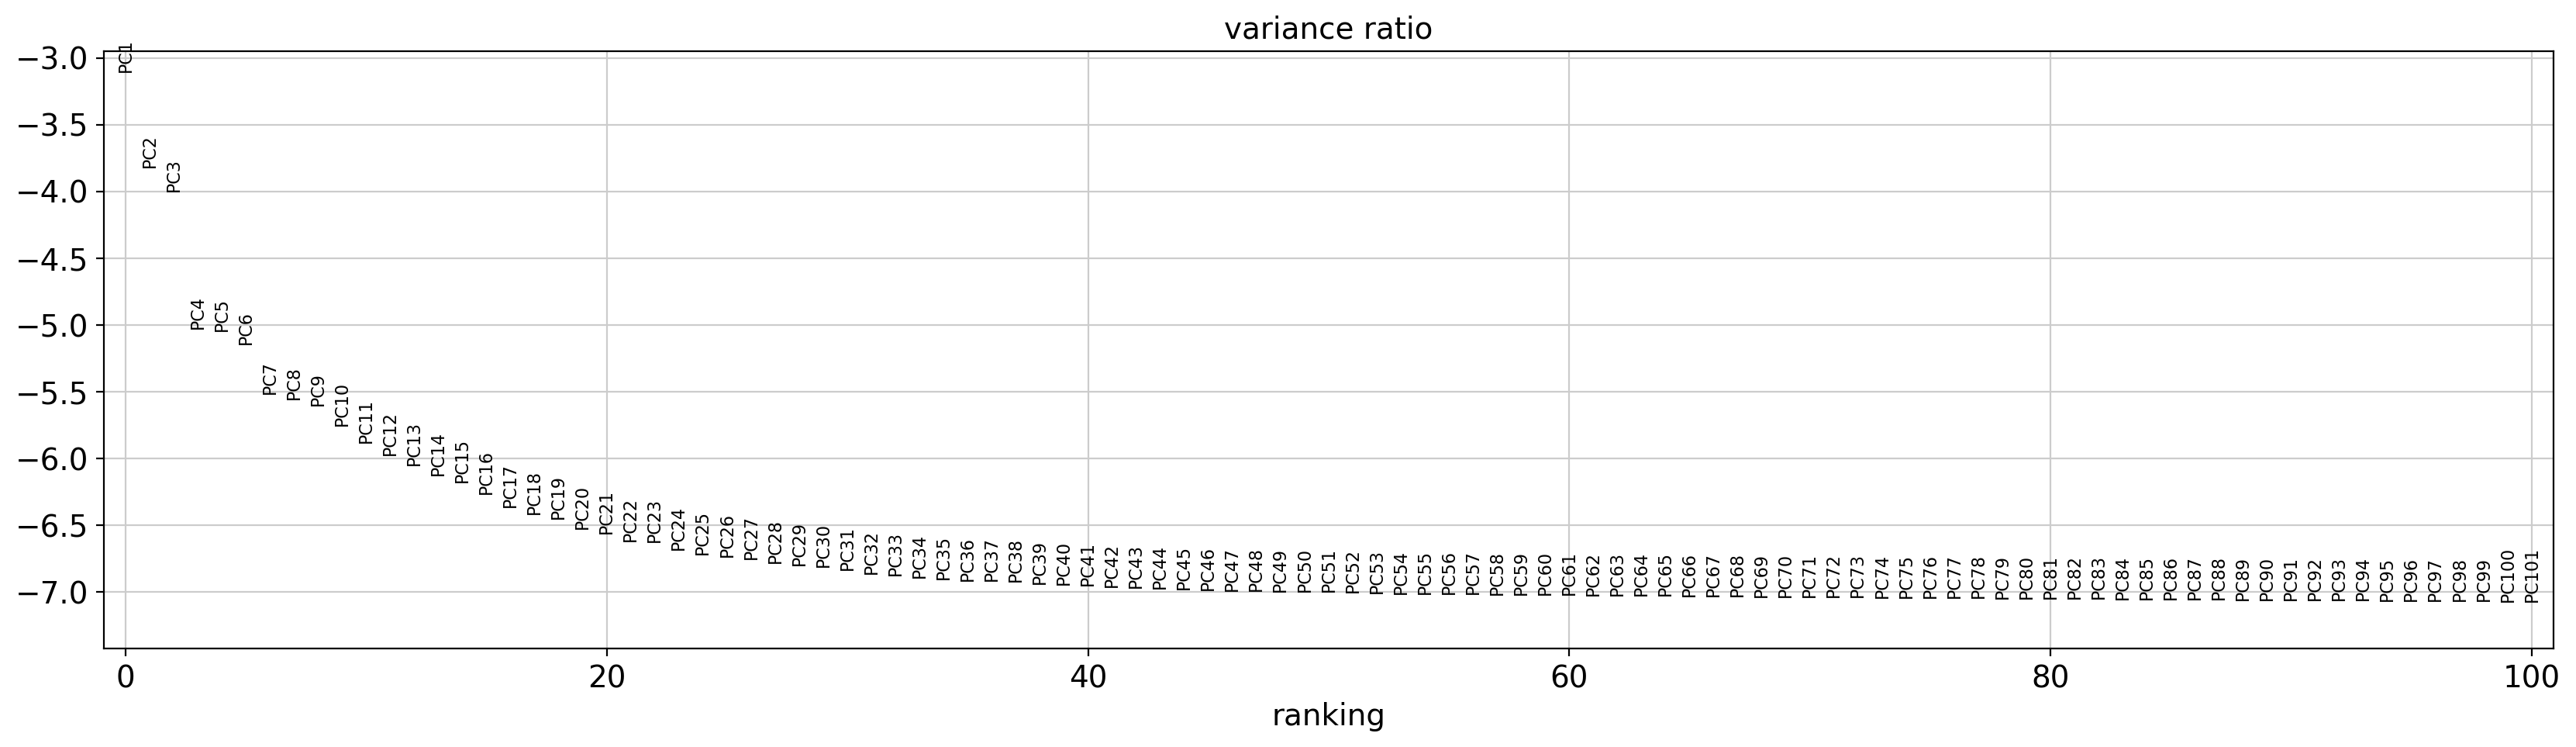


Amount explained variance all PCA L13
0.971577289281413
PCA distribution L14


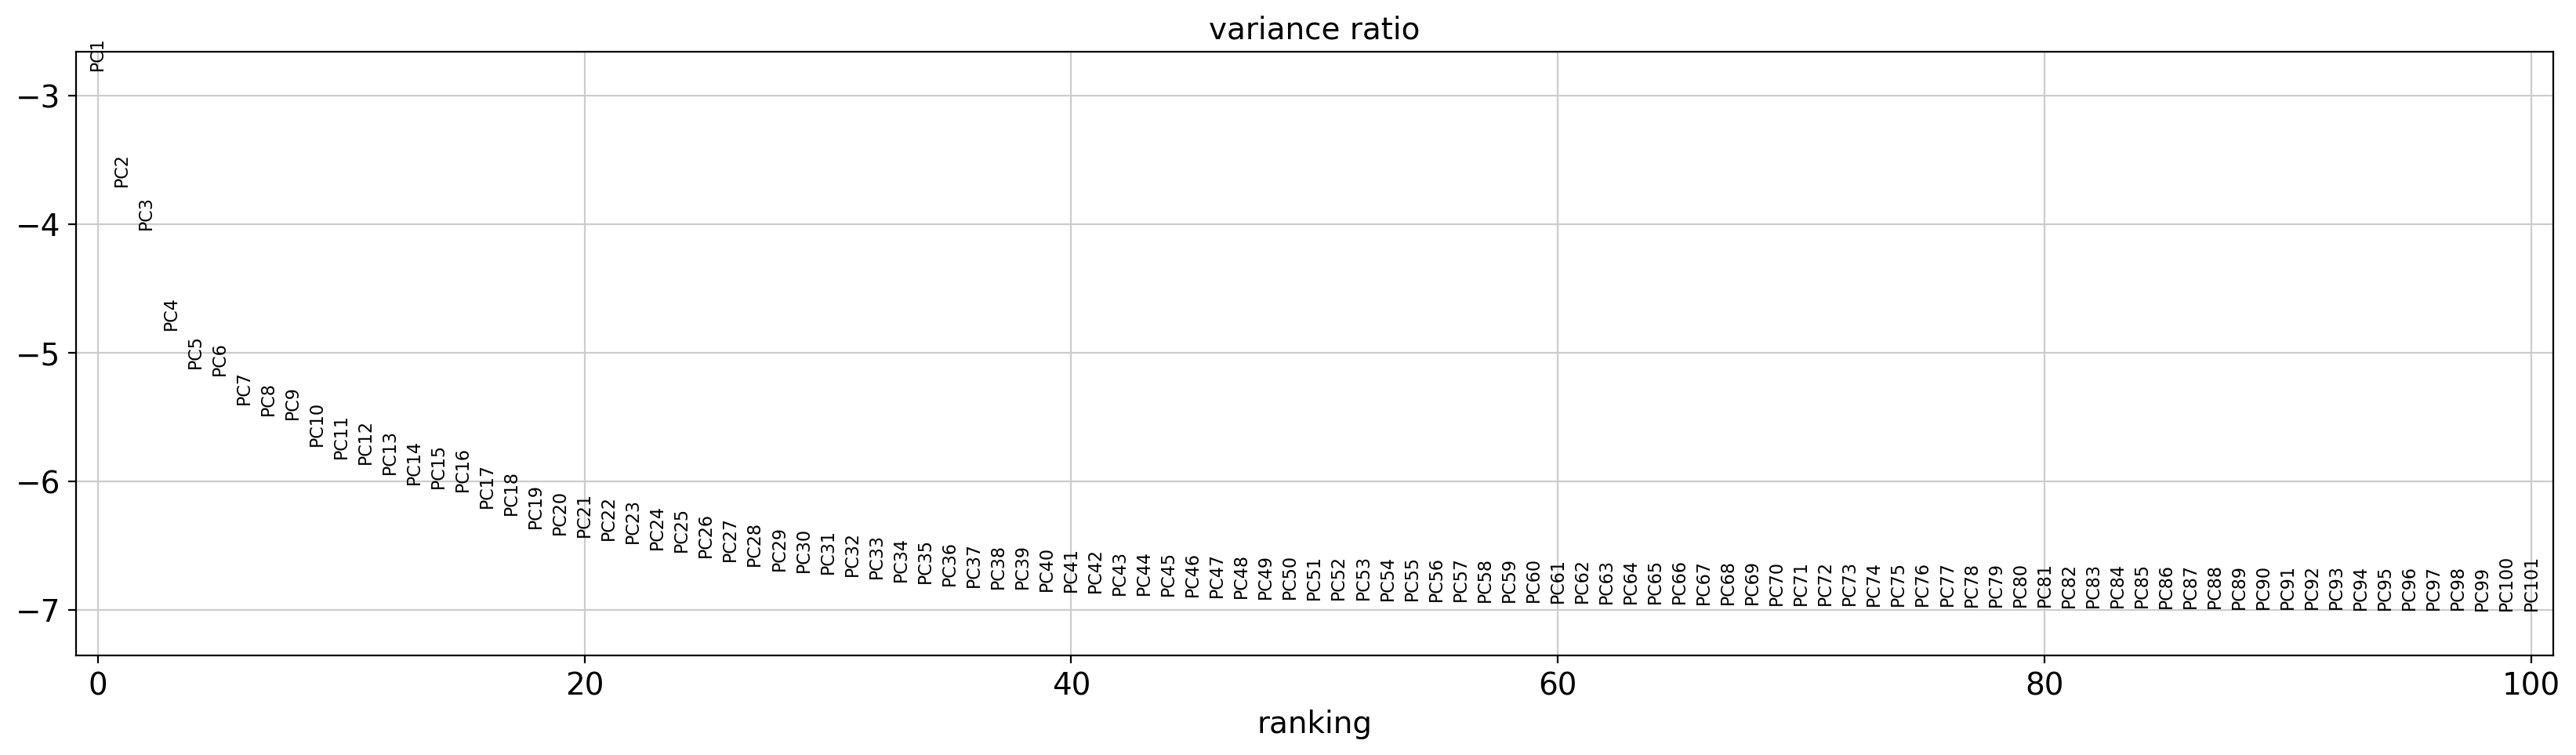


Amount explained variance all PCA L14
0.9975580425088992
PCA variance L1
threshold 500: 0.5589227707241662
threshold 100: 0.24589144275523722
threshold 50: 0.19664409093093127
threshold 30: 0.17464323982130736
PCA variance L2
threshold 500: 0.44777167349820957
threshold 100: 0.17720271419966593
threshold 50: 0.1355753216193989
threshold 30: 0.1177223275299184
PCA variance L3
threshold 500: 0.4059030067292042
threshold 100: 0.15011713228886947
threshold 50: 0.1110271736397408
threshold 30: 0.0943835616344586
PCA variance L4
threshold 500: 0.5091269500553608
threshold 100: 0.20168561802711338
threshold 50: 0.15454147628042847
threshold 30: 0.1342881266027689
PCA variance L5
threshold 500: 0.46229251101613045
threshold 100: 0.170750328397844
threshold 50: 0.12753772595897317
threshold 30: 0.1091232729377225
PCA variance L6
threshold 500: 0.38166742940666154
threshold 100: 0.13604542578104883
threshold 50: 0.09942005184711888
threshold 30: 0.08394275390310213
PCA variance L7
threshold 500

In [50]:
anndata_result = MS1_Clustering.pca_and_plot( 'Lib' , anndata_dict, anndata_dict_all, n_comps_var = 1500, random_state_var = random_state_var)

In [51]:
anndata_result

[{'L1': AnnData object with n_obs × n_vars = 18549 × 21407
      obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet'
      var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable',

### Neighborhood + clustering

In [52]:
### Test using function for first variant

anndata_result = MS1_Clustering.neighbors_and_cluster( 'A7_PCA_50_10_neighbors' , anndata_result[0], anndata_result[1], use_rep_var = 'X_pca' , random_state_var = random_state_var, n_neighbors_var =10, n_pcs_var = 50)


2023-01-20 20:27:07.668287: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 20:27:07.668348: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Calculated neighborhood graph
Clustered cells
L1A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L2A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L3A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L4A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L5A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L6A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L7A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L8A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L9A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L10A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L11A7_PCA_50_10_neighbors variant finished
Calculated neighborhood graph


In [53]:
anndata_result = MS1_Clustering.neighbors_and_cluster( 'A7_PCA_100_10_neighbors' , anndata_result[0], anndata_result[1], use_rep_var = 'X_pca' , random_state_var = random_state_var, n_neighbors_var =10, n_pcs_var = 100)

Calculated neighborhood graph
Clustered cells
L1A7_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L2A7_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L3A7_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L4A7_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L5A7_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L6A7_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L7A7_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L8A7_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L9A7_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L10A7_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L11A7_PCA_100_10_neighbors variant finished
Calculated neighbor

In [54]:
anndata_result = MS1_Clustering.neighbors_and_cluster( 'A7_PCA_100_50_neighbors' , anndata_result[0], anndata_result[1], use_rep_var = 'X_pca' , random_state_var = random_state_var, n_neighbors_var =50, n_pcs_var = 100)

Calculated neighborhood graph
Clustered cells
L1A7_PCA_100_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L2A7_PCA_100_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L3A7_PCA_100_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L4A7_PCA_100_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L5A7_PCA_100_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L6A7_PCA_100_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L7A7_PCA_100_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L8A7_PCA_100_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L9A7_PCA_100_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L10A7_PCA_100_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L11A7_PCA_100_50_neighbors variant finished
Calculated neighbor

In [55]:
anndata_result = MS1_Clustering.neighbors_and_cluster( 'A7_PCA_500_50_neighbors' , anndata_result[0], anndata_result[1], use_rep_var = 'X_pca' , random_state_var = random_state_var, n_neighbors_var =50, n_pcs_var = 500)

Calculated neighborhood graph
Clustered cells
L1A7_PCA_500_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L2A7_PCA_500_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L3A7_PCA_500_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L4A7_PCA_500_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L5A7_PCA_500_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L6A7_PCA_500_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L7A7_PCA_500_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L8A7_PCA_500_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L9A7_PCA_500_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L10A7_PCA_500_50_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L11A7_PCA_500_50_neighbors variant finished
Calculated neighbor

In [56]:
# anndata_result

In [57]:
### Save results

In [58]:
anndata_dict = anndata_result[0]

In [59]:
anndata_dict

{'L1': AnnData object with n_obs × n_vars = 18549 × 21407
     obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet', 'A7_PCA_50_10_neighbors_cluster', 'A7_PCA_100_10_neighbors_cluster', 'A7_PCA_100_50_neighbors_cluster', 'A7_PCA_500_50_neighbors_cluster'
     var: 'gene_ids', 'feature_

## Singlets

### PCA

PCA distribution L1


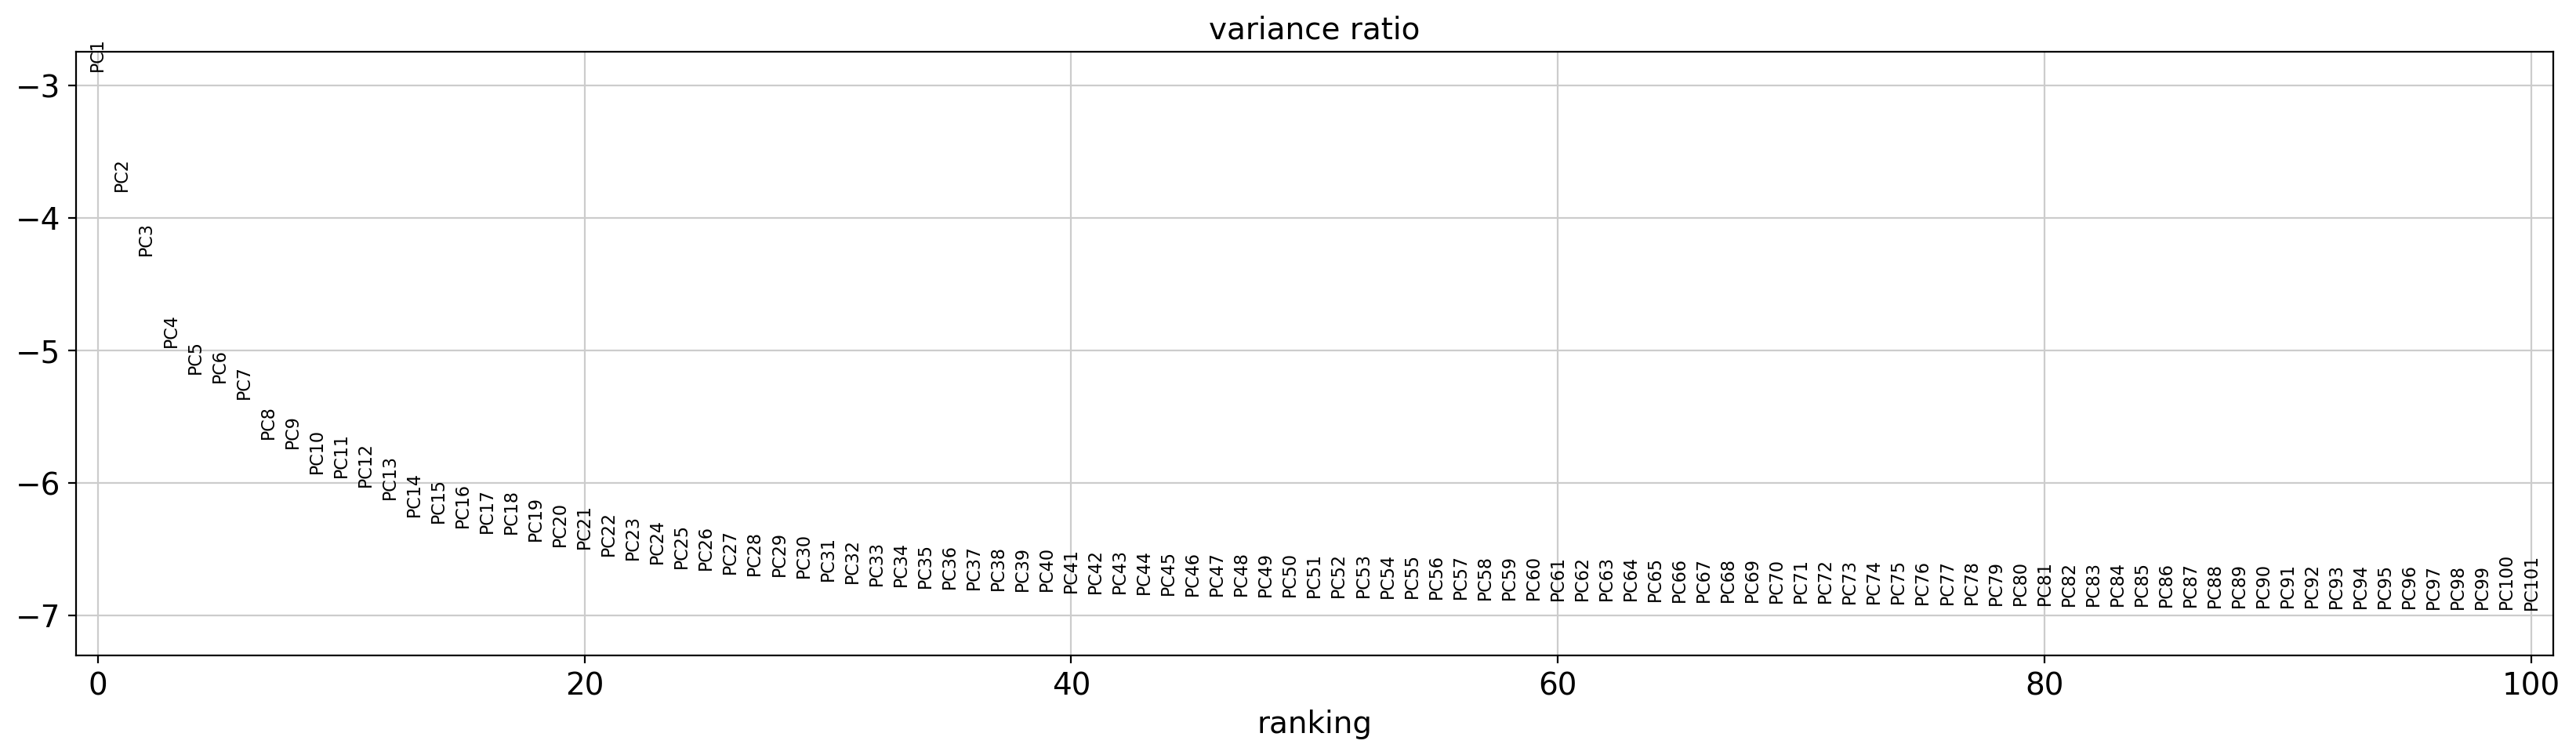


Amount explained variance all PCA L1
0.9547557195328409
PCA distribution L2


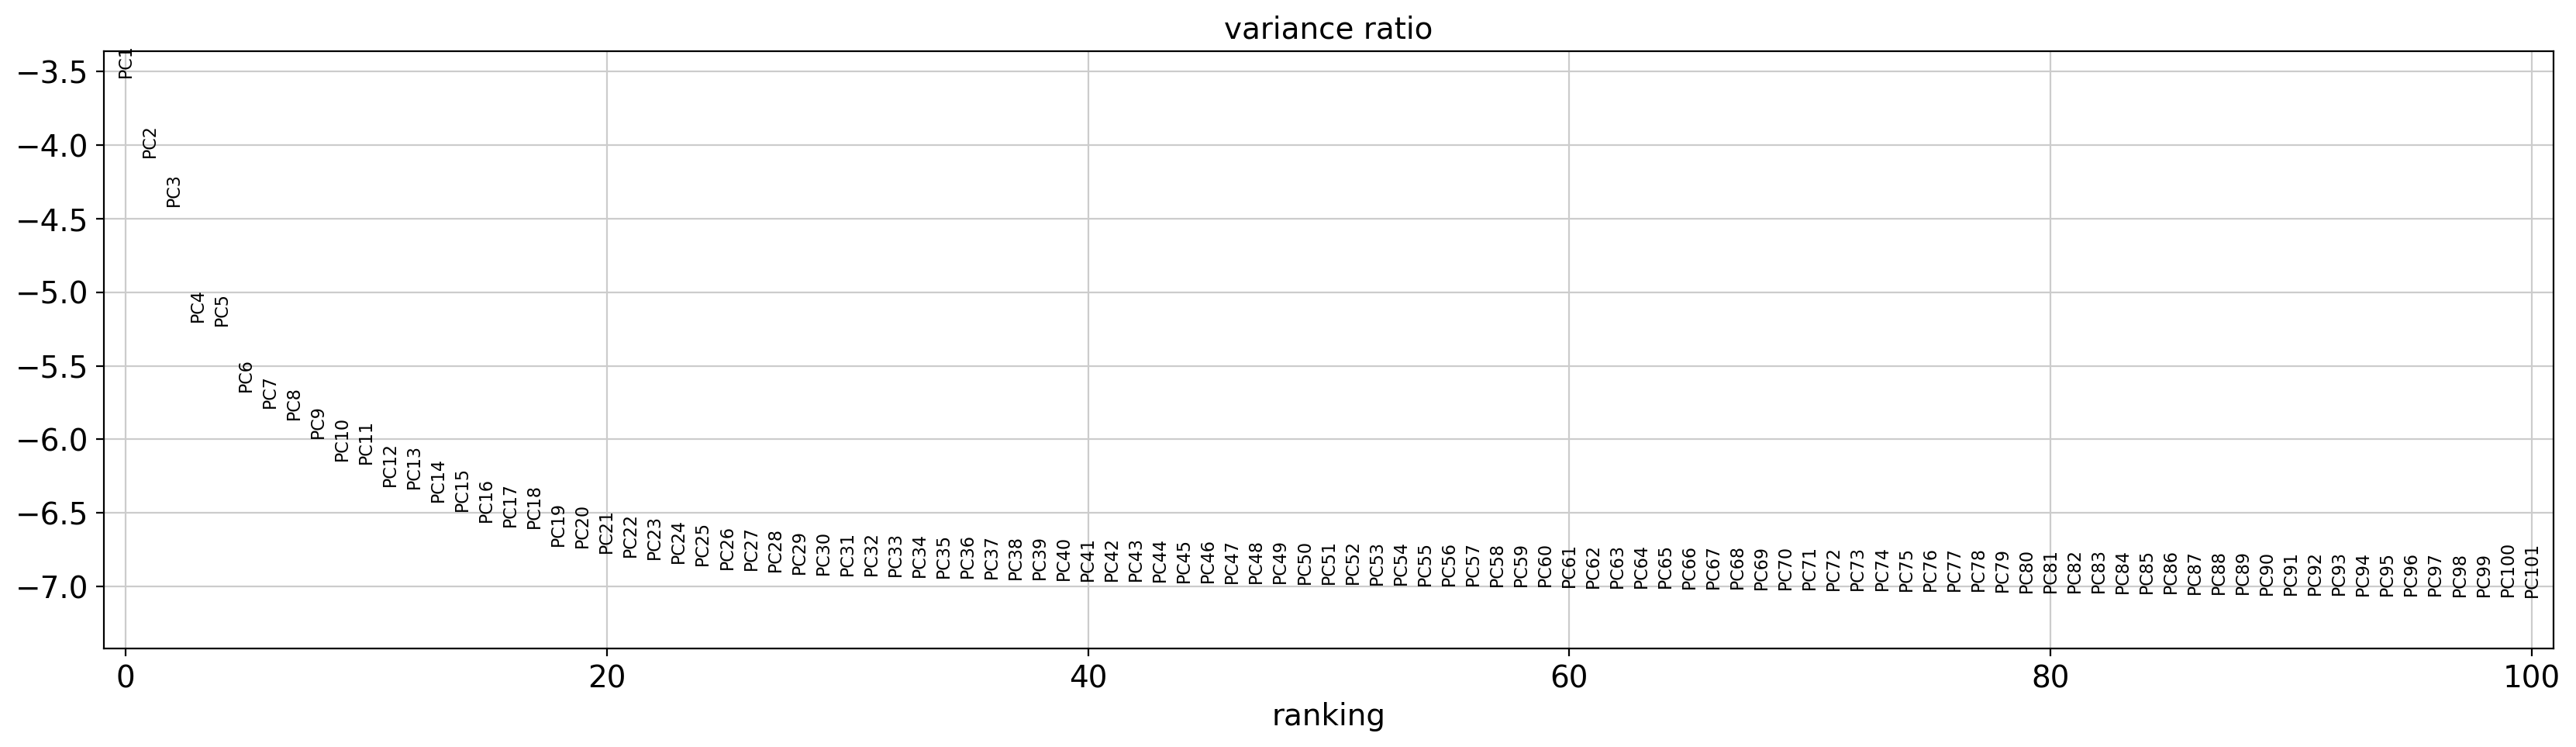


Amount explained variance all PCA L2
0.8438185618433636
PCA distribution L3


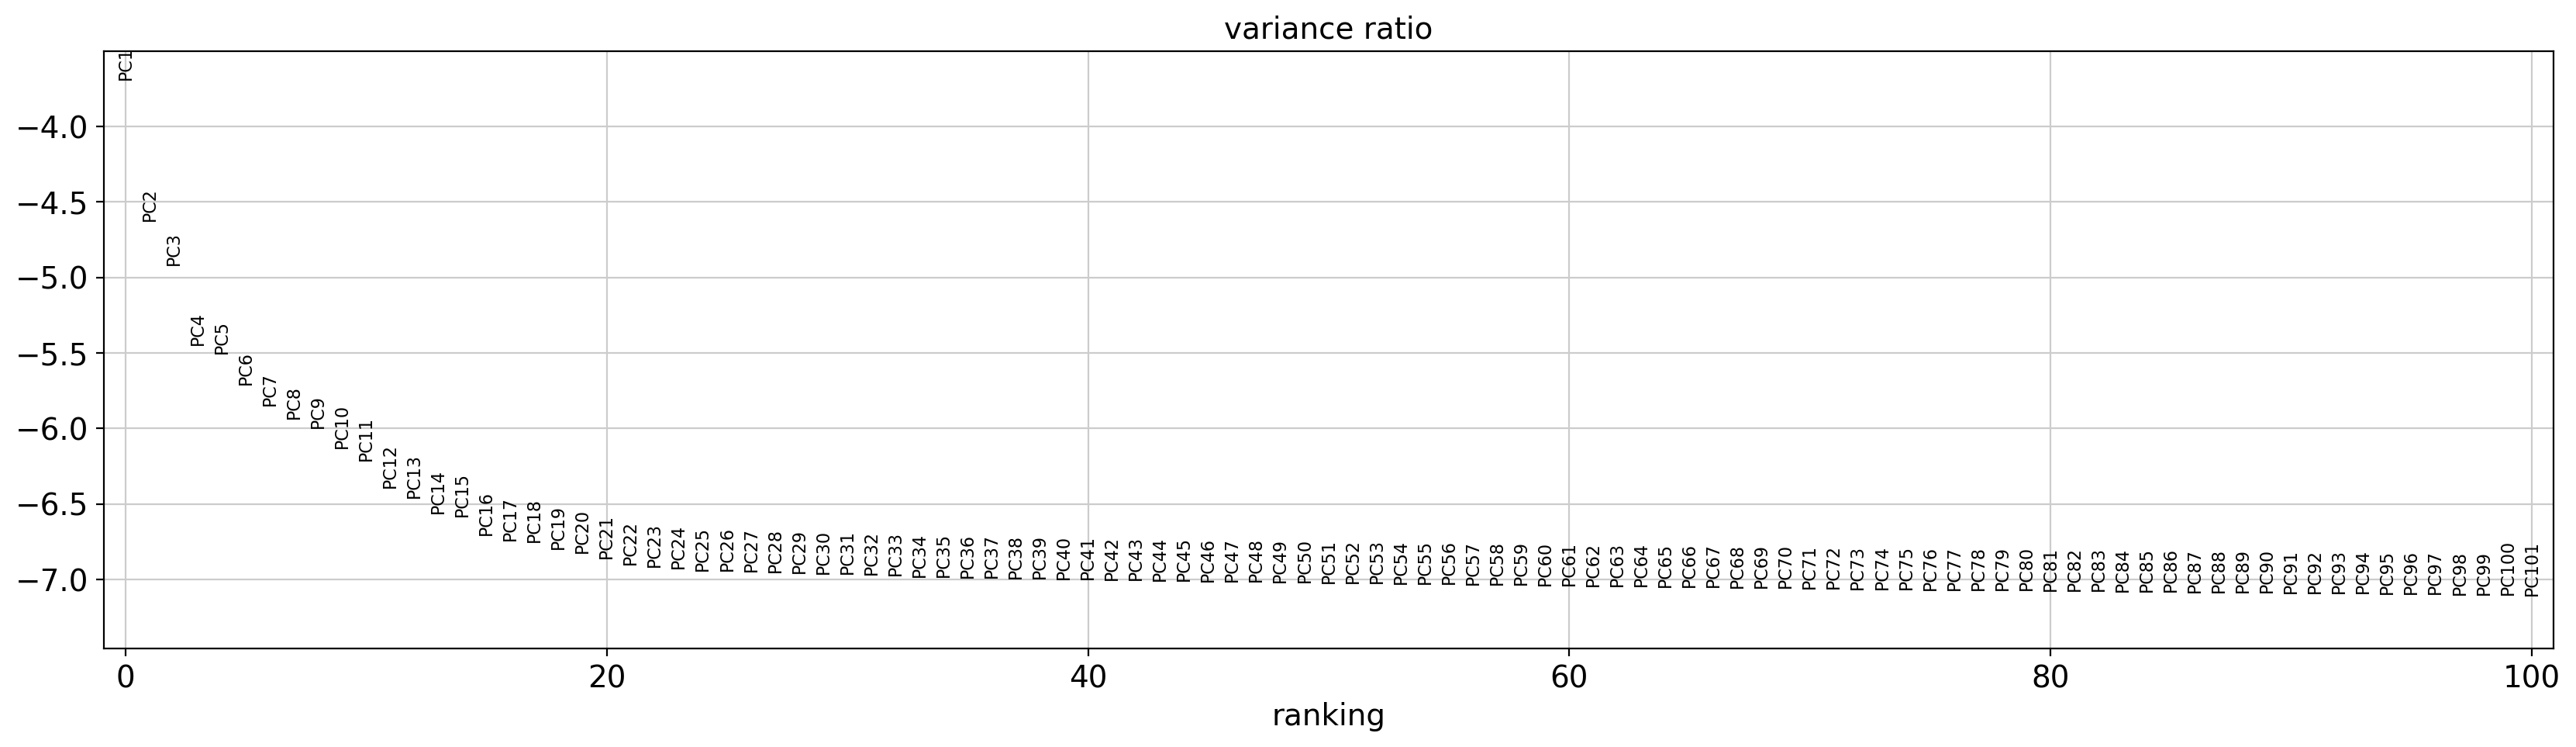


Amount explained variance all PCA L3
0.8051753981853835
PCA distribution L4


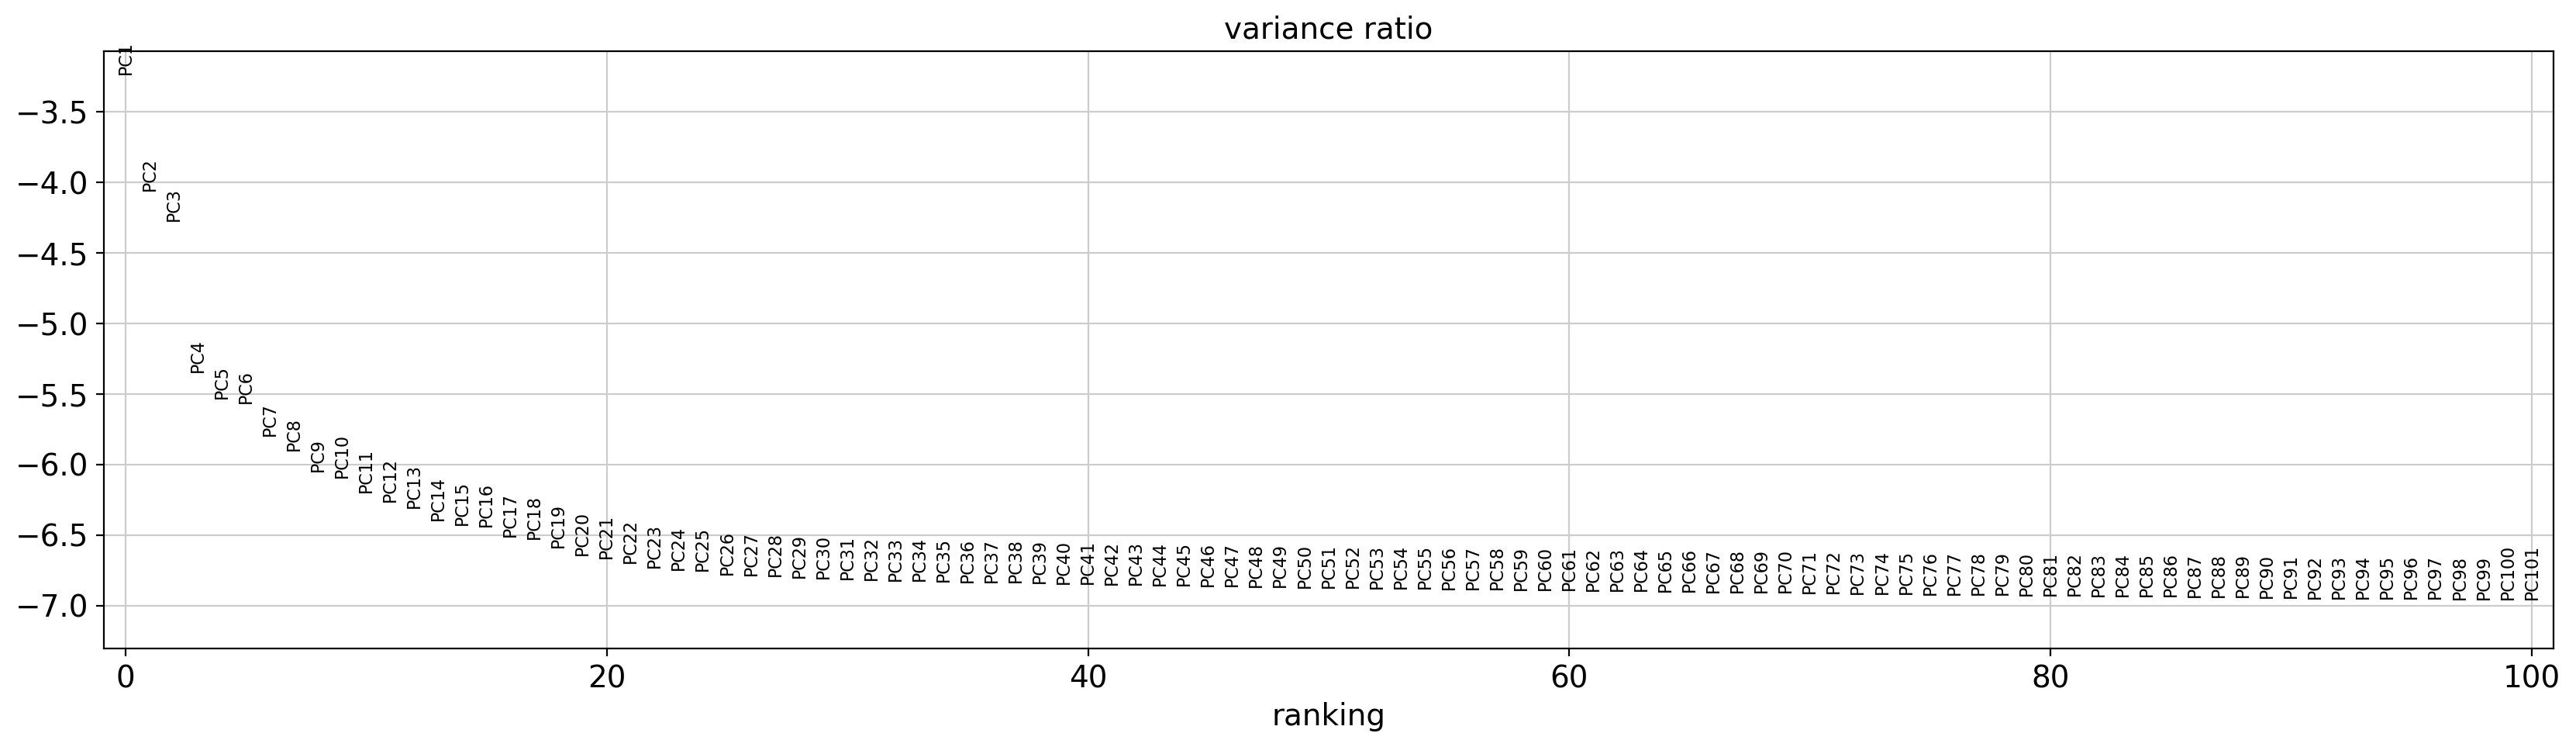


Amount explained variance all PCA L4
0.9241514173627365
PCA distribution L5


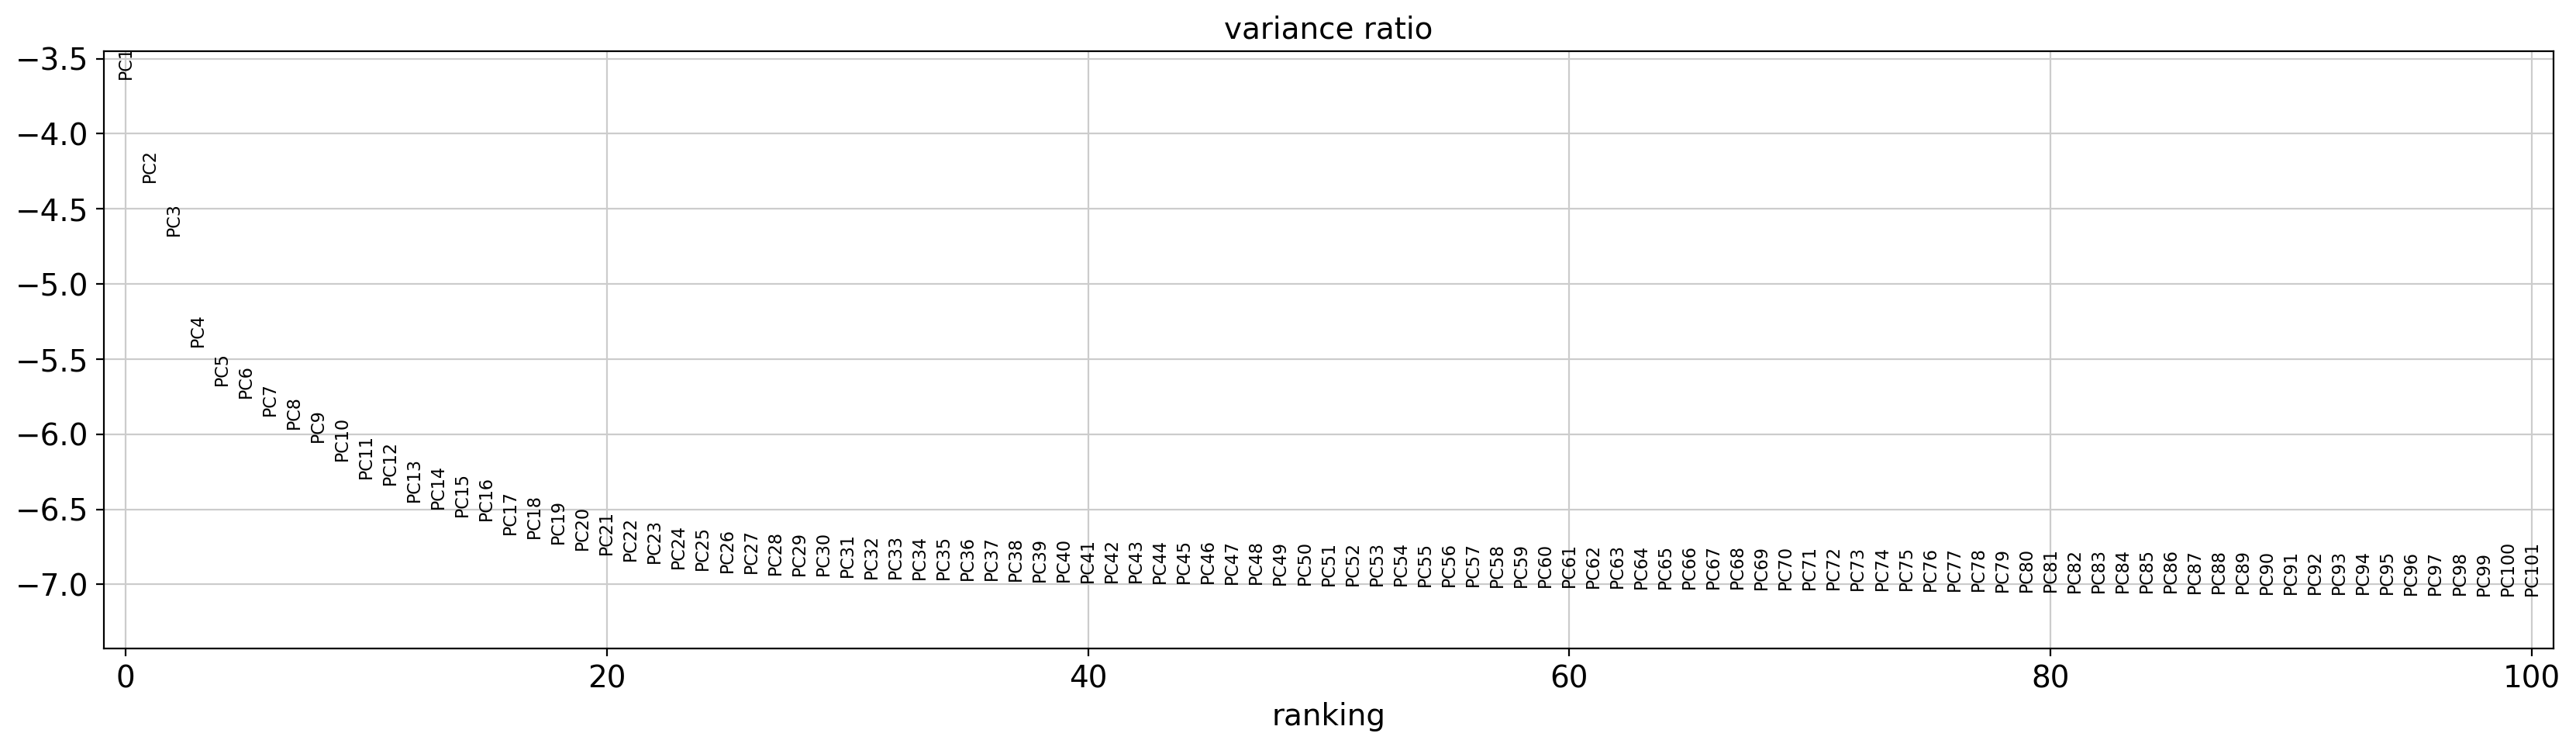


Amount explained variance all PCA L5
0.8645299558120314
PCA distribution L6


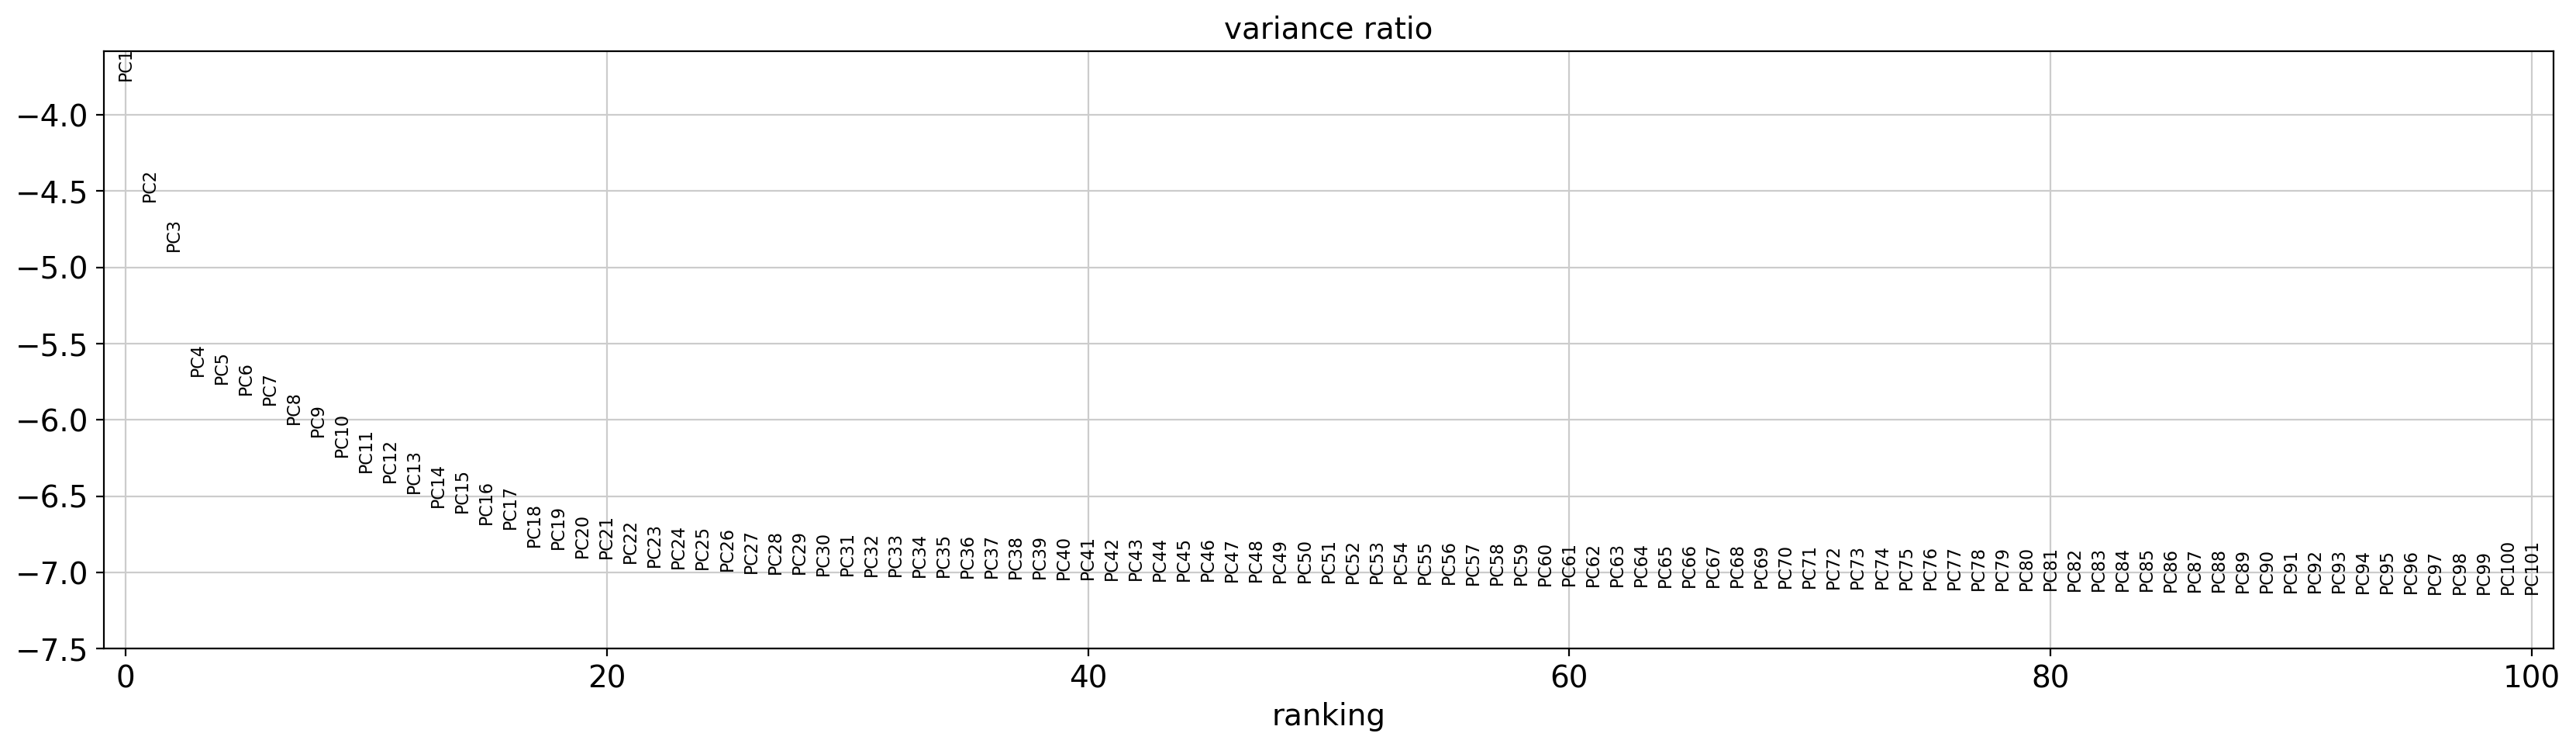


Amount explained variance all PCA L6
0.795863832172472
PCA distribution L7


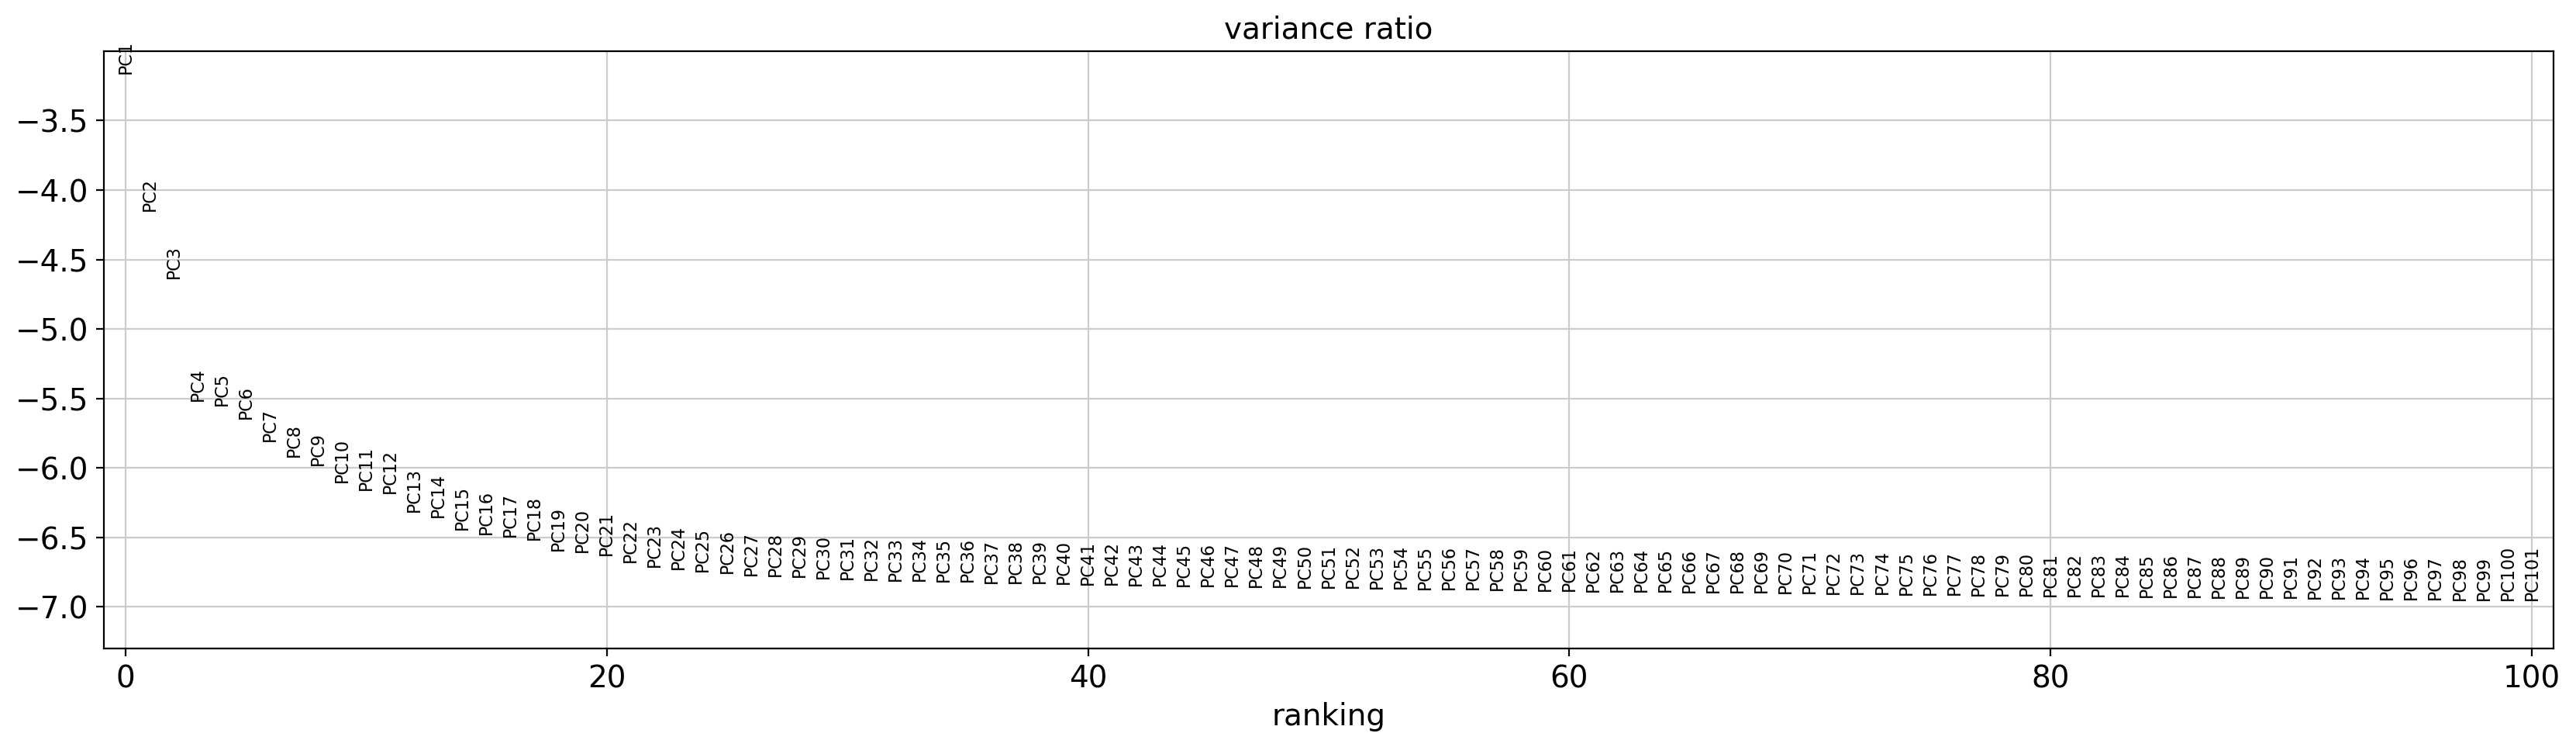


Amount explained variance all PCA L7
0.9071834182250313
PCA distribution L8


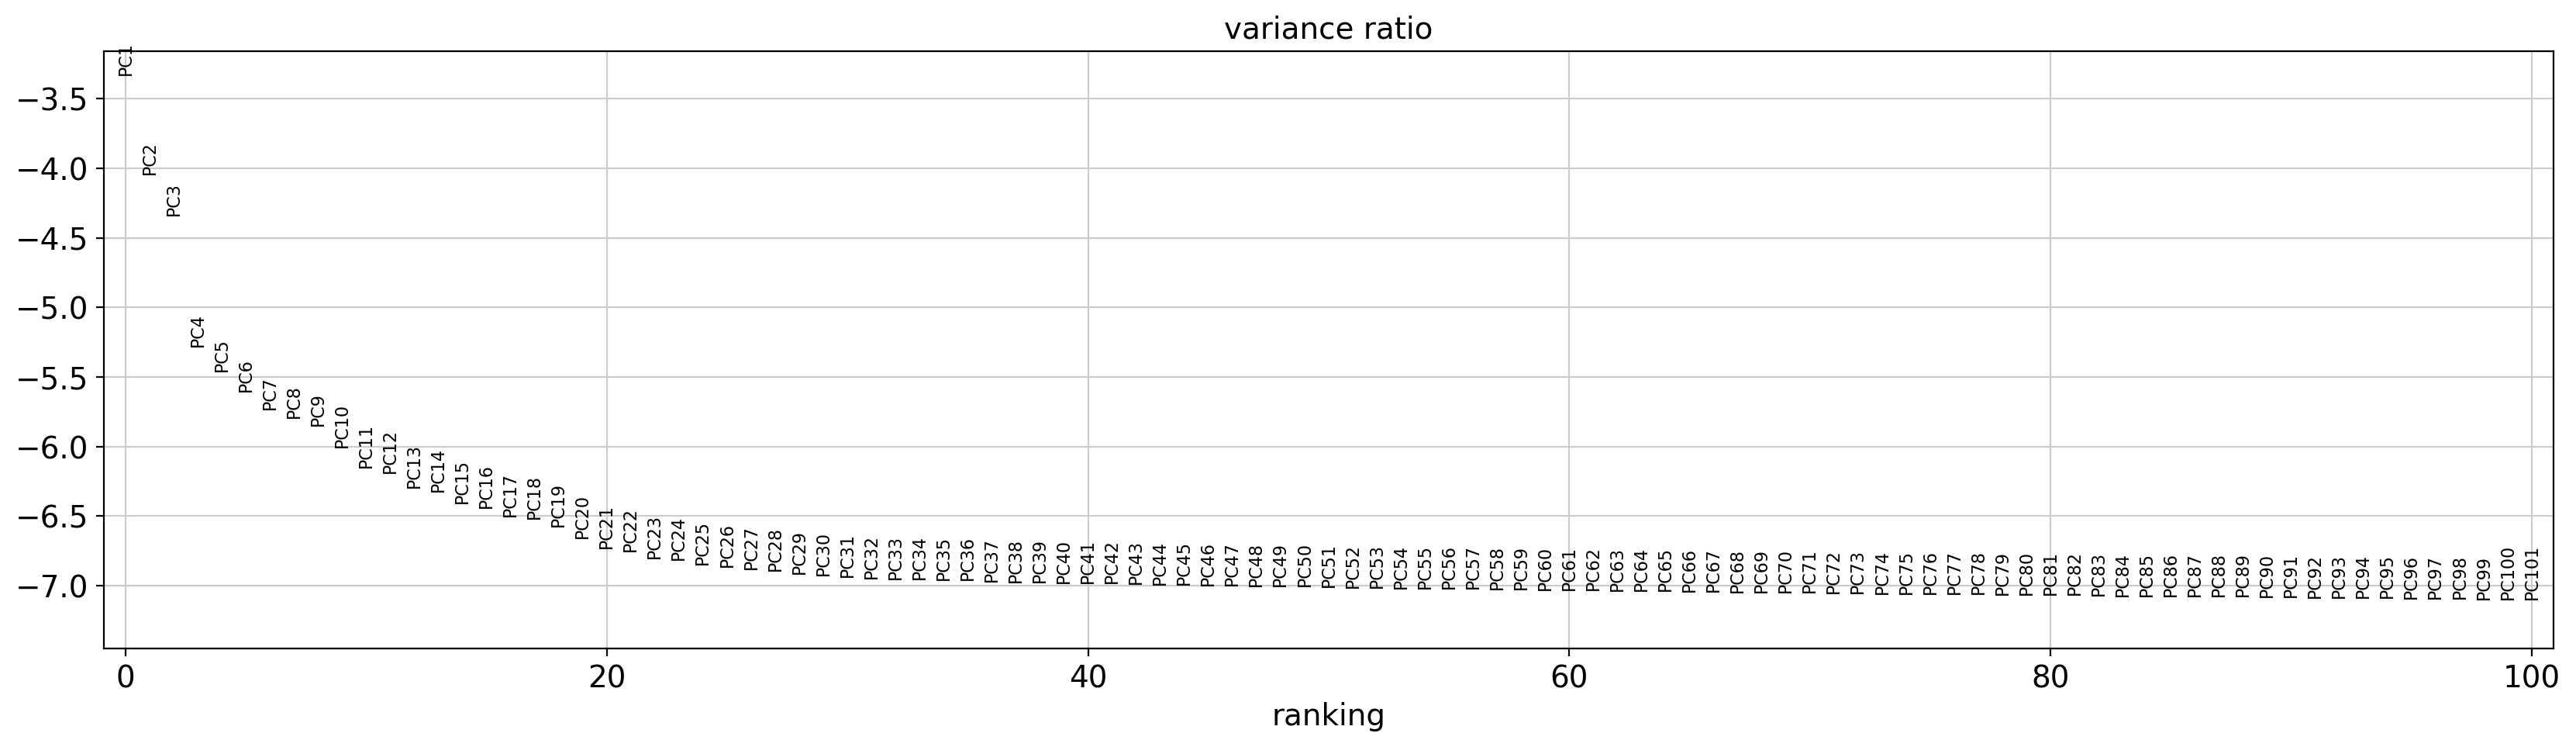


Amount explained variance all PCA L8
0.8376838997646701
PCA distribution L9


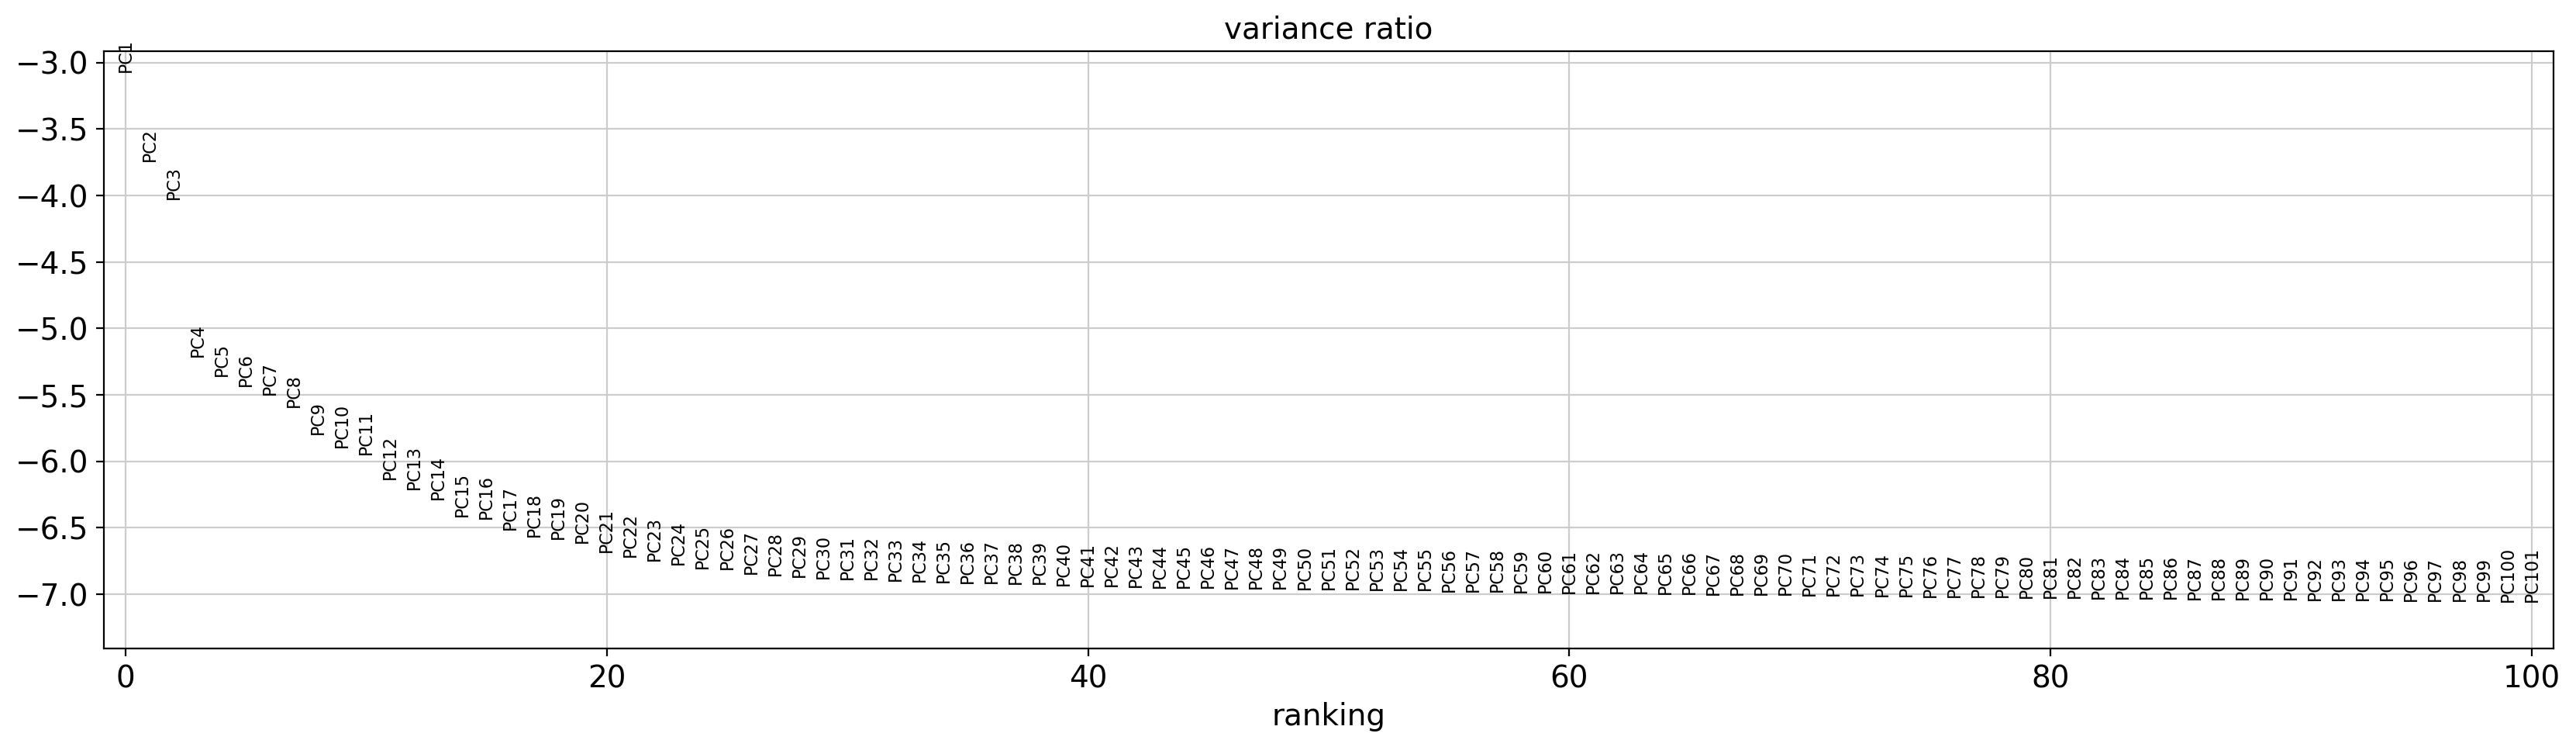


Amount explained variance all PCA L9
0.8847999547724612
PCA distribution L10


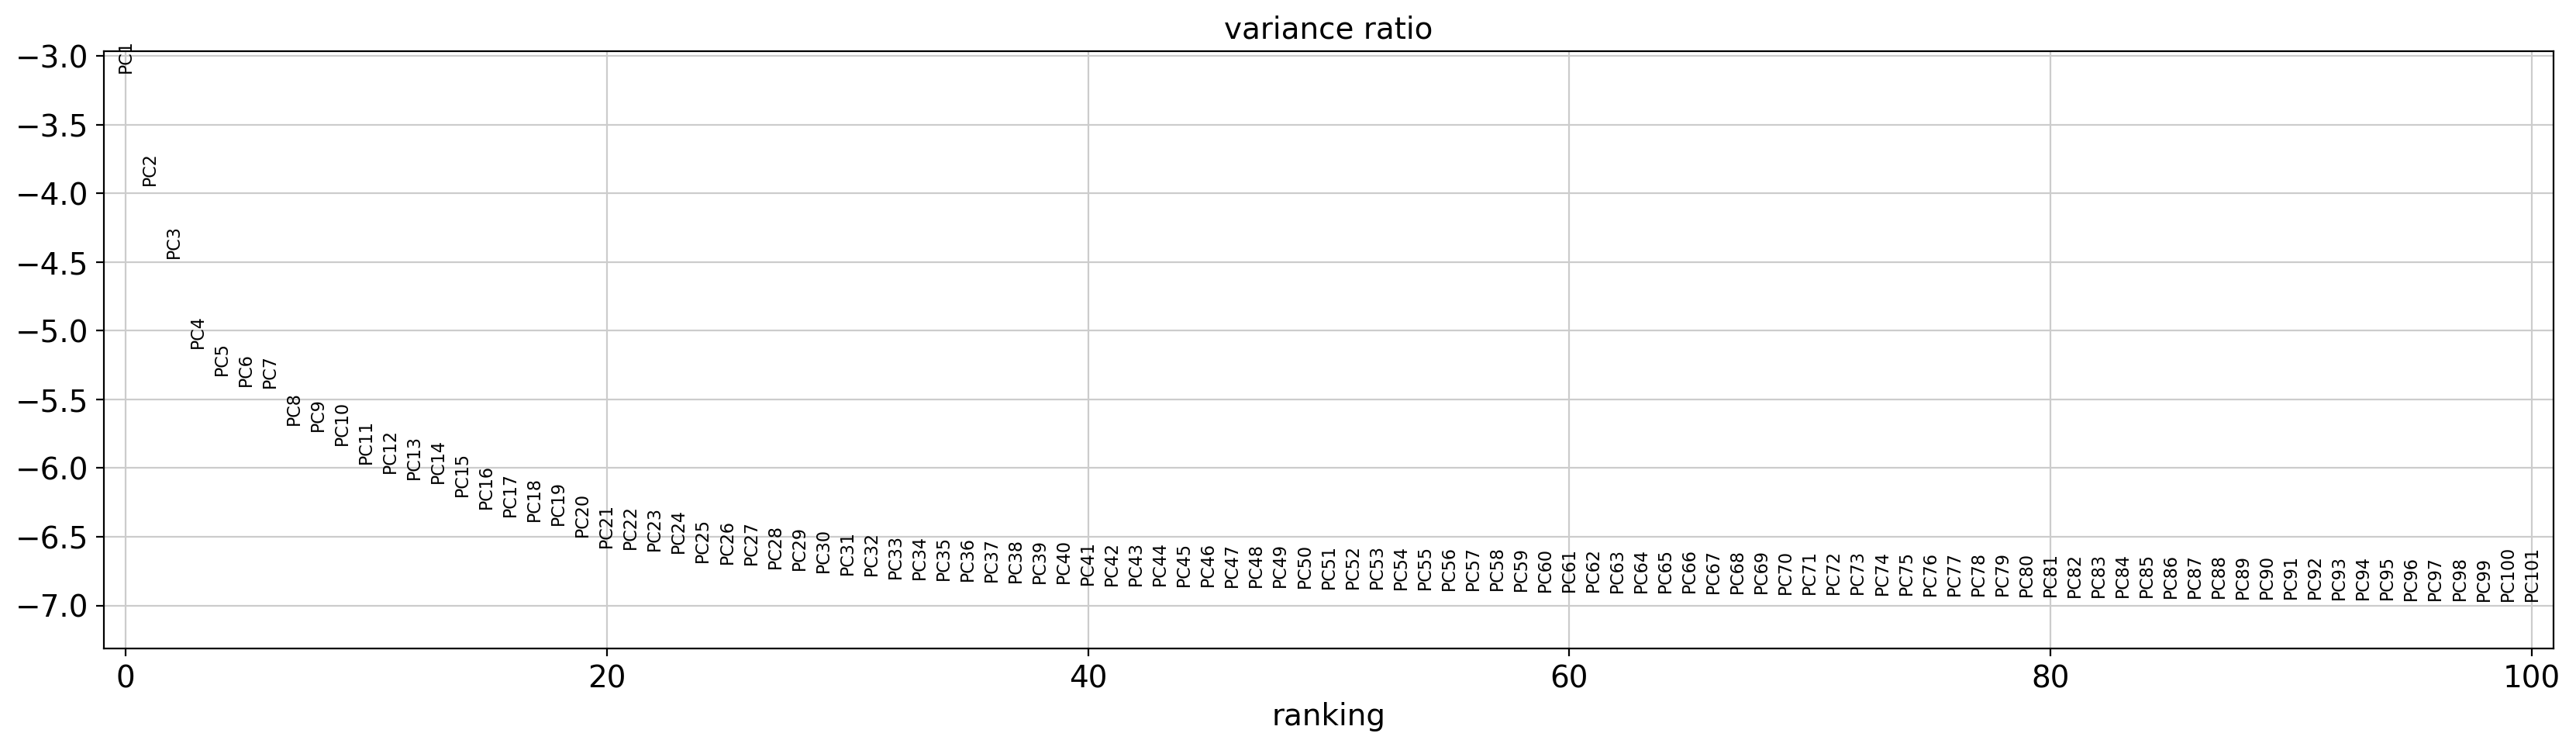


Amount explained variance all PCA L10
0.9185010525688995
PCA distribution L11


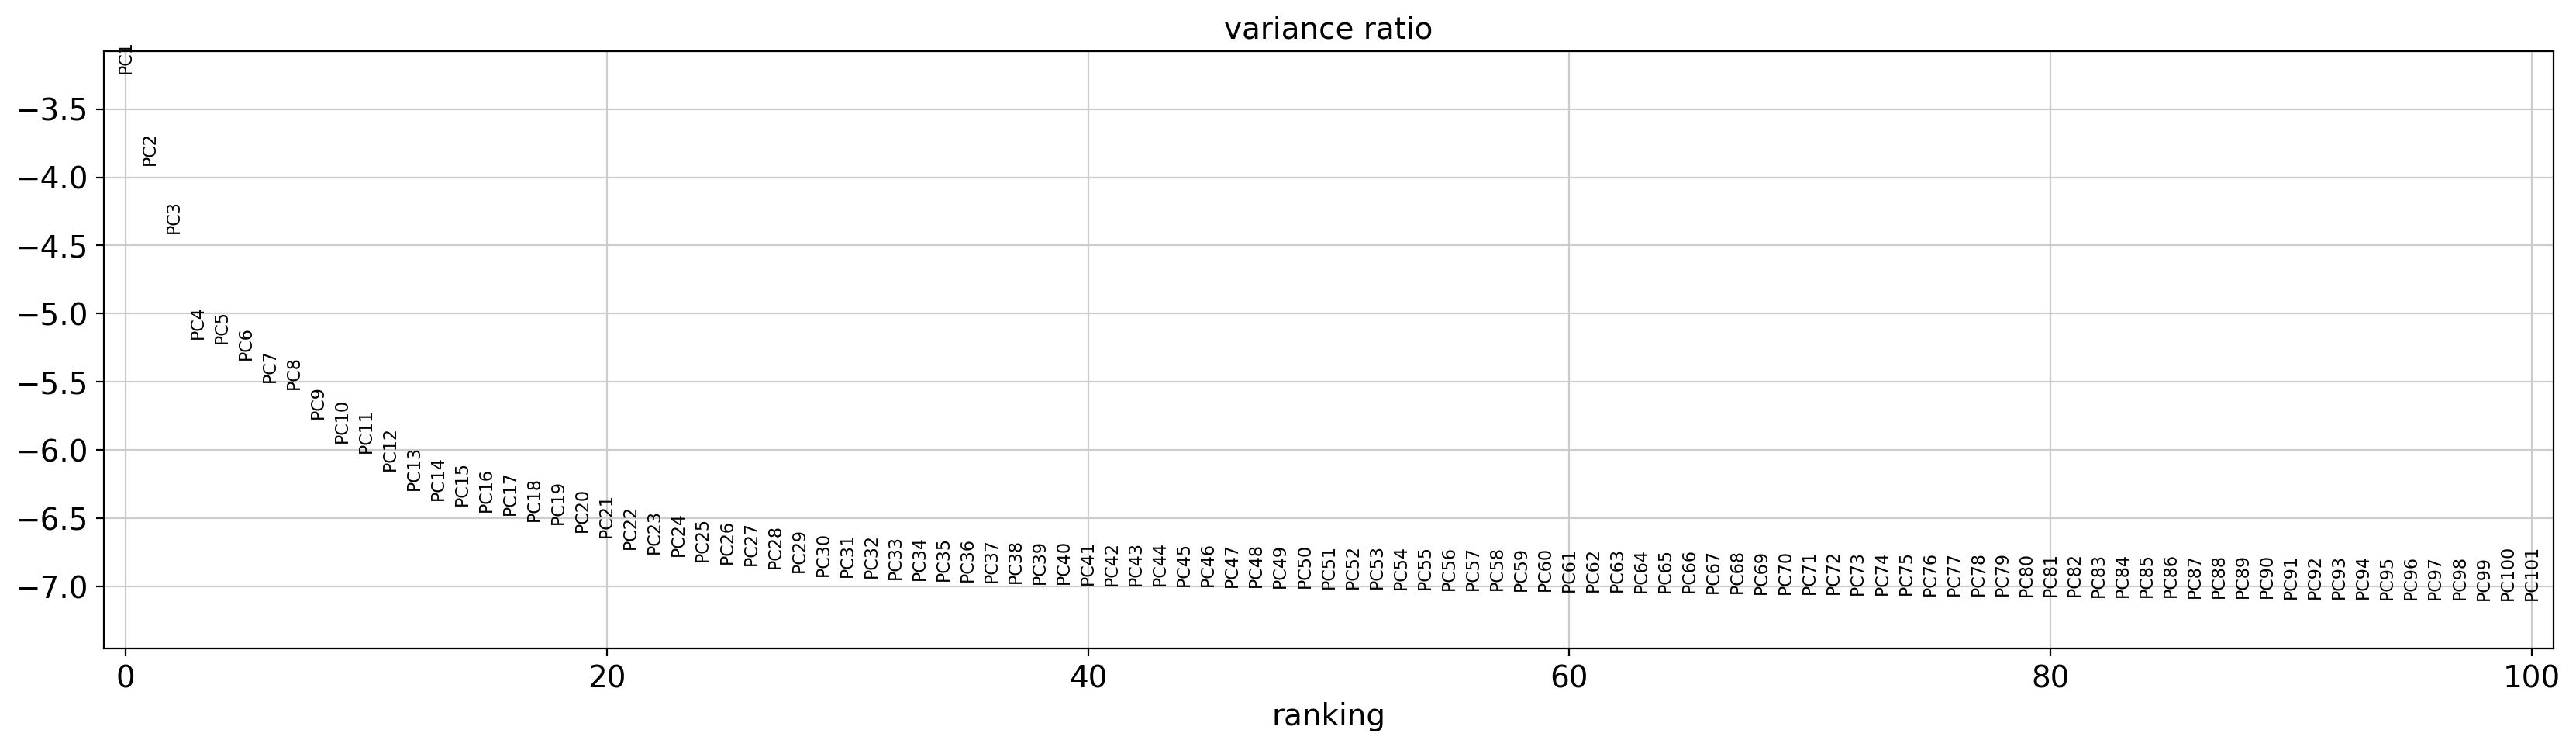


Amount explained variance all PCA L11
0.8534227502823342
PCA distribution L12


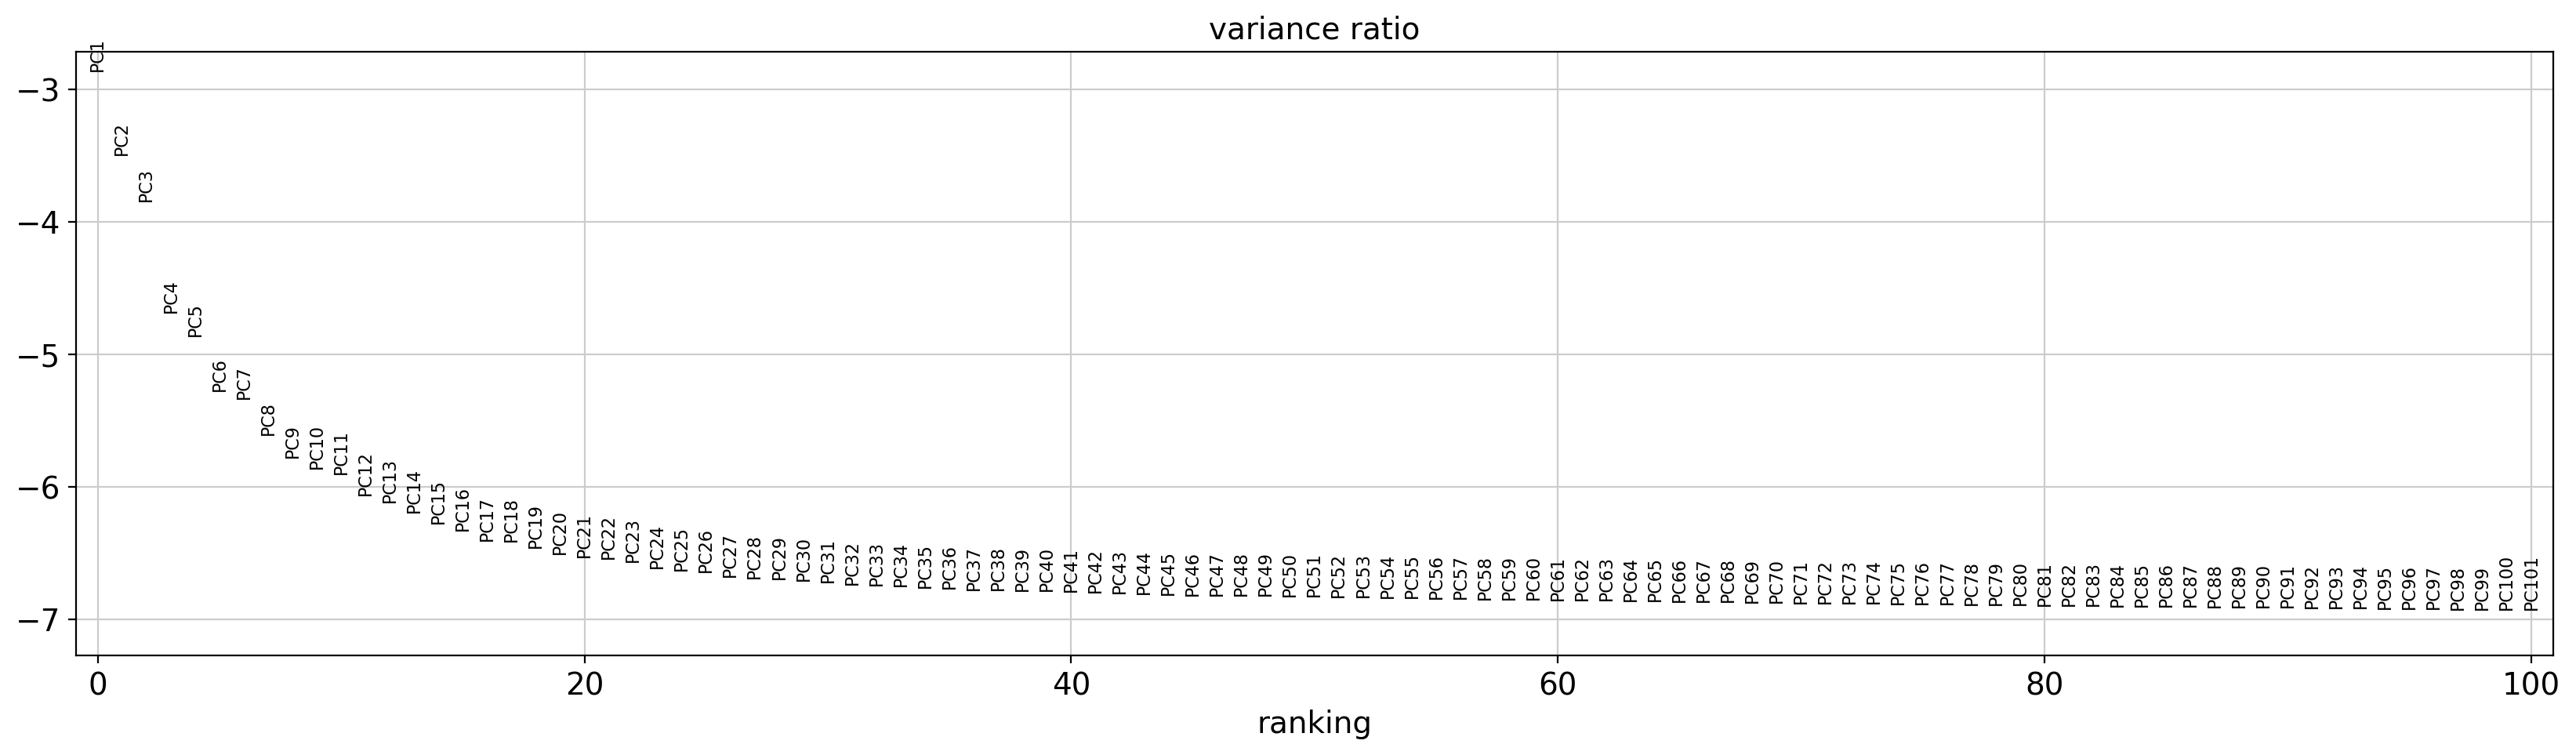


Amount explained variance all PCA L12
0.962534427511855
PCA distribution L13


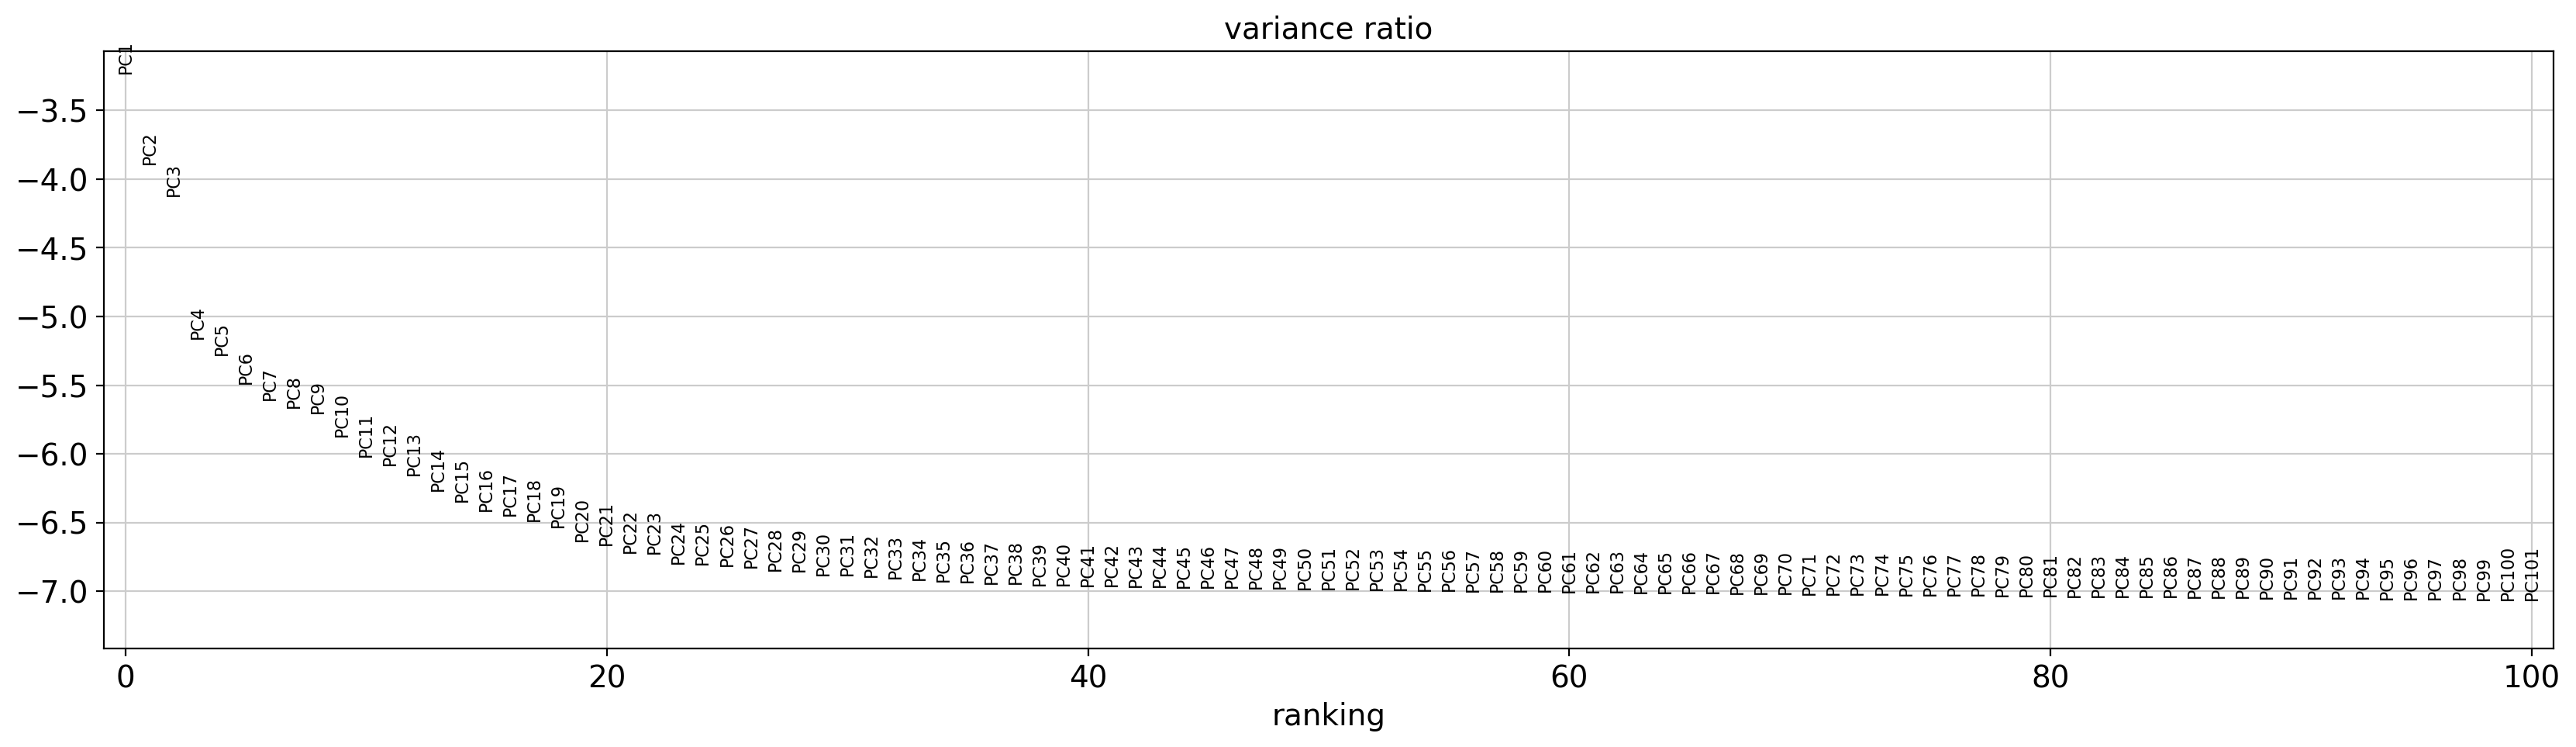


Amount explained variance all PCA L13
0.90704723939416
PCA distribution L14


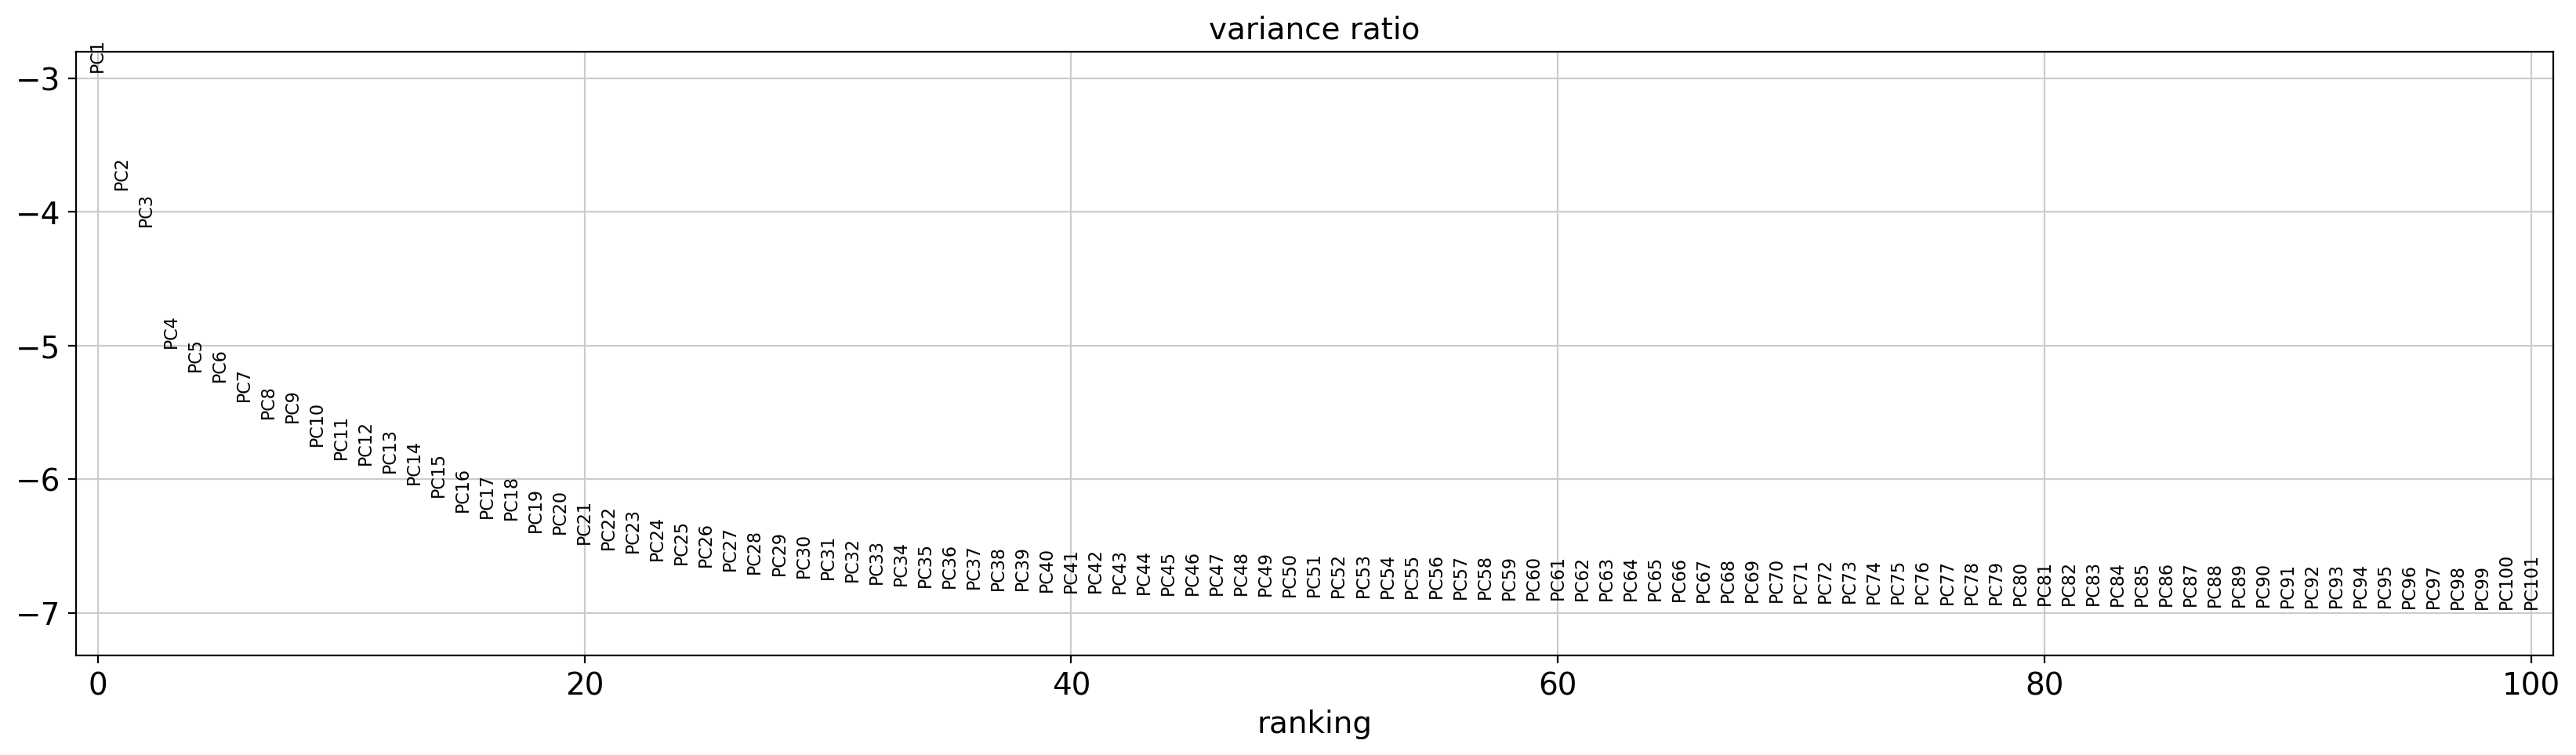


Amount explained variance all PCA L14
0.9450695836858358
PCA variance L1
threshold 500: 0.5369465294061229
threshold 100: 0.22772507317131385
threshold 50: 0.1778387501835823
threshold 30: 0.15589114546310157
PCA variance L2
threshold 500: 0.4484926405712031
threshold 100: 0.17206156899919733
threshold 50: 0.12777486094273627
threshold 30: 0.10872339305933565
PCA variance L3
threshold 500: 0.4167013525729999
threshold 100: 0.14858320786152035
threshold 50: 0.10586013115243986
threshold 30: 0.08757222956046462
PCA variance L4
threshold 500: 0.5004893227596767
threshold 100: 0.19217233447125182
threshold 50: 0.1427199434256181
threshold 30: 0.1214336211560294
PCA variance L5
threshold 500: 0.43960677046561614
threshold 100: 0.1567291424726136
threshold 50: 0.11292112781666219
threshold 30: 0.09431434160796925
PCA variance L6
threshold 500: 0.4025287986150943
threshold 100: 0.1405227382783778
threshold 50: 0.09956695110304281
threshold 30: 0.08211228909203783
PCA variance L7
threshold 50

In [60]:
anndata_result = MS1_Clustering.pca_and_plot( 'Lib_Singlet' , anndata_dict_singlet, anndata_dict_singlet, n_comps_var = 1500, random_state_var = random_state_var)

### Neighborhood + clustering

In [61]:
### Test using function for first variant

anndata_result = MS1_Clustering.neighbors_and_cluster( 'A7_Singlet_PCA_50_10_neighbors' , anndata_result[0], anndata_result[1], use_rep_var = 'X_pca' , random_state_var = random_state_var, n_neighbors_var =10, n_pcs_var = 50)


Calculated neighborhood graph
Clustered cells
L1A7_Singlet_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L2A7_Singlet_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L3A7_Singlet_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L4A7_Singlet_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L5A7_Singlet_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L6A7_Singlet_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L7A7_Singlet_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L8A7_Singlet_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L9A7_Singlet_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L10A7_Singlet_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered

In [62]:
anndata_result = MS1_Clustering.neighbors_and_cluster( 'A7_Singlet_PCA_100_10_neighbors' , anndata_result[0], anndata_result[1], use_rep_var = 'X_pca' , random_state_var = random_state_var, n_neighbors_var =10, n_pcs_var = 100)

Calculated neighborhood graph
Clustered cells
L1A7_Singlet_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L2A7_Singlet_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L3A7_Singlet_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L4A7_Singlet_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L5A7_Singlet_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L6A7_Singlet_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L7A7_Singlet_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L8A7_Singlet_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L9A7_Singlet_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L10A7_Singlet_PCA_100_10_neighbors variant finished
Calculated neighborhood graph

In [63]:
# anndata_result

In [64]:
anndata_dict_singlet = anndata_result[0]

## Singlets - without ribosomal / mitochondrial RNA

PCA distribution L1


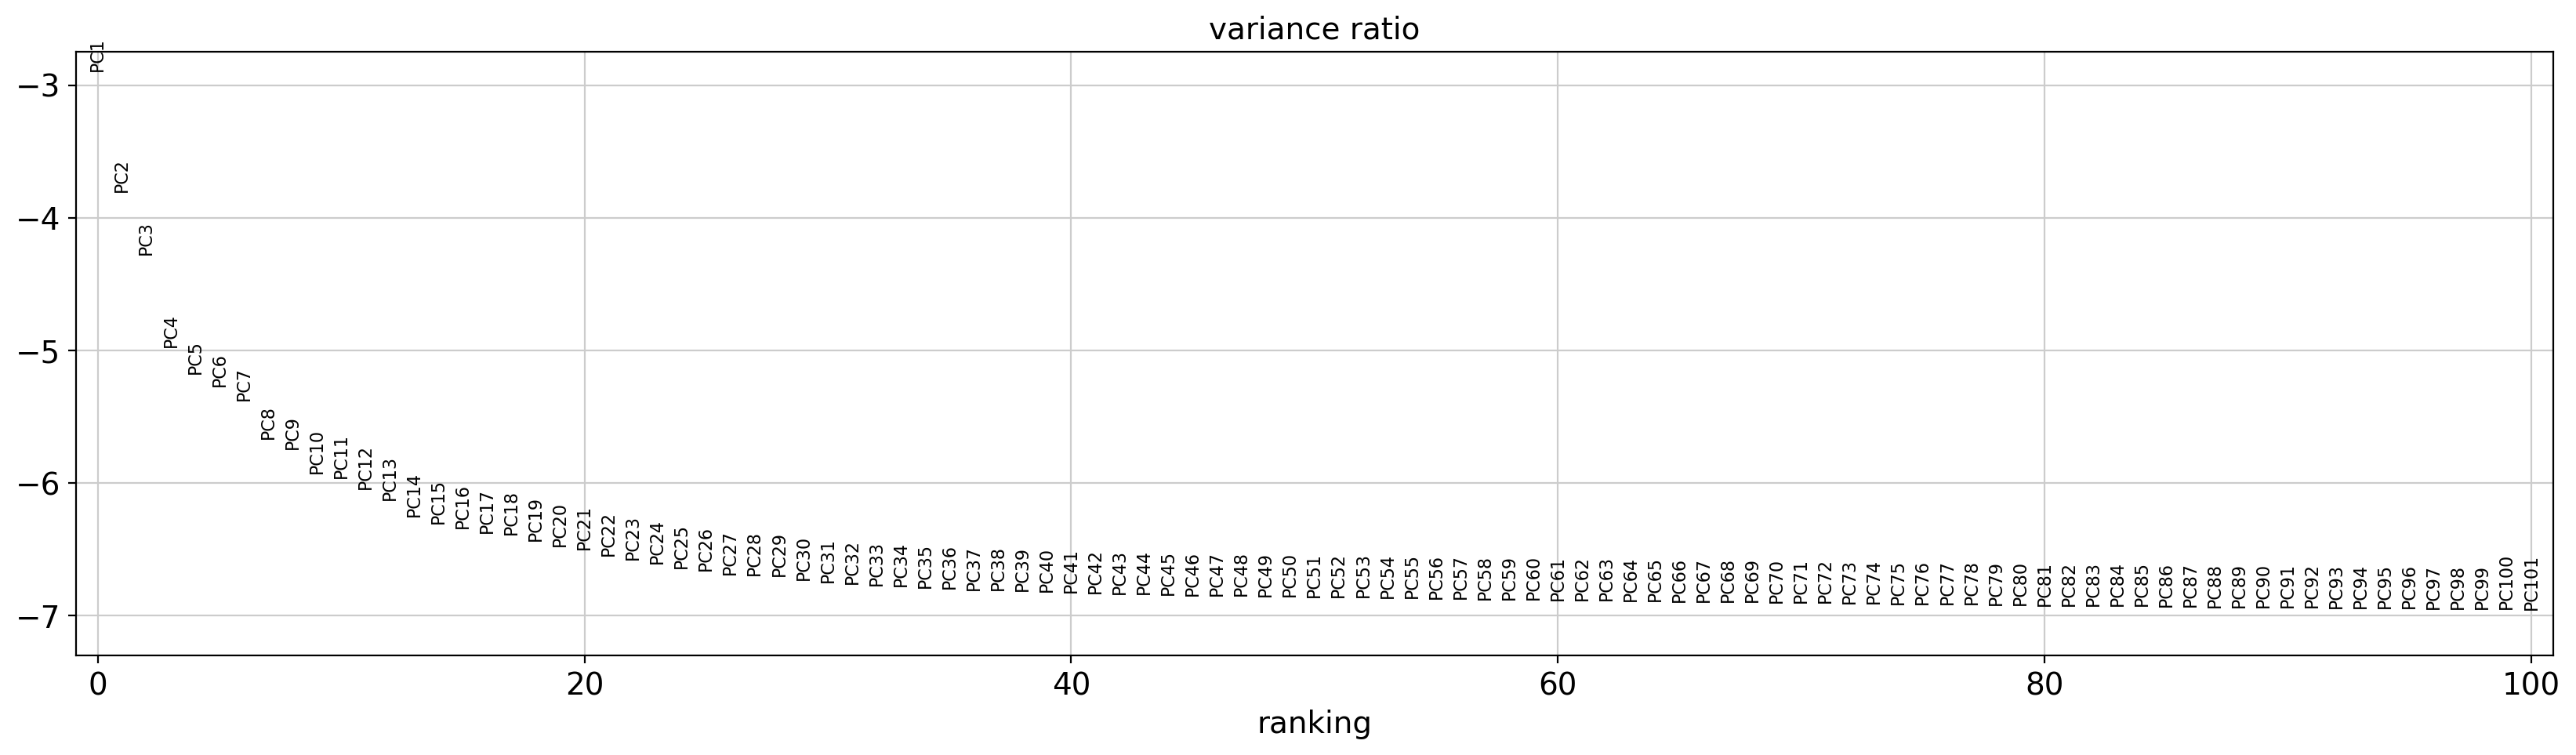


Amount explained variance all PCA L1
0.955507444756222
PCA distribution L2


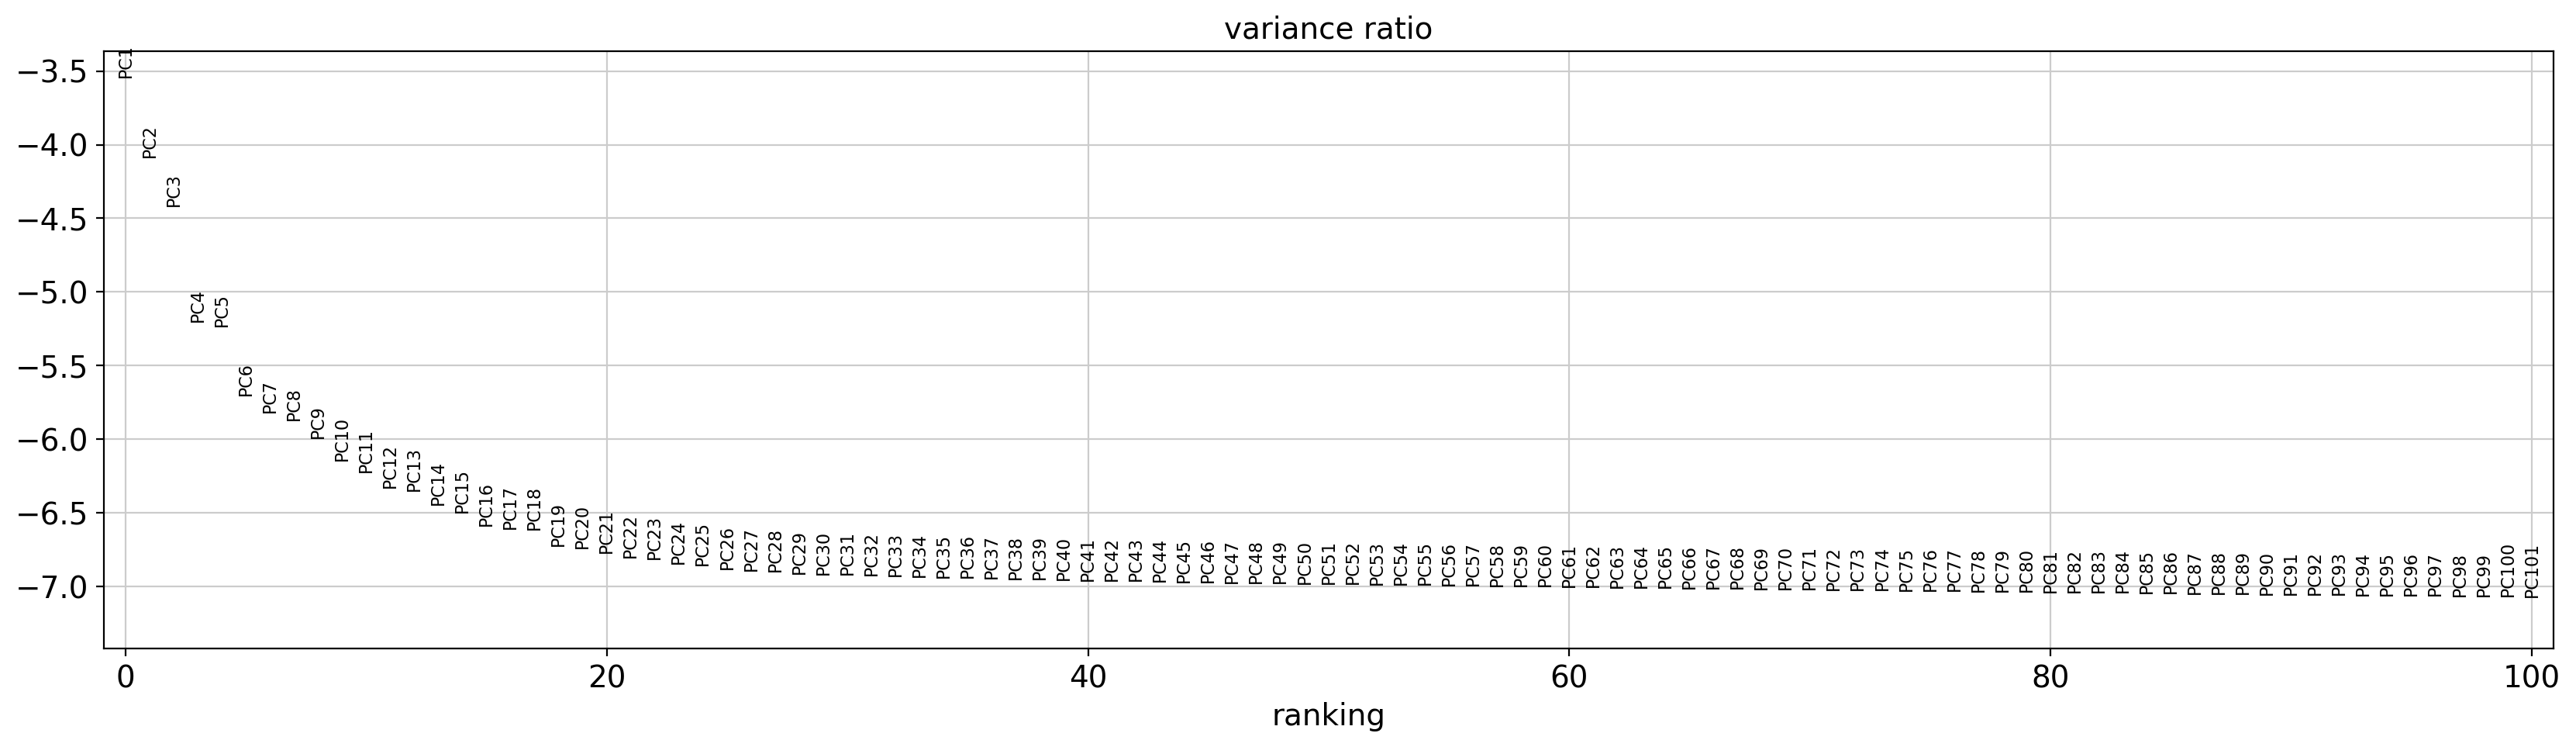


Amount explained variance all PCA L2
0.8444651189493015
PCA distribution L3


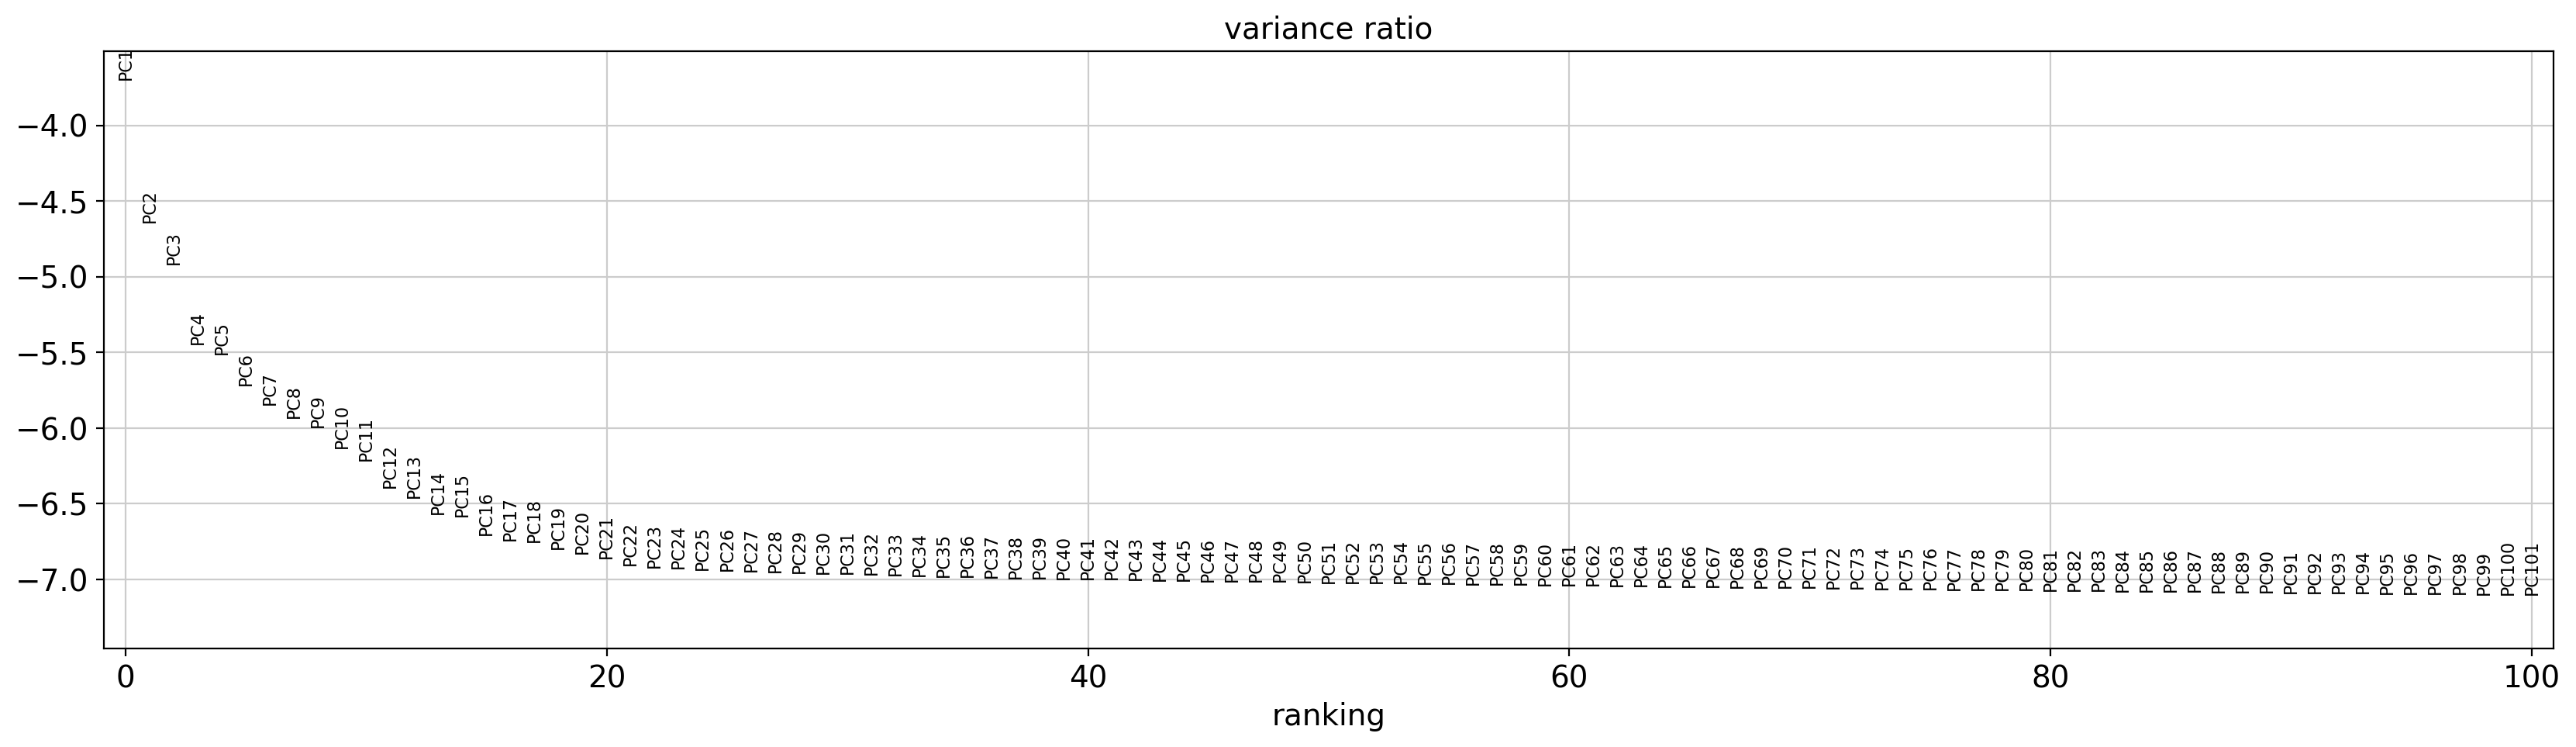


Amount explained variance all PCA L3
0.8057654519798234
PCA distribution L4


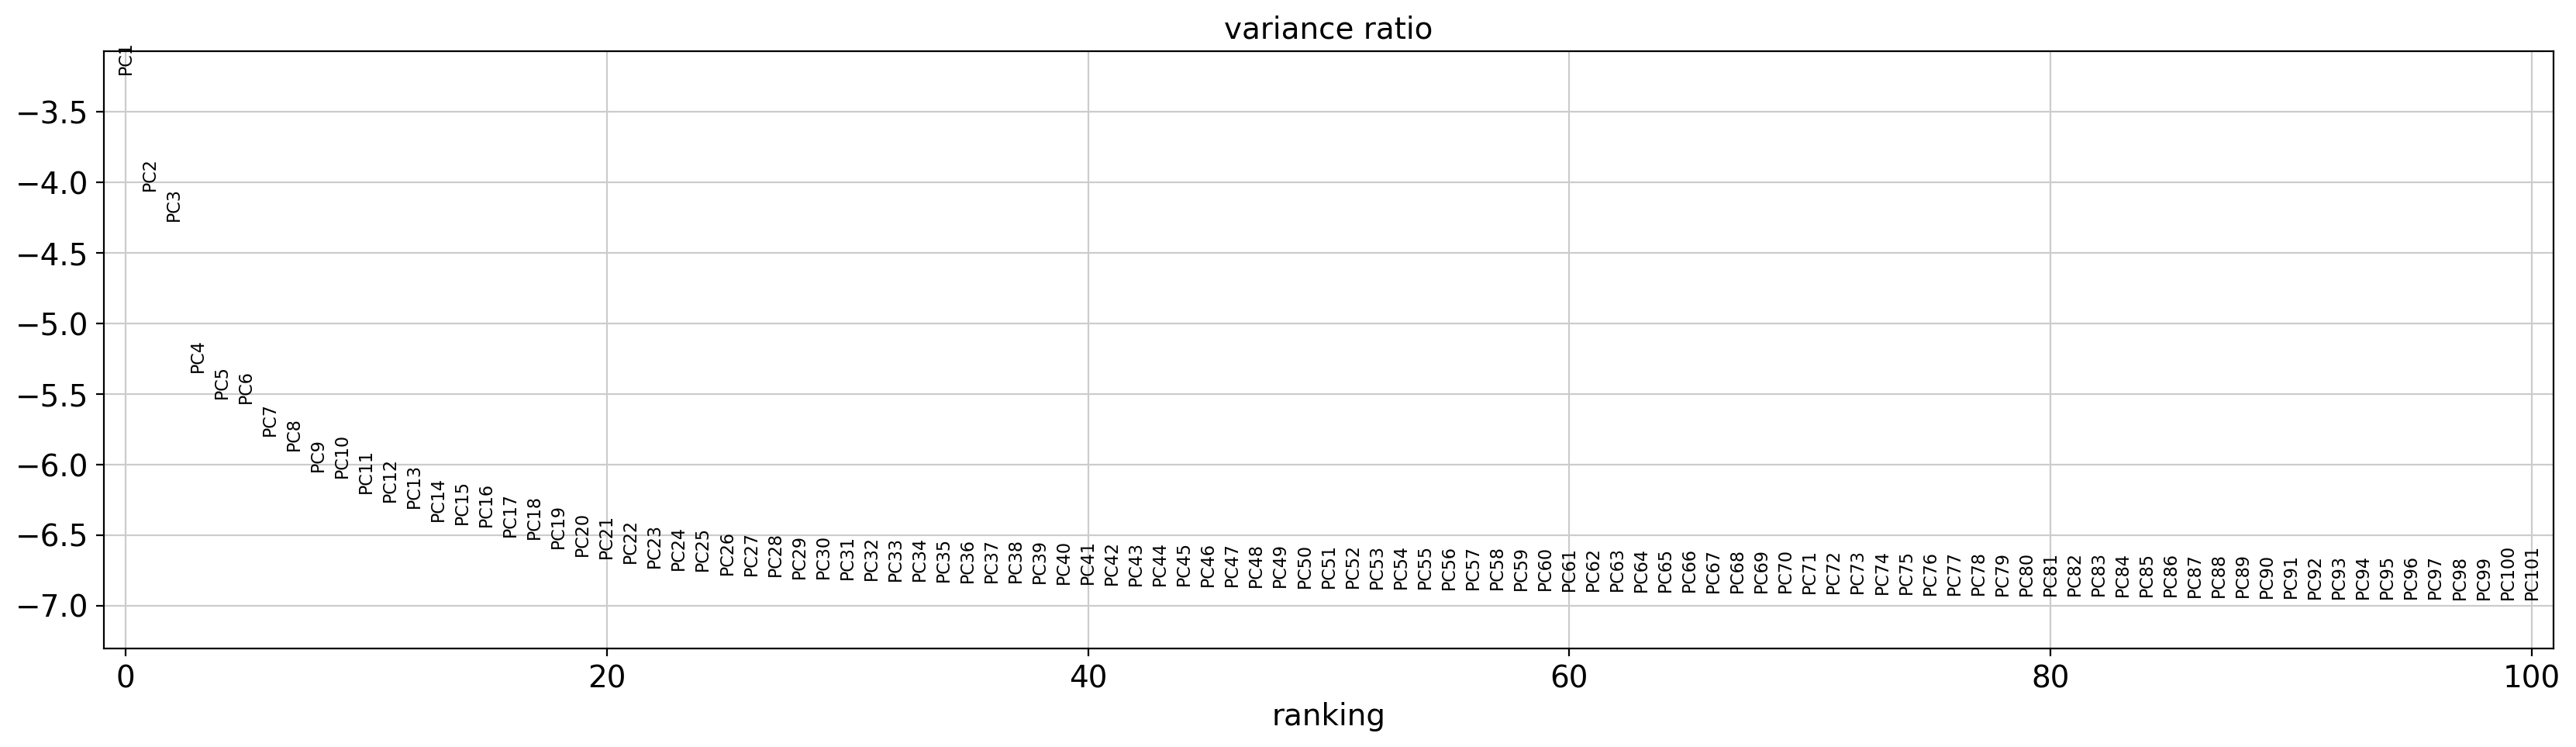


Amount explained variance all PCA L4
0.9245130309136584
PCA distribution L5


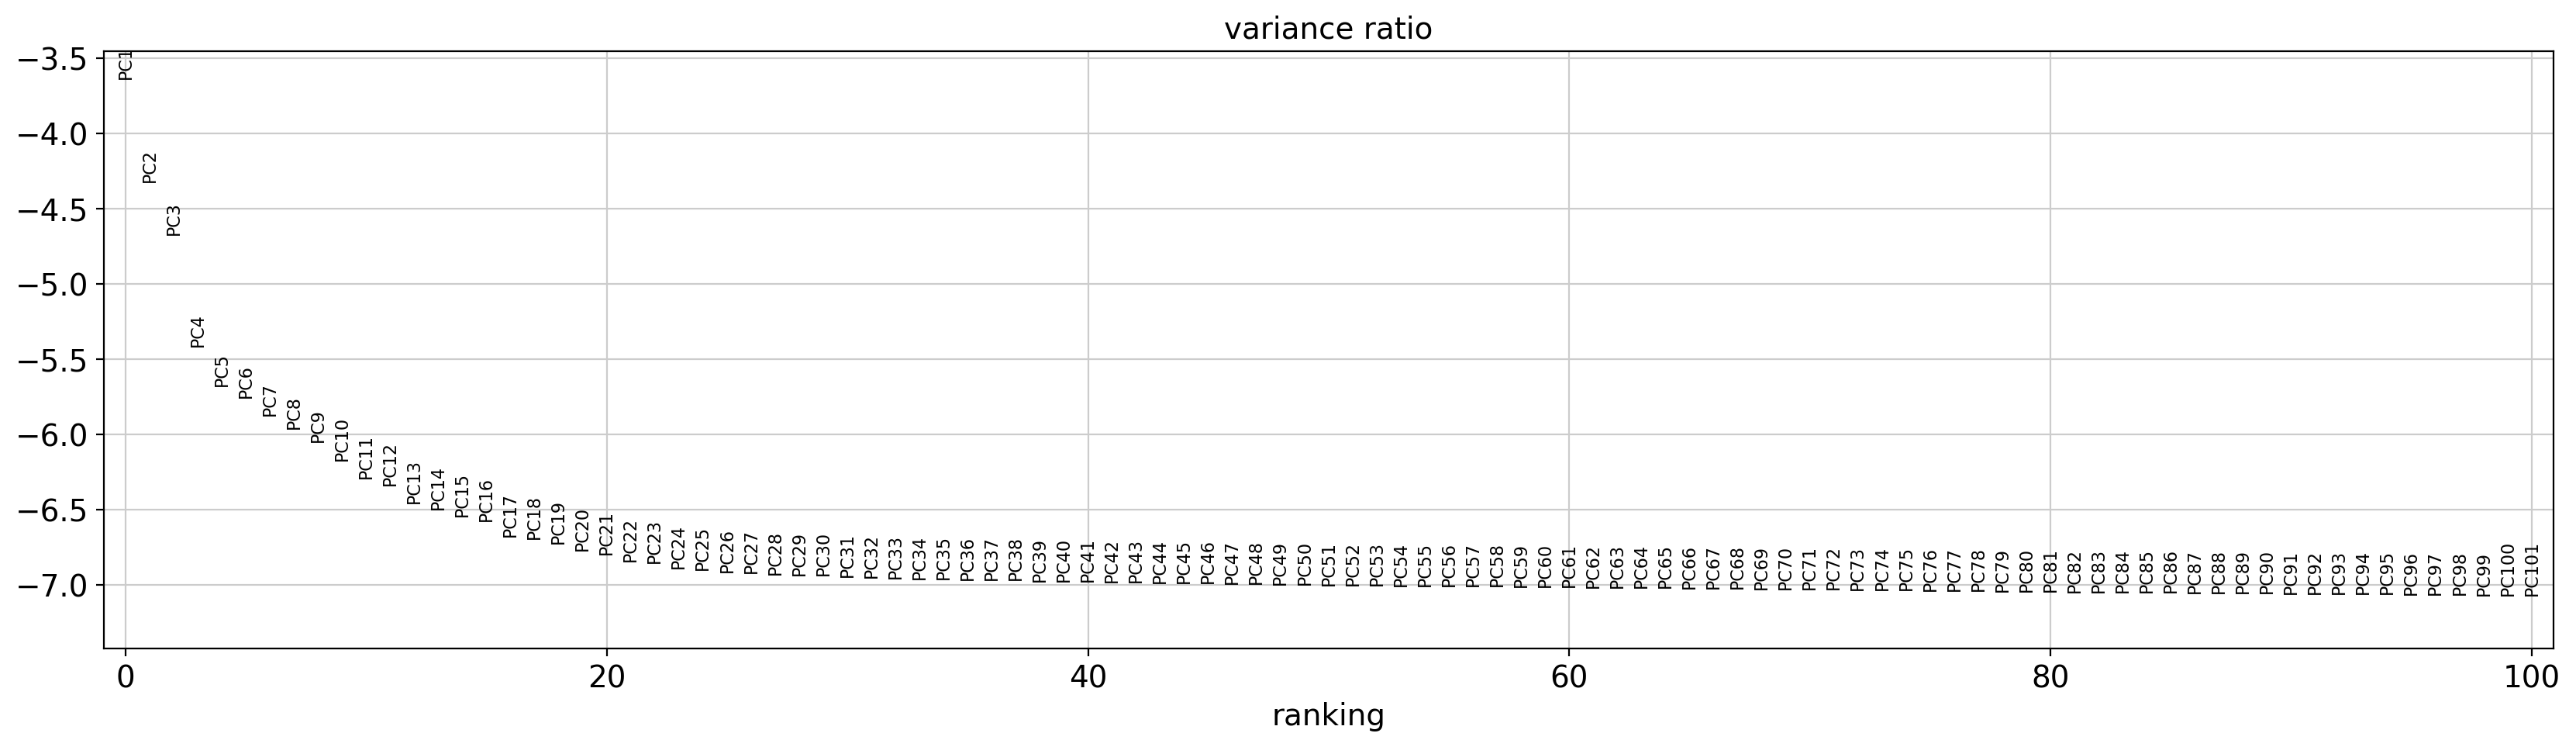


Amount explained variance all PCA L5
0.8655862165614963
PCA distribution L6


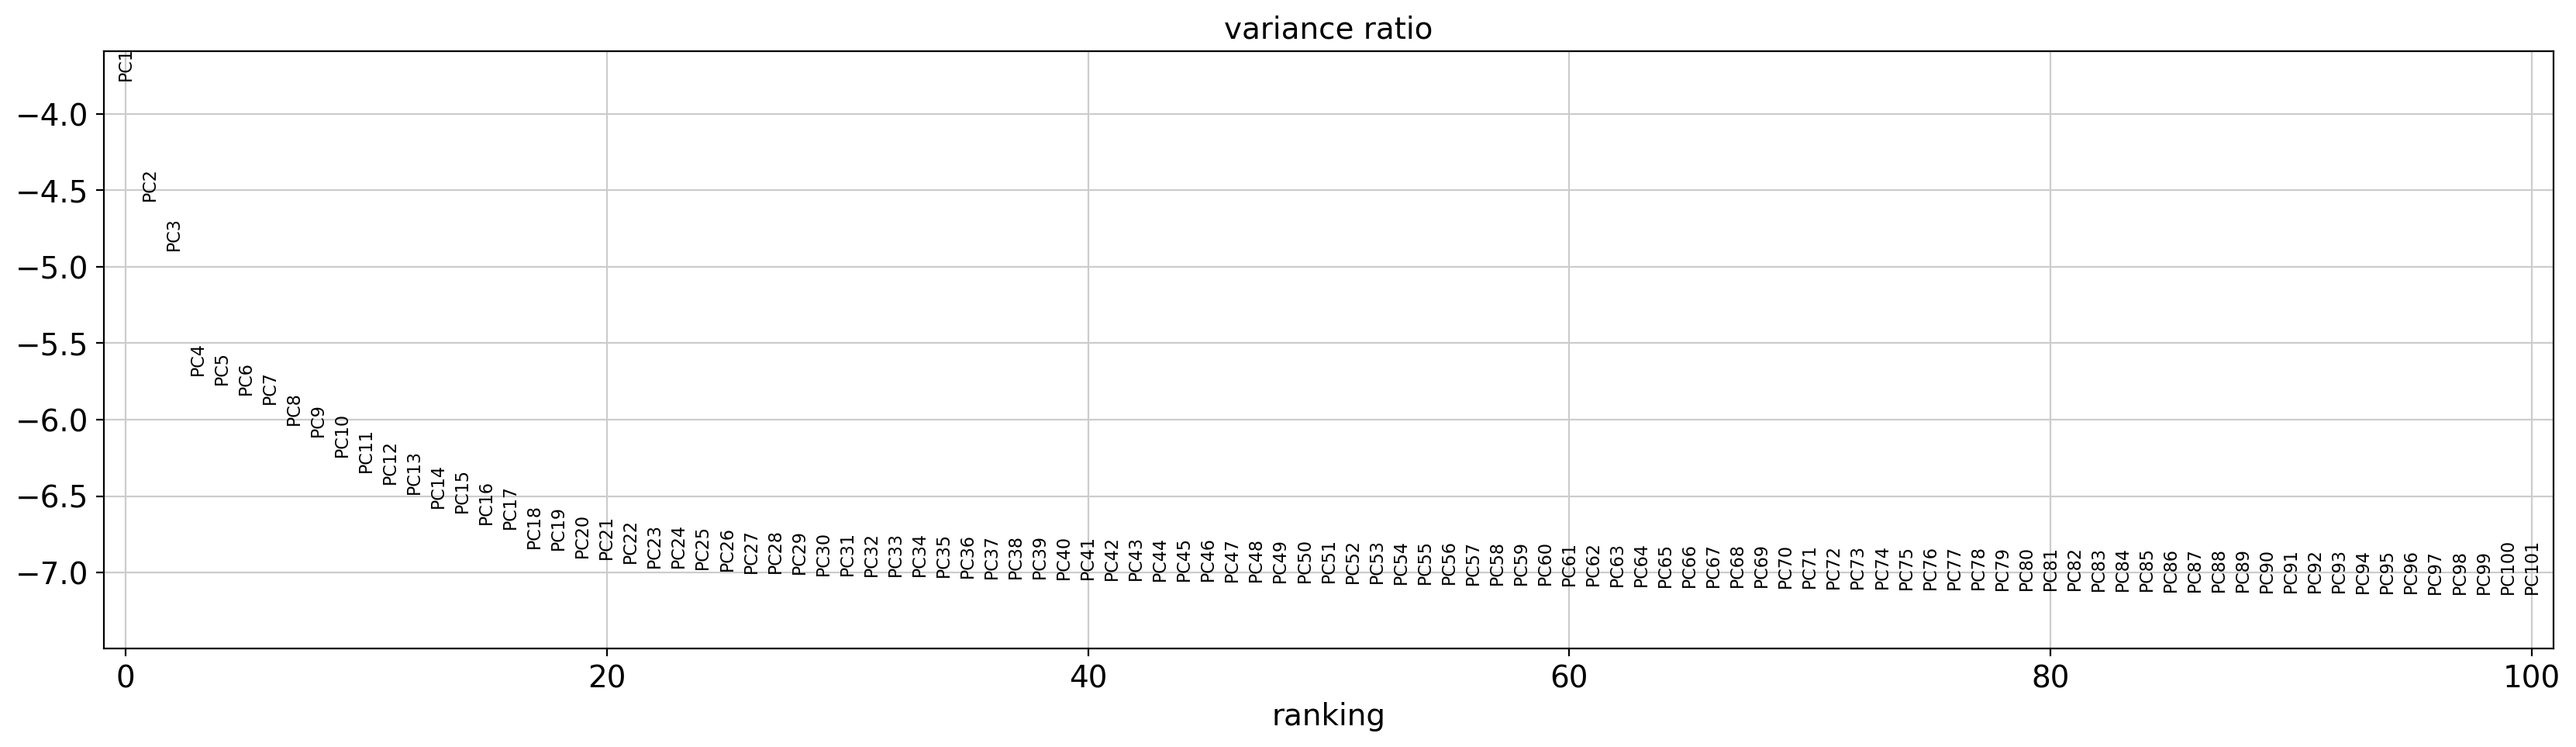


Amount explained variance all PCA L6
0.796111598610878
PCA distribution L7


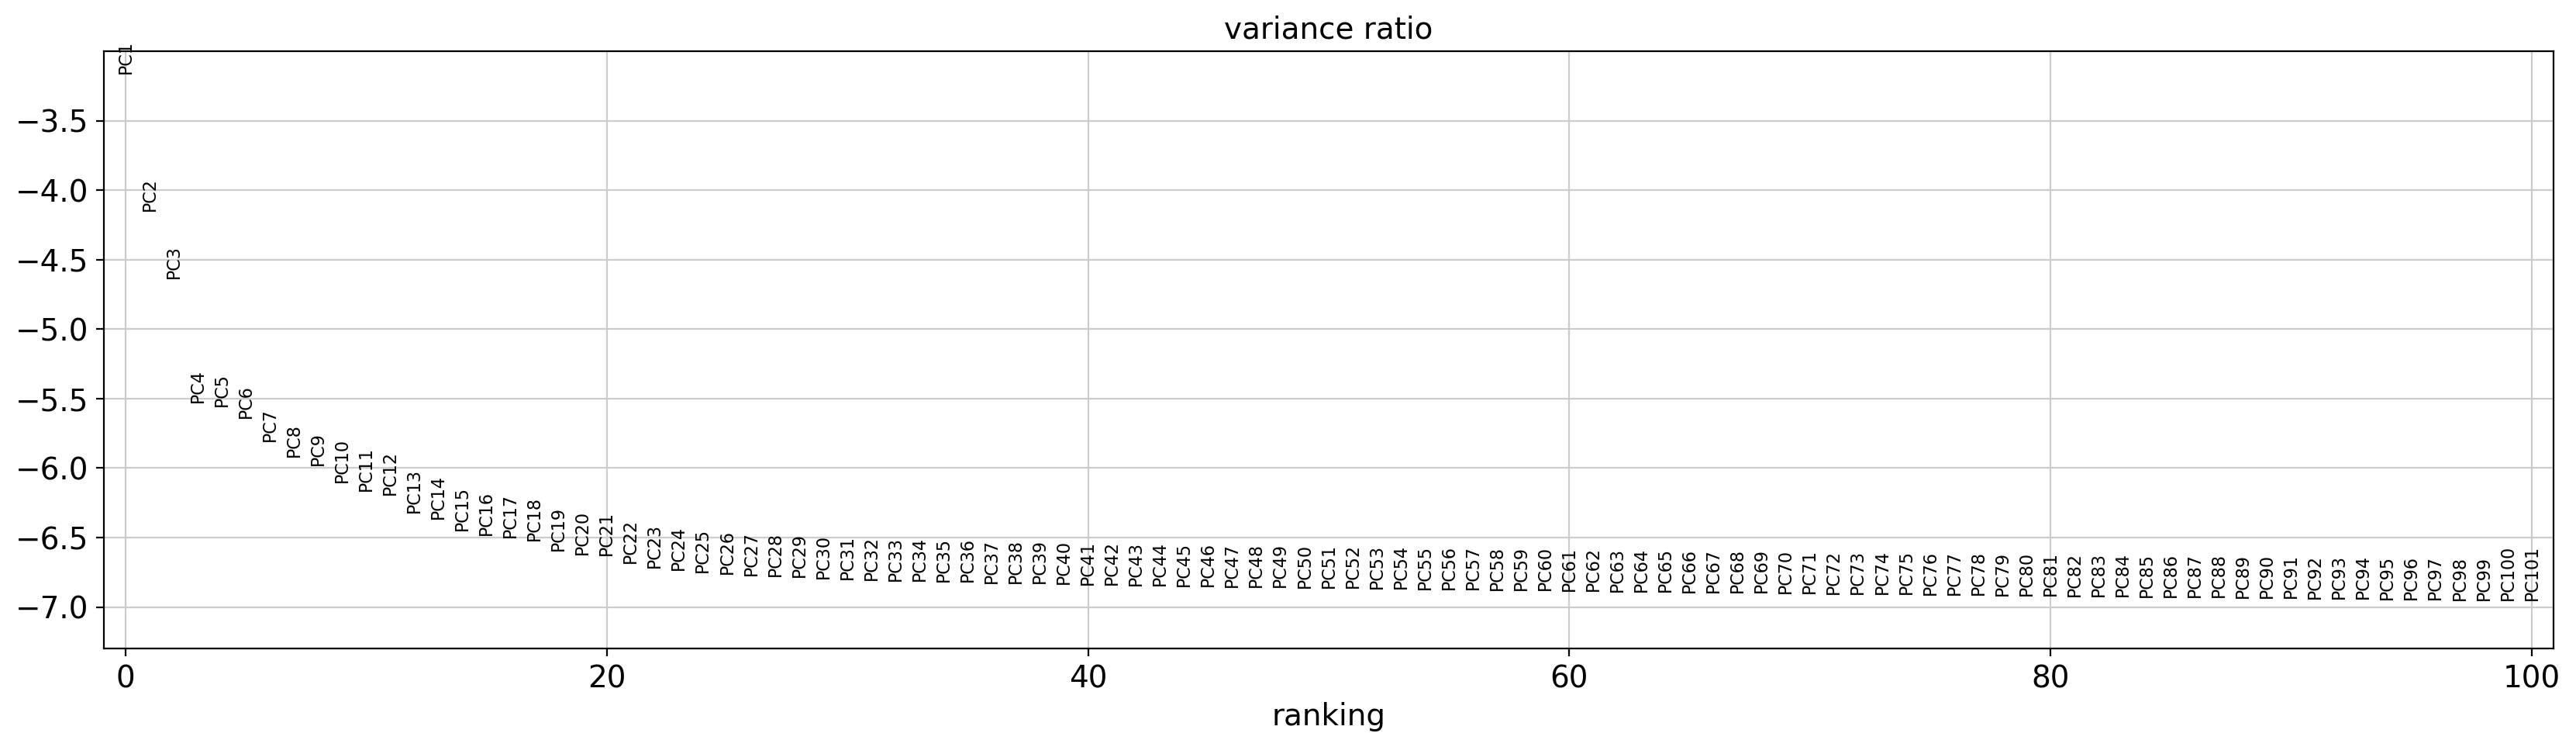


Amount explained variance all PCA L7
0.9077760829386534
PCA distribution L8


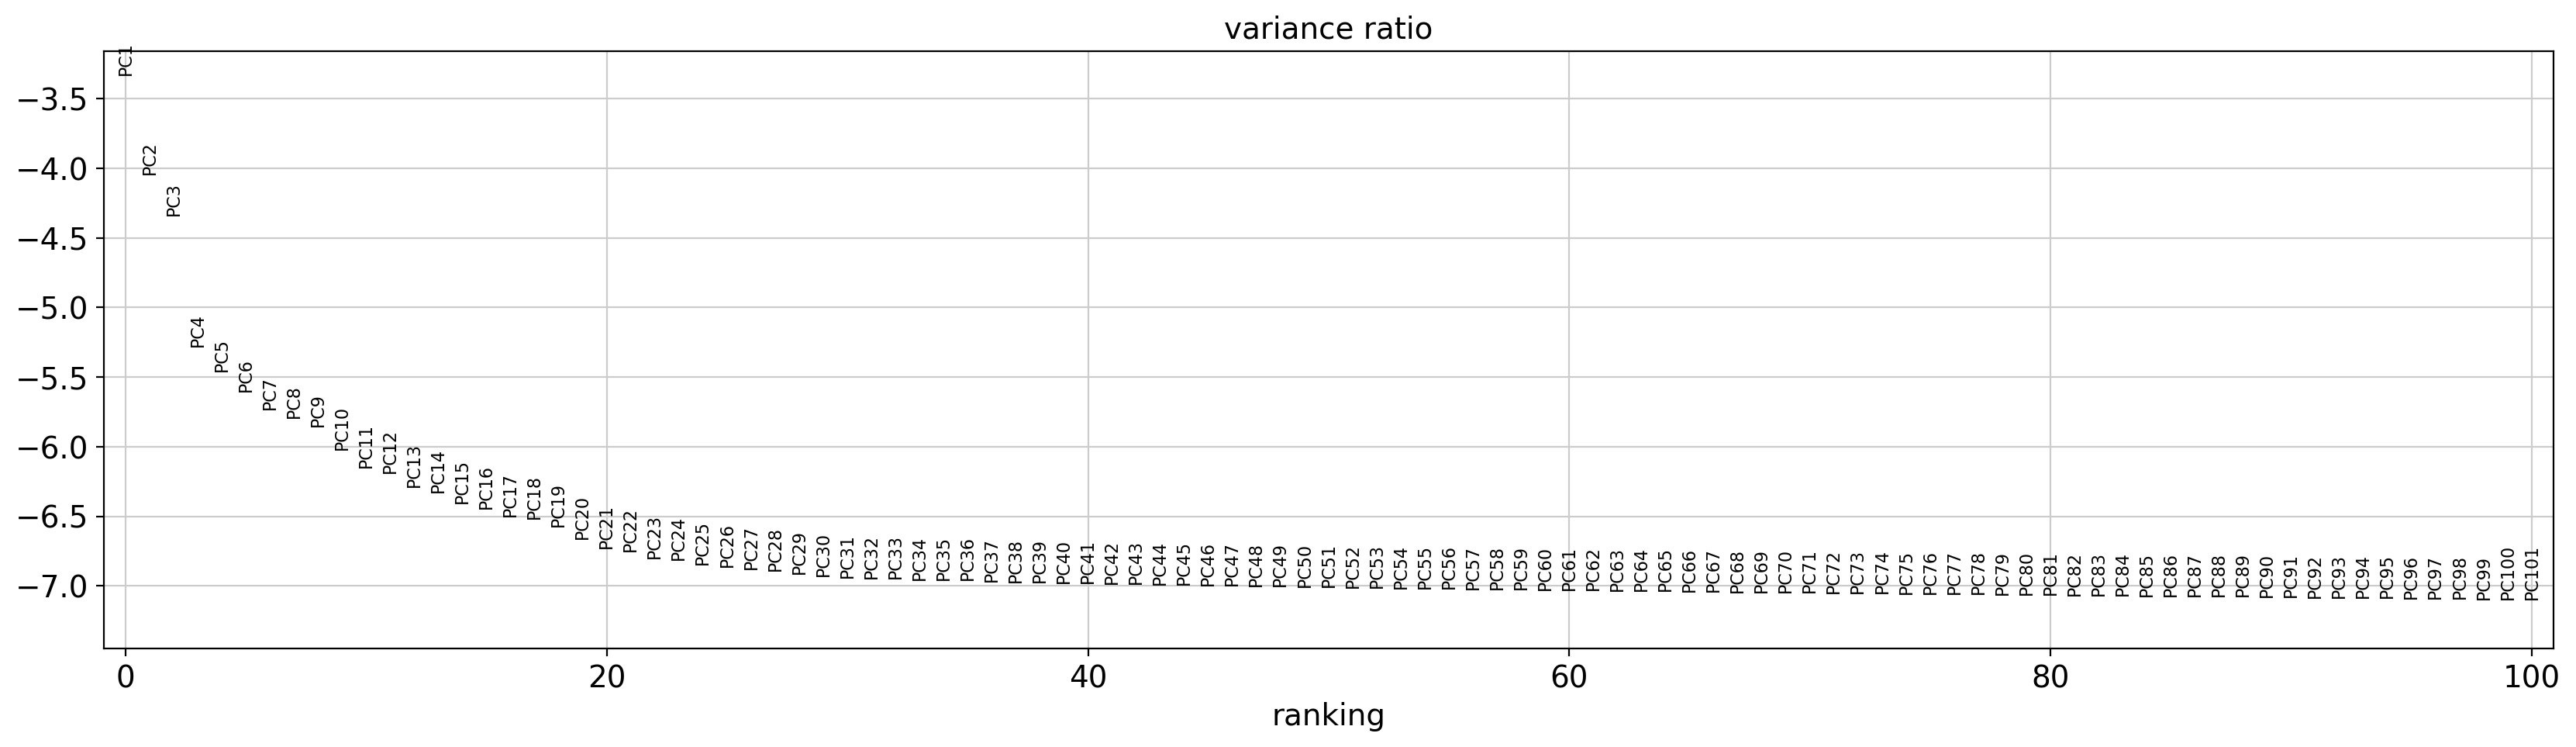


Amount explained variance all PCA L8
0.8382351165637374
PCA distribution L9


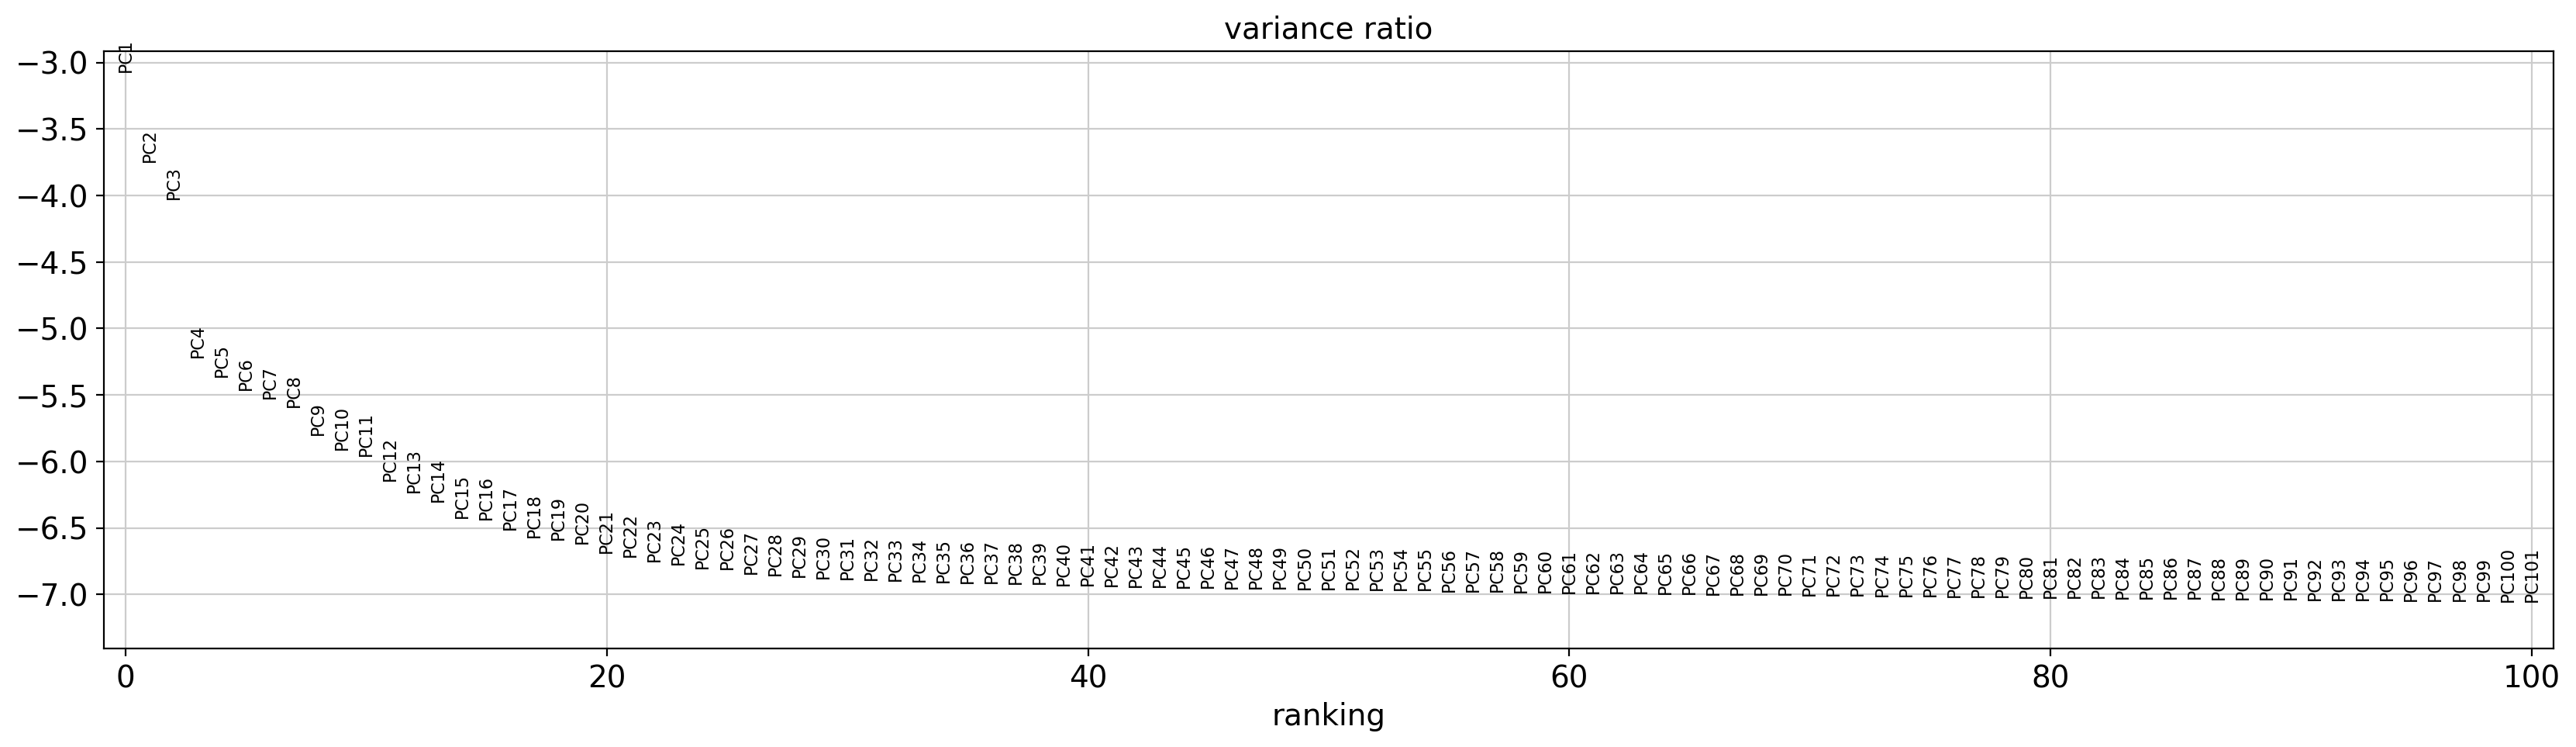


Amount explained variance all PCA L9
0.88549431739375
PCA distribution L10


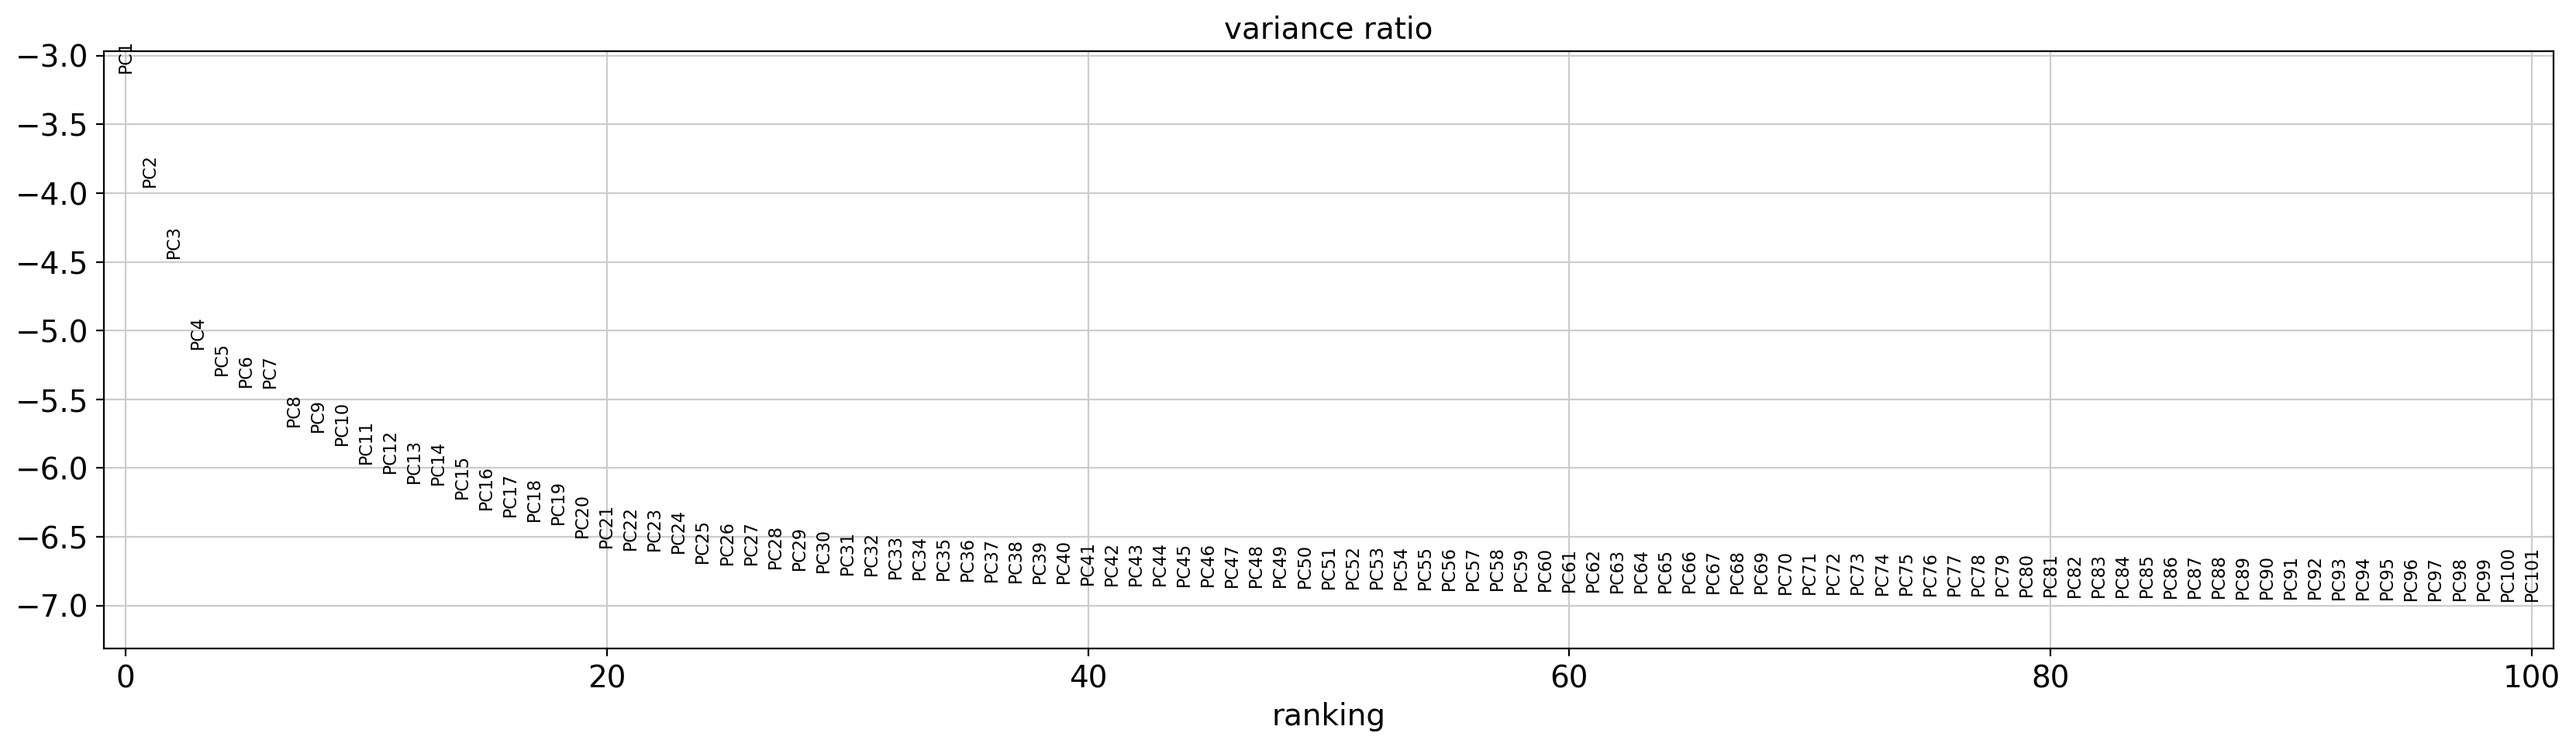


Amount explained variance all PCA L10
0.9188561976188794
PCA distribution L11


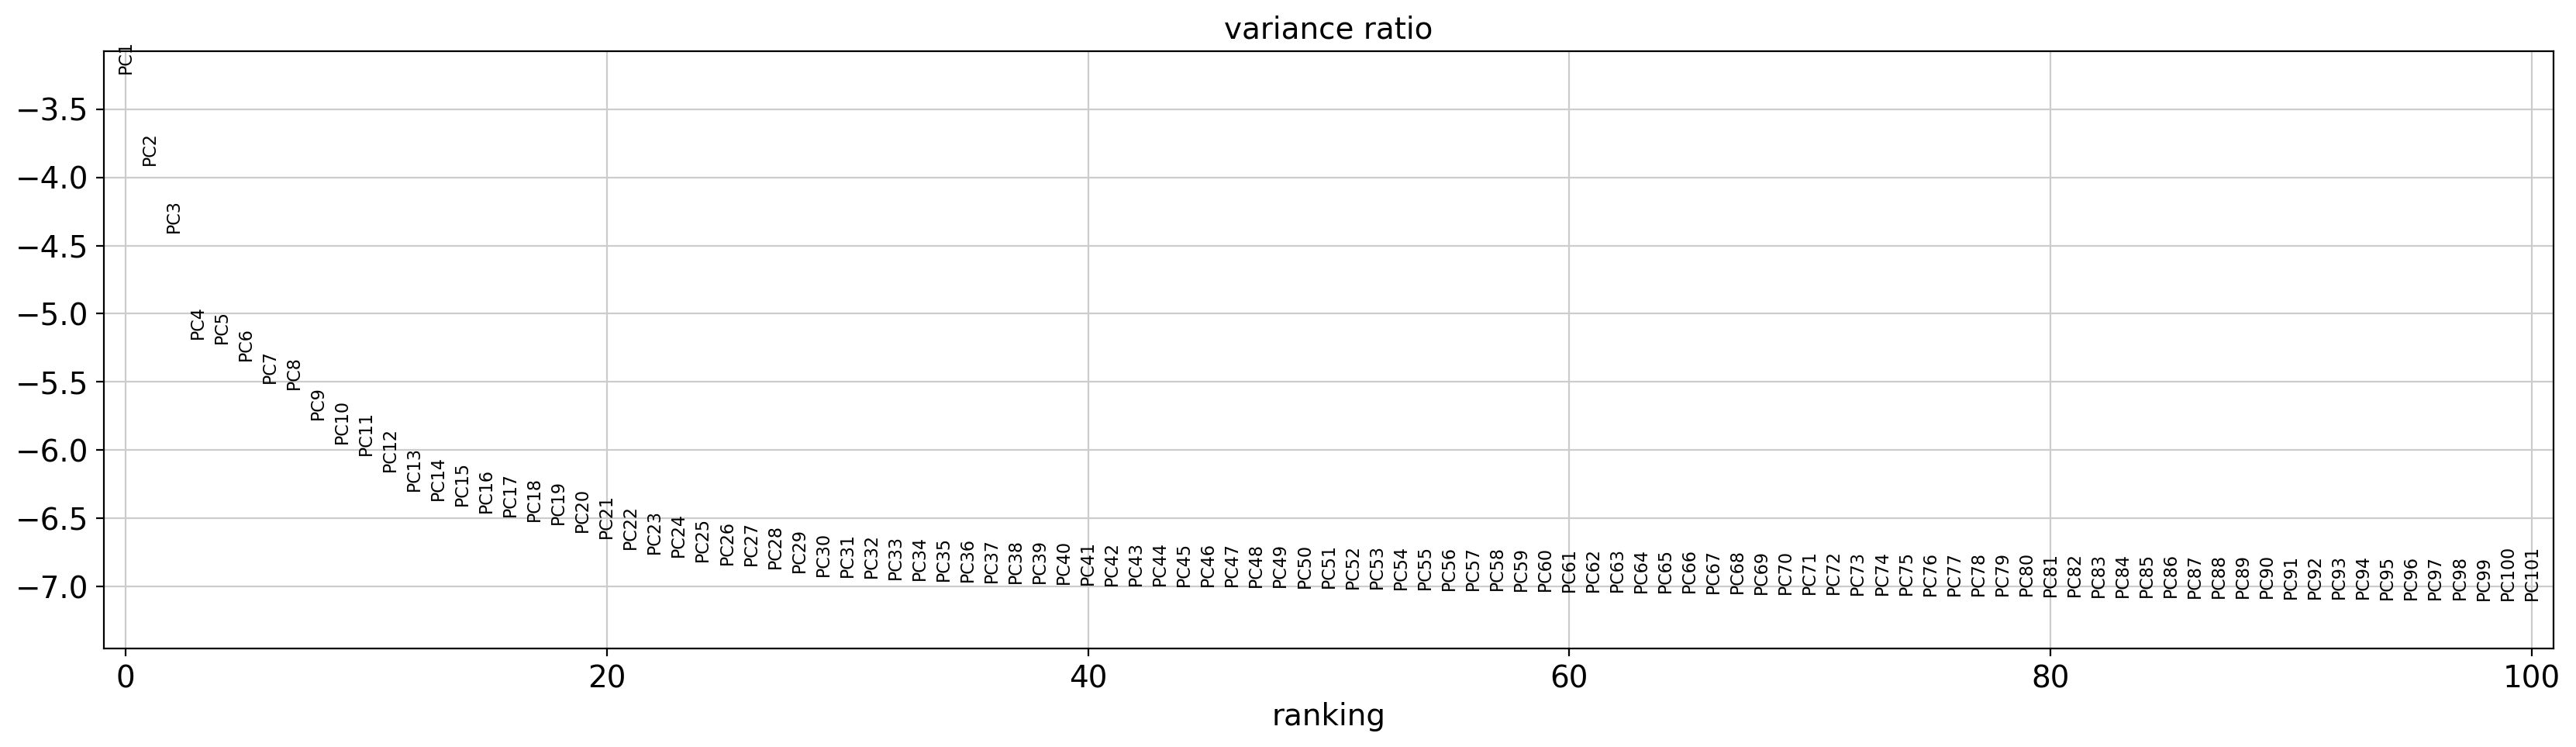


Amount explained variance all PCA L11
0.8538082736777142
PCA distribution L12


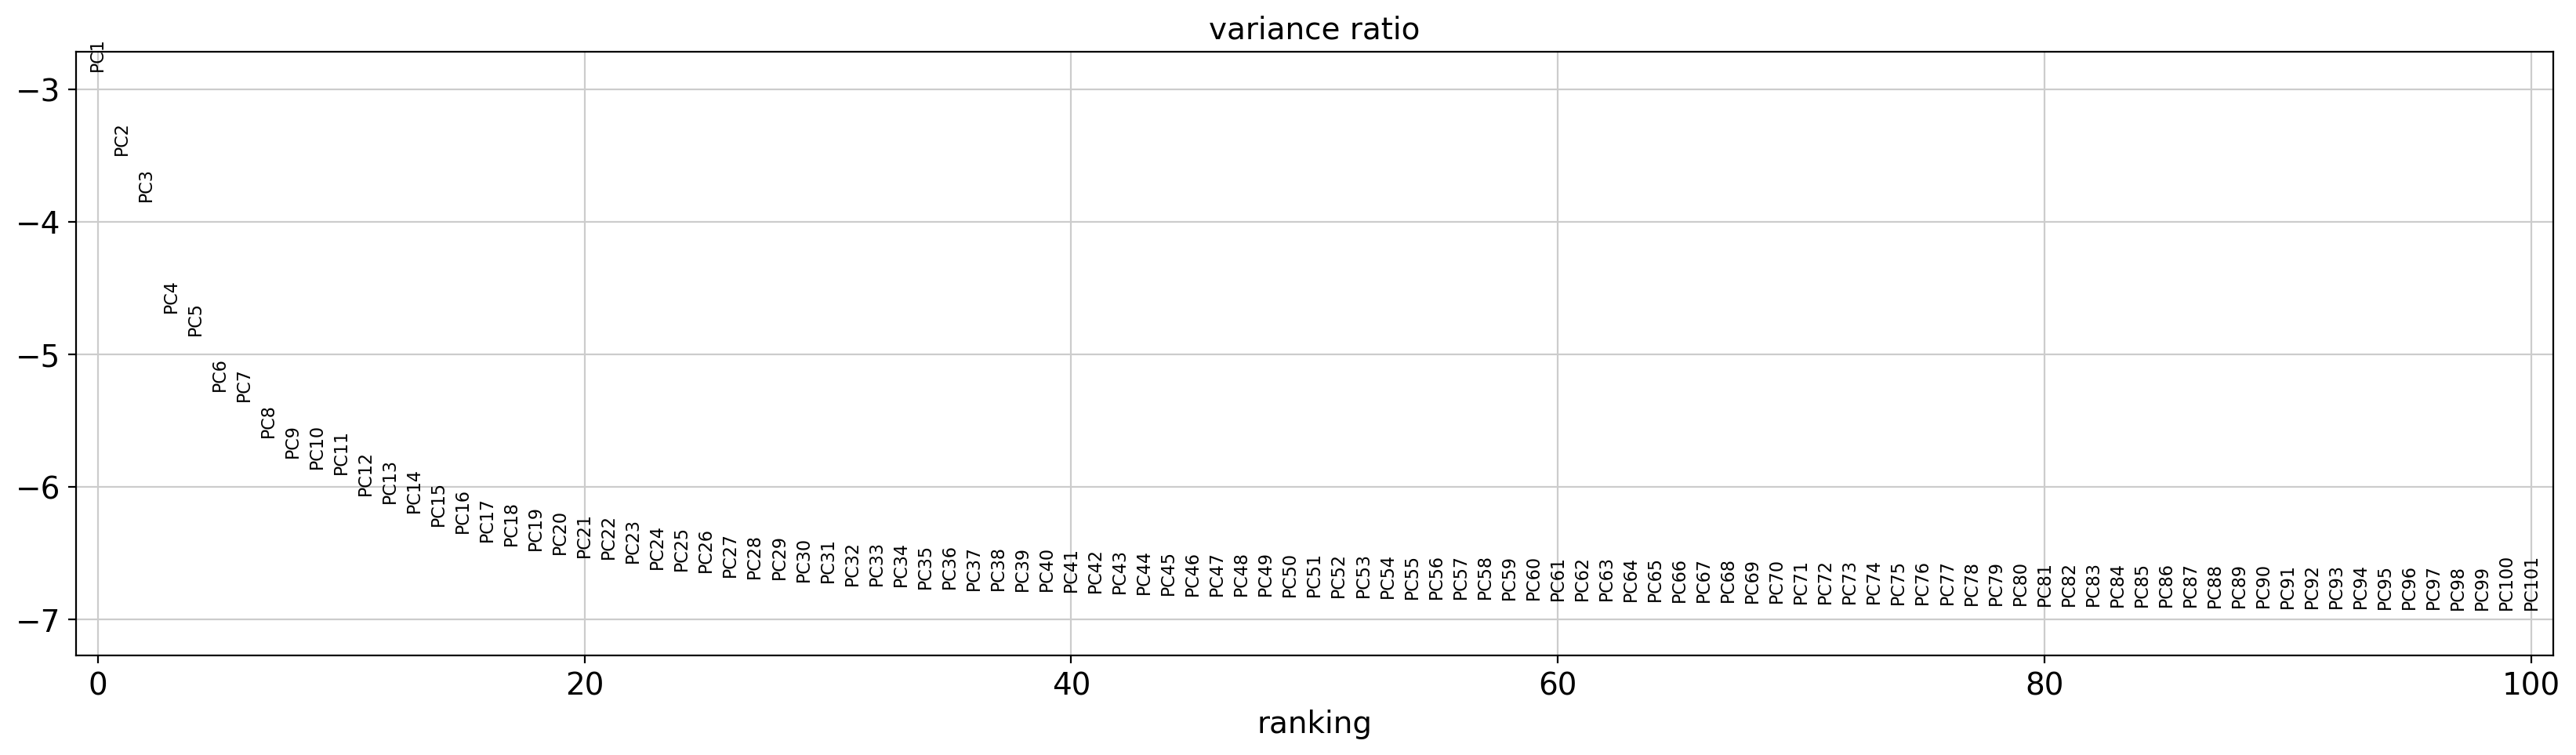


Amount explained variance all PCA L12
0.9628097876266111
PCA distribution L13


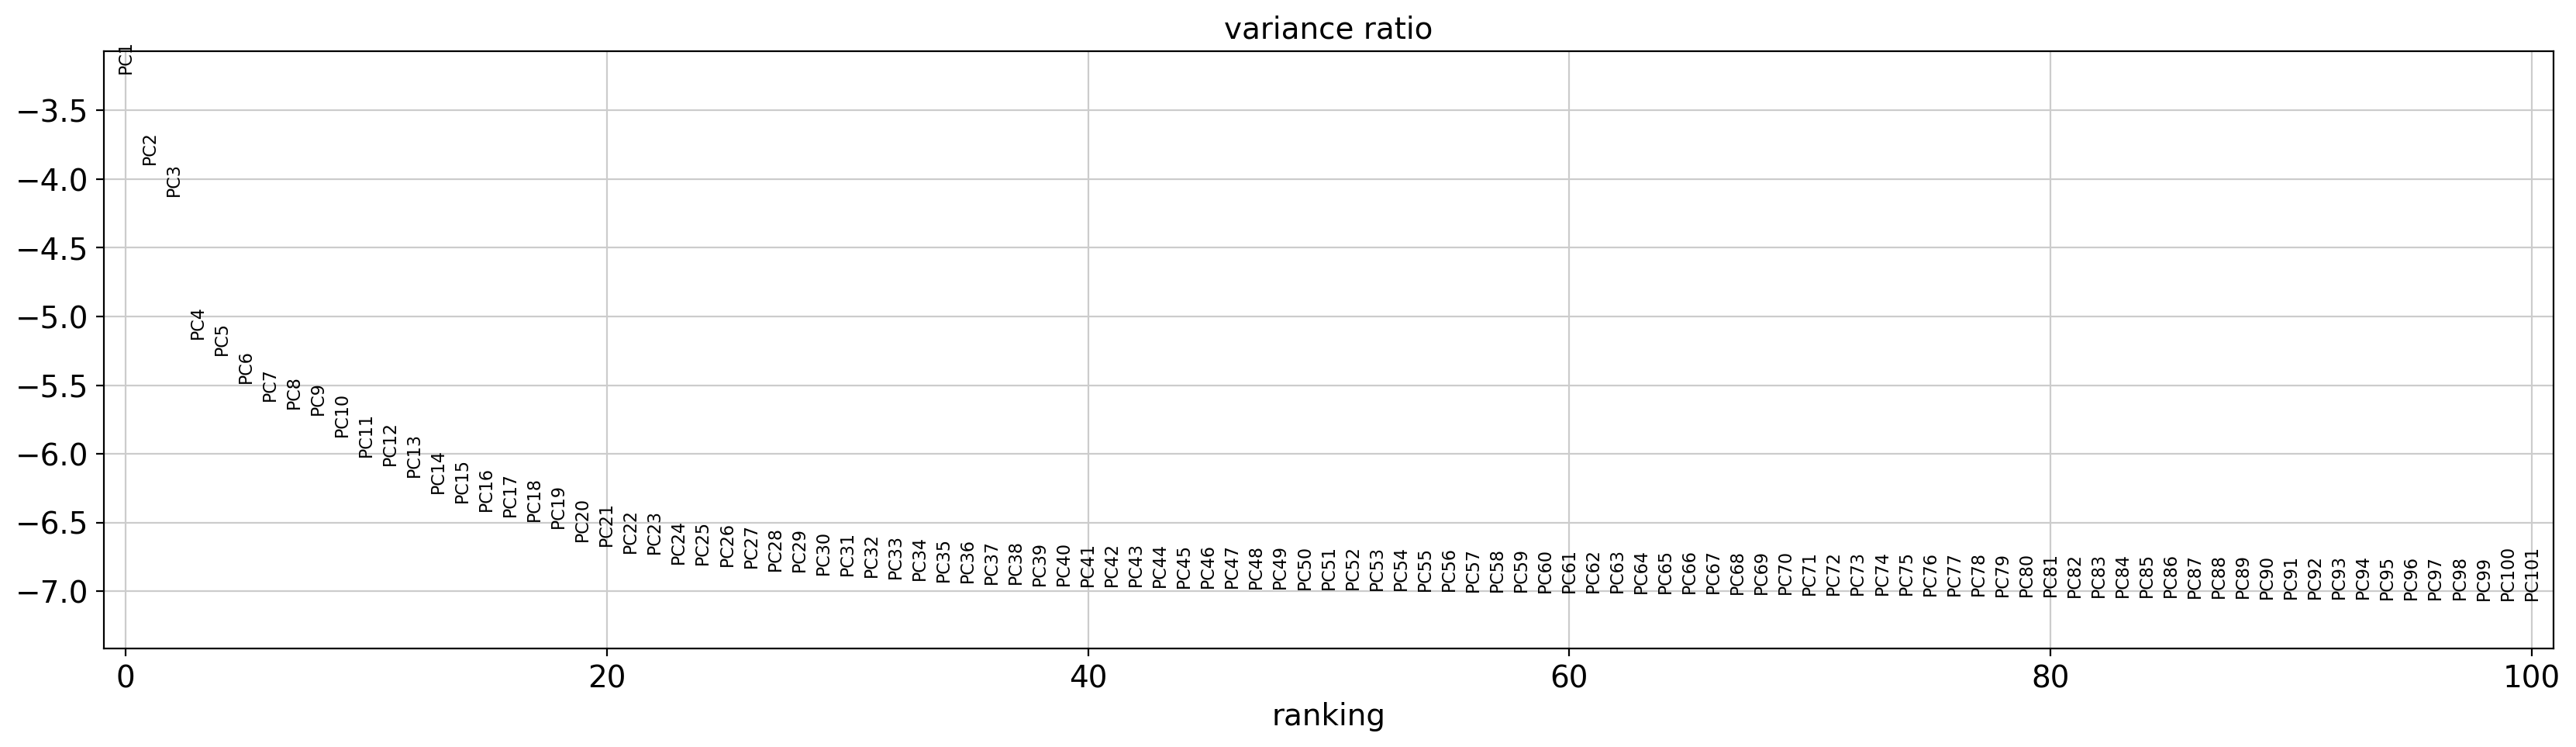


Amount explained variance all PCA L13
0.9075708316813689
PCA distribution L14


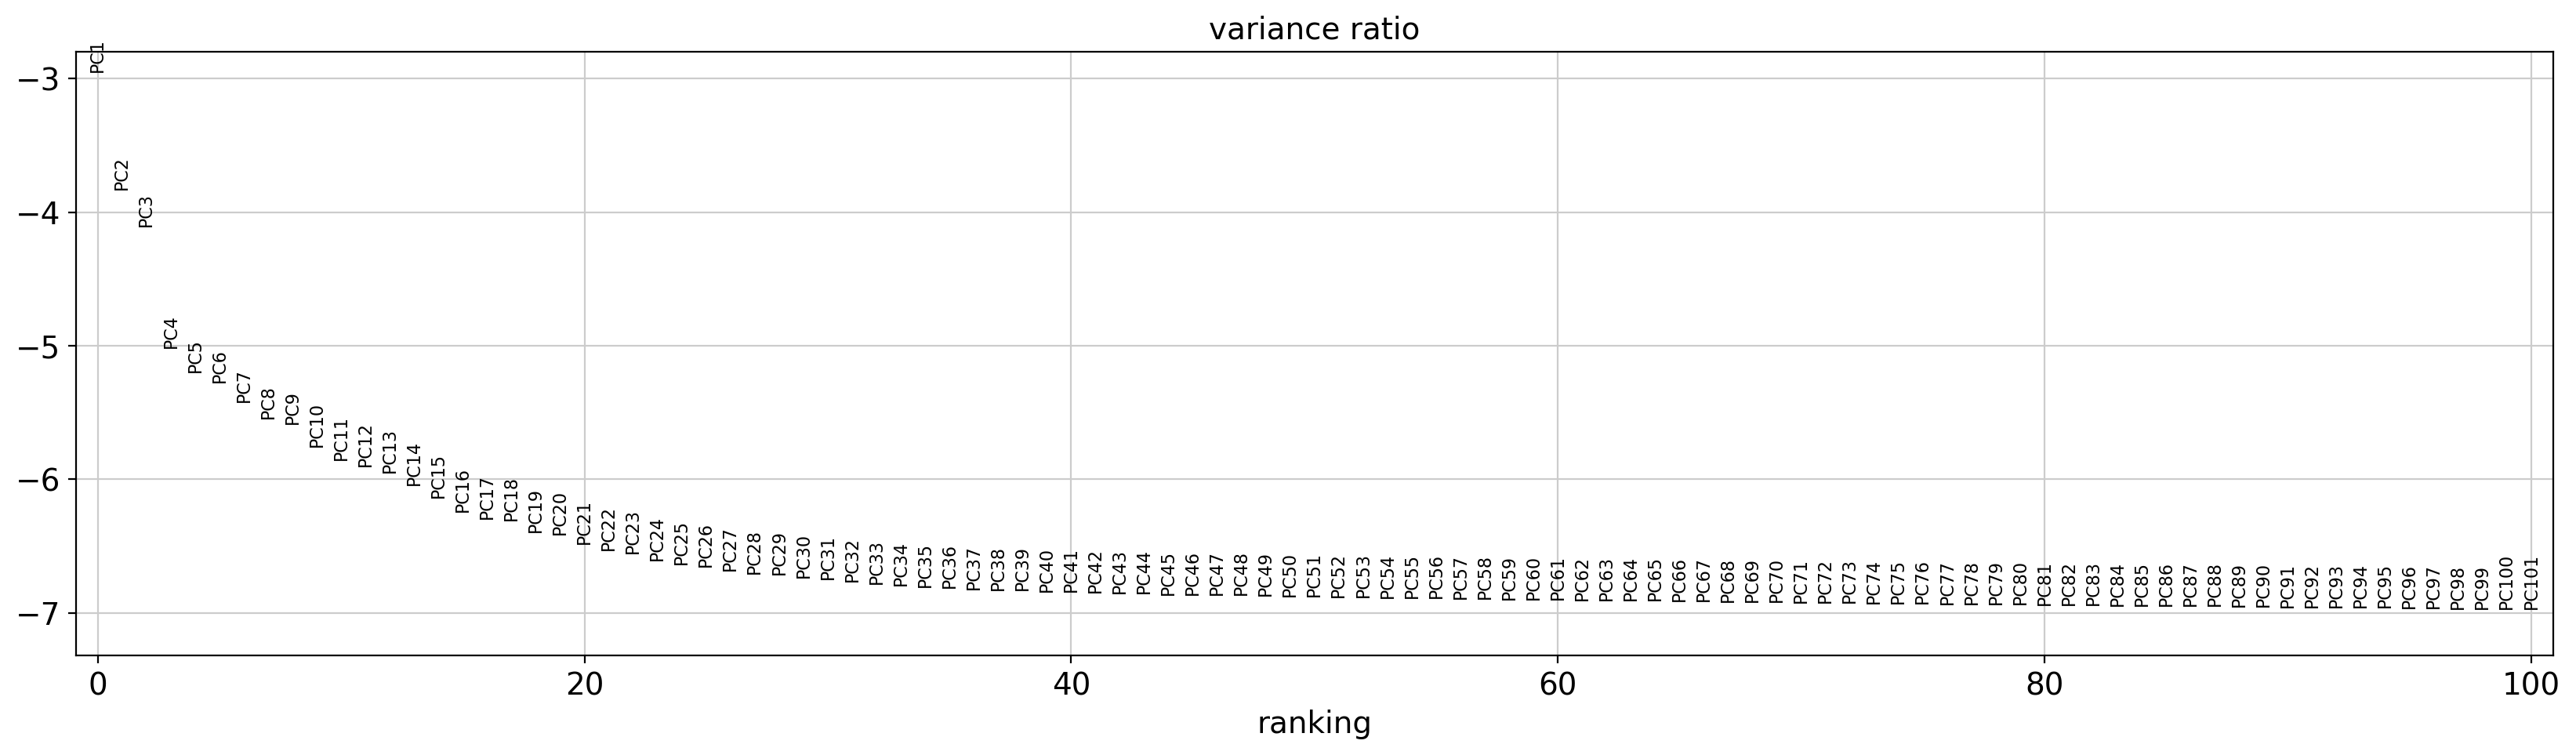


Amount explained variance all PCA L14
0.945817732528667
PCA variance L1
threshold 500: 0.5372205208986998
threshold 100: 0.22742657182971016
threshold 50: 0.17745896766427904
threshold 30: 0.15550689946394414
PCA variance L2
threshold 500: 0.4484368492849171
threshold 100: 0.17141217924654484
threshold 50: 0.12703350809169933
threshold 30: 0.10794620693195611
PCA variance L3
threshold 500: 0.4168199767009355
threshold 100: 0.14825285109691322
threshold 50: 0.10545854776864871
threshold 30: 0.08714226889424026
PCA variance L4
threshold 500: 0.500737237452995
threshold 100: 0.19223467877600342
threshold 50: 0.1427561396267265
threshold 30: 0.12146768055390567
PCA variance L5
threshold 500: 0.44023807742632926
threshold 100: 0.15685569570632651
threshold 50: 0.11295985896140337
threshold 30: 0.09432058228412643
PCA variance L6
threshold 500: 0.4025274941814132
threshold 100: 0.14031823363620788
threshold 50: 0.09932844270952046
threshold 30: 0.08186332054901868
PCA variance L7
threshold 

In [65]:
anndata_result = MS1_Clustering.pca_and_plot( 'Lib_Singlet_RB_MT' , anndata_dict_singlet, anndata_dict_singlet_rb_mt, n_comps_var = 1500, random_state_var = random_state_var)

### Neighborhood + clustering

In [66]:
### Test using function for first variant

anndata_result = MS1_Clustering.neighbors_and_cluster( 'A7_Singlet_RB_MT_PCA_50_10_neighbors' , anndata_result[0], anndata_result[1], use_rep_var = 'X_pca' , random_state_var = random_state_var, n_neighbors_var =10, n_pcs_var = 50)


Calculated neighborhood graph
Clustered cells
L1A7_Singlet_RB_MT_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L2A7_Singlet_RB_MT_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L3A7_Singlet_RB_MT_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L4A7_Singlet_RB_MT_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L5A7_Singlet_RB_MT_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L6A7_Singlet_RB_MT_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L7A7_Singlet_RB_MT_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L8A7_Singlet_RB_MT_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L9A7_Singlet_RB_MT_PCA_50_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L10A7_Singlet_RB_MT_PCA_50_10_neighb

In [67]:
anndata_result = MS1_Clustering.neighbors_and_cluster( 'A7_Singlet_RB_MT_PCA_100_10_neighbors' , anndata_result[0], anndata_result[1], use_rep_var = 'X_pca' , random_state_var = random_state_var, n_neighbors_var =10, n_pcs_var = 100)

Calculated neighborhood graph
Clustered cells
L1A7_Singlet_RB_MT_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L2A7_Singlet_RB_MT_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L3A7_Singlet_RB_MT_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L4A7_Singlet_RB_MT_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L5A7_Singlet_RB_MT_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L6A7_Singlet_RB_MT_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L7A7_Singlet_RB_MT_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L8A7_Singlet_RB_MT_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L9A7_Singlet_RB_MT_PCA_100_10_neighbors variant finished
Calculated neighborhood graph
Clustered cells
L10A7_Singlet_RB_MT_PCA_100

In [68]:
anndata_result[0]

{'L1': AnnData object with n_obs × n_vars = 12113 × 1761
     obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet', 'A7_Singlet_PCA_50_10_neighbors_cluster', 'A7_Singlet_PCA_100_10_neighbors_cluster', 'A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster', 'A7_Singlet_RB_MT_PCA_100_10_neighbor

In [69]:
anndata_dict_singlet = anndata_result[0]

In [70]:
anndata_dict_singlet

{'L1': AnnData object with n_obs × n_vars = 12113 × 1761
     obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet', 'A7_Singlet_PCA_50_10_neighbors_cluster', 'A7_Singlet_PCA_100_10_neighbors_cluster', 'A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster', 'A7_Singlet_RB_MT_PCA_100_10_neighbor

# Save the generated informations to anndata_dict object

## Combine both datasets

In [71]:
for key in anndata_dict:
    print(key)
    anndata_dict[key].obs = pd.merge(anndata_dict[key].obs ,anndata_dict_singlet[key].obs[['A7_Singlet_PCA_50_10_neighbors_cluster', 'A7_Singlet_PCA_100_10_neighbors_cluster', 'A7_Singlet_RB_MT_PCA_50_10_neighbors_cluster', 'A7_Singlet_RB_MT_PCA_100_10_neighbors_cluster']], how='left', left_index = True, right_index = True)

L1
L2
L3
L4
L5
L6
L7
L8
L9
L10
L11
L12
L13
L14


In [72]:
anndata_dict['L1']

AnnData object with n_obs × n_vars = 18549 × 21407
    obs: 'nCount_HTO', 'nFeature_HTO', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'HTO_classification_final', 'name', 'library', 'id', 'read', 'pattern', 'sequence', 'feature_type', 'Unnamed: 7', 'in_sample', 'display_name', 'group', 'HTO_Doublet_Classification', 'doublet_score', 'predicted_doublet', 'A5_scrublet_predicted_doublet_lib0.1', 'A5_scrublet_doublet_score_lib_0.1', 'A5_scrublet_predicted_doublet_lib0.2', 'A5_scrublet_doublet_score_lib_0.2', 'A5_scrublet_predicted_doublet_lib', 'A5_scrublet_doublet_score_lib', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'valid_cell_filter_dying', 'valid_cell_filter_doublet', 'A7_PCA_50_10_neighbors_cluster', 'A7_PCA_100_10_neighbors_cluster', 'A7_PCA_100_50_neighbors_cluster', 'A7_PCA_500_50_neighbors_cluster', 'A7_Singlet_PCA_50_10_neighbors_cluste

## Save data

In [73]:
for key in anndata_dict:
    ##### Complete data
    
    data_name = data_path + '/analysis/A/' +  'A7_Processed_' + key + '_rna_Final.h5ad'
    
    print(key)
    print(data_name)
    print('Last modified' + date.today().strftime("%m/%d/%Y, %H:%M:%S"))
    
    anndata_dict[key].uns['data_save_time'] = date.today().strftime("%m/%d/%Y, %H:%M:%S") # save the last modified timestamp of the data saved
    anndata_dict[key].uns['data_save_name'] = data_name # save the data path of the data loaded 
    
    
    working_directory = os.getcwd()
    repo.index.add([working_directory + '/' + file_name])
    commit = repo.index.commit('Save data '+ data_name + ' '+ date.today().strftime("%m/%d/%Y, %H:%M:%S") )
    print(commit)
    
    anndata_dict[key].write(data_name)
    
    ##### Singlet data
    
    data_name = data_path + '/analysis/A/' +  'A7_Processed_Singlets_' + key + '_rna_Final.h5ad'
    
    
    anndata_dict_singlet[key].uns['data_save_time'] = date.today().strftime("%m/%d/%Y, %H:%M:%S") # save the last modified timestamp of the data saved
    anndata_dict_singlet[key].uns['data_save_name'] = data_name # save the data path of the data loaded 
    
    anndata_dict_singlet[key].write(data_name)

L1
../data/current/analysis/A/A7_Processed_L1_rna_Final.h5ad
Last modified01/20/2023, 00:00:00
39c095af93517555dfd8bd014a2d17f1e30041fc
L2
../data/current/analysis/A/A7_Processed_L2_rna_Final.h5ad
Last modified01/20/2023, 00:00:00
1efd03a8f086b6e6693962eae437c68ab006cc28
L3
../data/current/analysis/A/A7_Processed_L3_rna_Final.h5ad
Last modified01/20/2023, 00:00:00
56c84bf42a867fcf6cd75dbad1633dd87b2ffdba
L4
../data/current/analysis/A/A7_Processed_L4_rna_Final.h5ad
Last modified01/20/2023, 00:00:00
6d38cfce850aa8770313ea2ca0dcea496217cc37
L5
../data/current/analysis/A/A7_Processed_L5_rna_Final.h5ad
Last modified01/20/2023, 00:00:00
e06b4517469a41ba1dd642c051972dfdadcaa7be
L6
../data/current/analysis/A/A7_Processed_L6_rna_Final.h5ad
Last modified01/20/2023, 00:00:00
2bc7a586afa7400eb6a4450a9734d635c52ed6ee
L7
../data/current/analysis/A/A7_Processed_L7_rna_Final.h5ad
Last modified01/20/2023, 00:00:00
071f14d5f749679ad36d4e40e9cd0e296735f6ff
L8
../data/current/analysis/A/A7_Processed_L8_rn